In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

import numpy as np
from keras.datasets import imdb
from keras.utils import to_categorical
from keras.models import Sequential
from keras import models
from keras import layers
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import optimizers
from keras import regularizers

In [0]:
#Most frequent words to consider
top_words = 10000
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=top_words)
data = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)


In [53]:
print("Data:")
print(data.shape)
print(targets.shape)



Data:
(50000,)
(50000,)


In [54]:
#Exploring data
#Summarize number of Categories
print("Classes/Categories:")
print(np.unique(targets))
print("Positive Reviews:") 
print(len(targets[targets==1]))
print("Negative Reviews:")
print(len(targets[targets==0]))


Classes/Categories:
[0 1]
Positive Reviews:
25000
Negative Reviews:
25000


In [55]:
#Summarize number of words
print("Count of unique words:")
print(len(np.unique(np.hstack(data))))

Count of unique words:
9998


In [56]:
#Summarize review length
print("Review length:")
result = [len(x) for x in data]
print("Mean %.2f words (%f)" % (np.mean(result),np.std(result)))

Review length:
Mean 234.76 words (172.911495)


In [57]:
#Print single training example. The code below retrieves the dictionary mapping word indices back into the original review. 
#It replaces every unknown word with a “#”. It does this by using the get_word_index() function.
index = imdb.get_word_index()
reverse_index = dict([(value,key) for (key,value) in index.items()])
decoded = " ".join([reverse_index.get(i -3, "#") for  i in data[10]])
print("Review:",decoded)
print("Label:",targets[10])


Review: # french horror cinema has seen something of a revival over the last couple of years with great films such as inside and # romance # on to the scene # # the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made # was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is # by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named # sent to prison for fraud he is put in a cell with three others the quietly insane # body building # marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old # after # part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br bl

In [58]:
# Data Preparation
# Bound reviews to 500 words, truncating longer reviews and zero-padding shorter review
# Vectorize every review and fill it with zeros so it contains exactly 10,000 numbers. 
# Which means every review that is shorter than 10,000 is filled with zeros. We  do this because the biggest review is nearly that 
#long and every input for our neural network needs to have the same size. We  transform the y_train into floats.


max_words = 500
data = sequence.pad_sequences(data, maxlen=max_words)

targets = np.array(targets).astype("float32")

print(data.shape)
print(targets.shape)

(50000, 500)
(50000,)


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_40 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_95 (Dense)             (None, 64)                1024064   
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 5s - loss: 0.3774 - acc: 0.8152 - val_loss: 0.2823 - val_acc: 0.8818
Epoch 2/20
 - 3s - loss: 0.1235 - acc: 0.9549 - val_loss: 0.3383 - val_acc: 0.8712
Epoch 3/20
 - 3s - loss: 

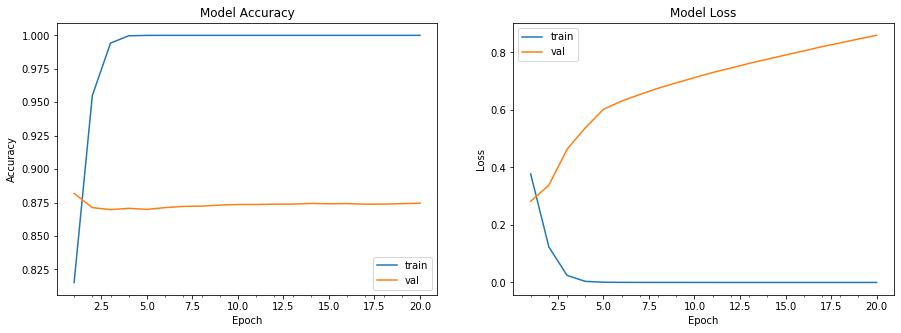

Confusion Martix [[7257 1025]
 [1067 7318]]
16667/16667 [==============================] - 1s 57us/step
[Loss,Accuracy]: [0.8591991948659965, 0.8744825103247595]
Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      8282
         1.0       0.88      0.87      0.87      8385

    accuracy                           0.87     16667
   macro avg       0.87      0.87      0.87     16667
weighted avg       0.87      0.87      0.87     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.2232 - acc: 0.9192 - val_loss: 0.0856 - val_acc: 0.9779
Epoch 2/20
 - 3s - loss: 0.0321 - acc: 0.9920 - val_loss: 0.0577 - val_acc: 0.9786
Epoch 3/20
 - 3s - loss: 0.0046 - acc: 0.9993 - val_loss: 0.0542 - val_acc: 0.9800
Epoch 4/20
 - 3s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0547 - val_acc: 0.9807
Epoch 5/20
 - 3s - loss: 7.2936e-04 - acc: 1.0000 - val_loss: 0.0562 - val_acc: 0.9805
Epoch 6/20
 - 3s - loss: 6.3036e

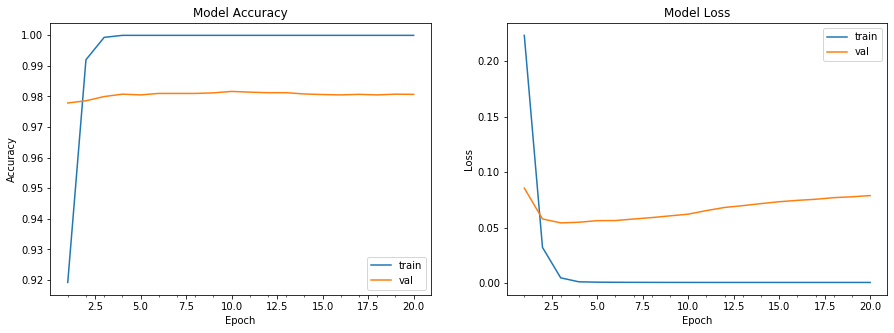

Confusion Martix [[8262  186]
 [ 136 8083]]
16667/16667 [==============================] - 1s 56us/step
[Loss,Accuracy]: [0.07878564468671004, 0.9806803863922722]
Report : 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      8448
         1.0       0.98      0.98      0.98      8219

    accuracy                           0.98     16667
   macro avg       0.98      0.98      0.98     16667
weighted avg       0.98      0.98      0.98     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.0710 - acc: 0.9747 - val_loss: 0.0140 - val_acc: 0.9960
Epoch 2/20
 - 3s - loss: 0.0034 - acc: 0.9993 - val_loss: 0.0086 - val_acc: 0.9967
Epoch 3/20
 - 3s - loss: 6.8500e-04 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 0.9965
Epoch 4/20
 - 3s - loss: 5.4154e-04 - acc: 1.0000 - val_loss: 0.0088 - val_acc: 0.9962
Epoch 5/20
 - 3s - loss: 5.1668e-04 - acc: 1.0000 - val_loss: 0.0088 - val_acc: 0.9965
Epoch 6/20
 - 3s - loss

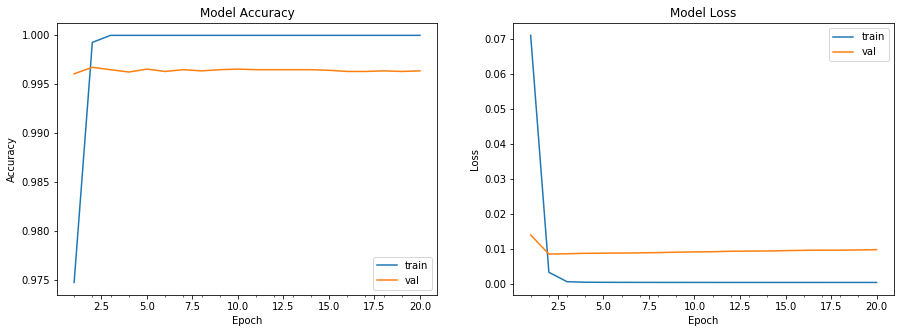

Confusion Martix [[8243   27]
 [  34 8362]]
16666/16666 [==============================] - 1s 56us/step
[Loss,Accuracy]: [0.00984542322630159, 0.9963398535512267]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8270
         1.0       1.00      1.00      1.00      8396

    accuracy                           1.00     16666
   macro avg       1.00      1.00      1.00     16666
weighted avg       1.00      1.00      1.00     16666

Average accuracy 0.9505009167560861


In [60]:
# Scenario 1
# 1 Hidden Layer of 64 units
# No Dropout
# ReLU the hidden layer
# Batch Size 64
# Adam with lr 1e-03

#Create the model
model1 = Sequential()

#Input - Layer
model1.add(Embedding(top_words,32,input_length=max_words))
model1.add(Flatten())

#Hidden - Layers
model1.add(layers.Dense(64, activation="relu"))

#Output - Layer
model1.add(layers.Dense(1, activation = "sigmoid"))

model1.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model1.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model1.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model1.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model1.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg1 = np.average(acc)
print("Average accuracy",avg1);

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_41 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_97 (Dense)             (None, 64)                1024064   
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

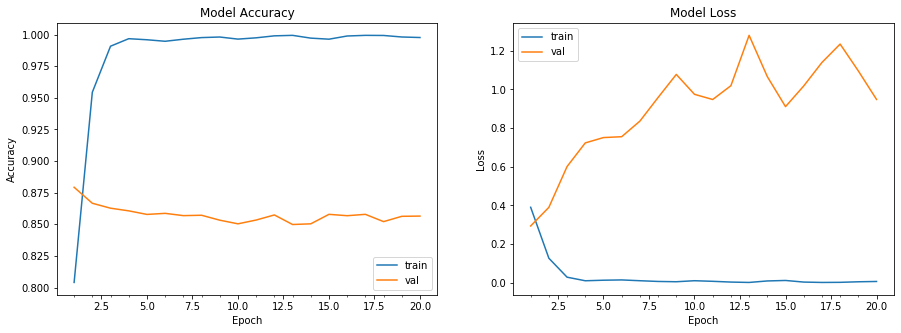

Confusion Martix [[7127 1155]
 [1237 7148]]
16667/16667 [==============================] - 1s 59us/step
[Loss,Accuracy]: [0.9484961758515627, 0.8564828703890839]
Report : 
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      8282
         1.0       0.86      0.85      0.86      8385

    accuracy                           0.86     16667
   macro avg       0.86      0.86      0.86     16667
weighted avg       0.86      0.86      0.86     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.2016 - acc: 0.9314 - val_loss: 0.0448 - val_acc: 0.9904
Epoch 2/20
 - 3s - loss: 0.0494 - acc: 0.9845 - val_loss: 0.0234 - val_acc: 0.9922
Epoch 3/20
 - 3s - loss: 0.0070 - acc: 0.9980 - val_loss: 0.0201 - val_acc: 0.9930
Epoch 4/20
 - 3s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0226 - val_acc: 0.9924
Epoch 5/20
 - 3s - loss: 7.9958e-04 - acc: 0.9999 - val_loss: 0.0238 - val_acc: 0.9930
Epoch 6/20
 - 3s - loss: 6.6726e

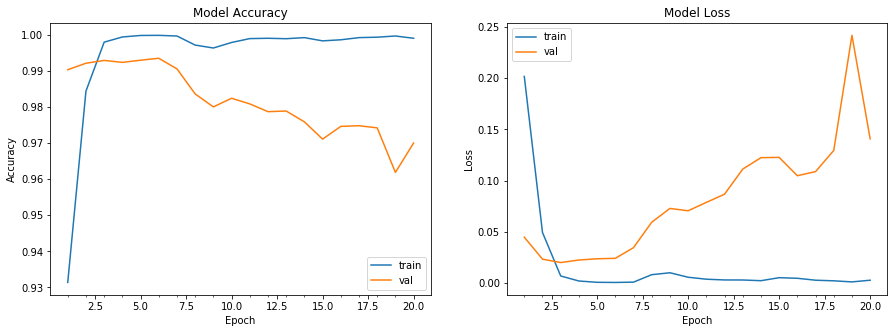

Confusion Martix [[8256  192]
 [ 307 7912]]
16667/16667 [==============================] - 1s 58us/step
[Loss,Accuracy]: [0.14078943529184057, 0.9700605987880242]
Report : 
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      8448
         1.0       0.98      0.96      0.97      8219

    accuracy                           0.97     16667
   macro avg       0.97      0.97      0.97     16667
weighted avg       0.97      0.97      0.97     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.0487 - acc: 0.9835 - val_loss: 0.0050 - val_acc: 0.9992
Epoch 2/20
 - 3s - loss: 0.0031 - acc: 0.9994 - val_loss: 0.0026 - val_acc: 0.9993
Epoch 3/20
 - 3s - loss: 9.9011e-04 - acc: 0.9999 - val_loss: 0.0024 - val_acc: 0.9993
Epoch 4/20
 - 3s - loss: 7.9551e-04 - acc: 0.9999 - val_loss: 0.0039 - val_acc: 0.9988
Epoch 5/20
 - 3s - loss: 6.7775e-04 - acc: 0.9999 - val_loss: 0.0029 - val_acc: 0.9993
Epoch 6/20
 - 3s - loss

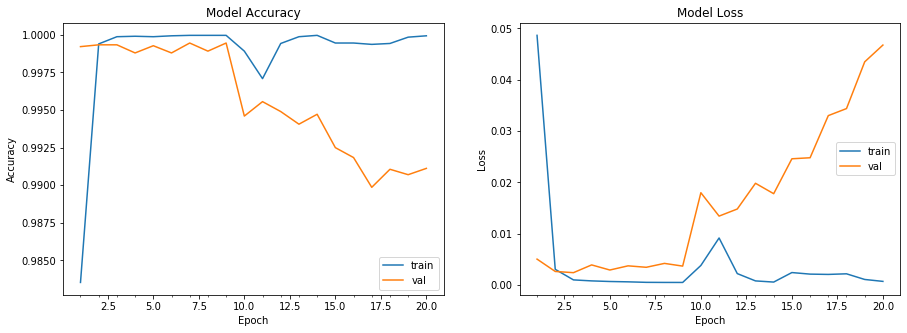

Confusion Martix [[8167  103]
 [  45 8351]]
16666/16666 [==============================] - 1s 60us/step
[Loss,Accuracy]: [0.046766299590305656, 0.9911196447857914]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8270
         1.0       0.99      0.99      0.99      8396

    accuracy                           0.99     16666
   macro avg       0.99      0.99      0.99     16666
weighted avg       0.99      0.99      0.99     16666

Average accuracy 0.9392210379876332


In [61]:
# Scenario 2
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25
# ReLU for every hidden layer
# Batch Size 64
# Adam with lr 1e-03

#Create the model
model2 = Sequential()

#Input - Layer
model2.add(Embedding(top_words,32,input_length=max_words))
model2.add(Flatten())

#Hidden - Layers
model2.add(layers.Dense(64, activation="relu"))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(32, activation="relu"))

# Output - Layer
model2.add(layers.Dense(1, activation = "sigmoid"))

model2.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model2.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = [] 

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model2.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model2.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model2.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg2 = np.average(acc)
print("Average accuracy",avg2);

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_42 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_100 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

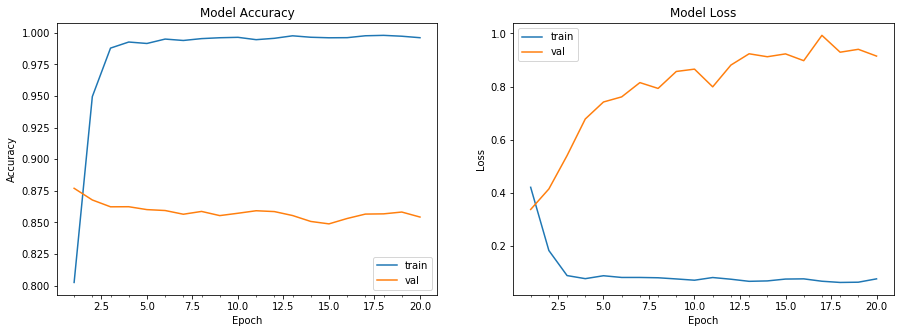

Confusion Martix [[7361  921]
 [1508 6877]]
16667/16667 [==============================] - 1s 63us/step
[Loss,Accuracy]: [0.9146438803685378, 0.8542629147524338]
Report : 
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      8282
         1.0       0.88      0.82      0.85      8385

    accuracy                           0.85     16667
   macro avg       0.86      0.85      0.85     16667
weighted avg       0.86      0.85      0.85     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.2806 - acc: 0.9289 - val_loss: 0.1185 - val_acc: 0.9934
Epoch 2/20
 - 3s - loss: 0.1246 - acc: 0.9807 - val_loss: 0.0900 - val_acc: 0.9915
Epoch 3/20
 - 3s - loss: 0.0713 - acc: 0.9946 - val_loss: 0.0764 - val_acc: 0.9908
Epoch 4/20
 - 3s - loss: 0.0543 - acc: 0.9974 - val_loss: 0.1231 - val_acc: 0.9771
Epoch 5/20
 - 3s - loss: 0.0732 - acc: 0.9935 - val_loss: 0.1252 - val_acc: 0.9809
Epoch 6/20
 - 3s - loss: 0.0794 - ac

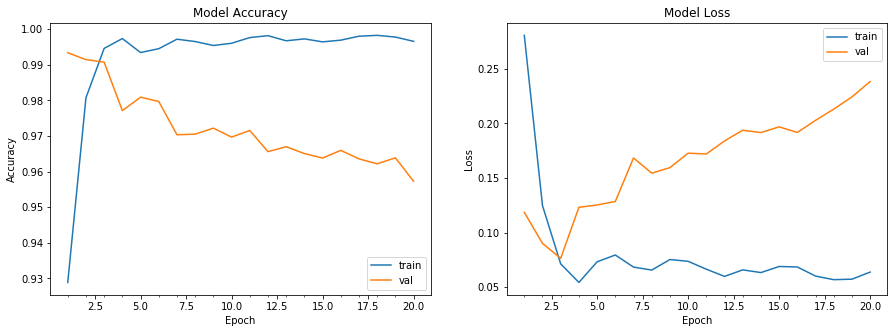

Confusion Martix [[7955  493]
 [ 219 8000]]
16667/16667 [==============================] - 1s 61us/step
[Loss,Accuracy]: [0.2382506753491849, 0.9572808543578789]
Report : 
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      8448
         1.0       0.94      0.97      0.96      8219

    accuracy                           0.96     16667
   macro avg       0.96      0.96      0.96     16667
weighted avg       0.96      0.96      0.96     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.1320 - acc: 0.9787 - val_loss: 0.0753 - val_acc: 0.9983
Epoch 2/20
 - 3s - loss: 0.0652 - acc: 0.9980 - val_loss: 0.0539 - val_acc: 0.9989
Epoch 3/20
 - 3s - loss: 0.0479 - acc: 0.9995 - val_loss: 0.0447 - val_acc: 0.9992
Epoch 4/20
 - 3s - loss: 0.0459 - acc: 0.9983 - val_loss: 0.0565 - val_acc: 0.9957
Epoch 5/20
 - 3s - loss: 0.0647 - acc: 0.9953 - val_loss: 0.0711 - val_acc: 0.9950
Epoch 6/20
 - 3s - loss: 0.0625 - ac

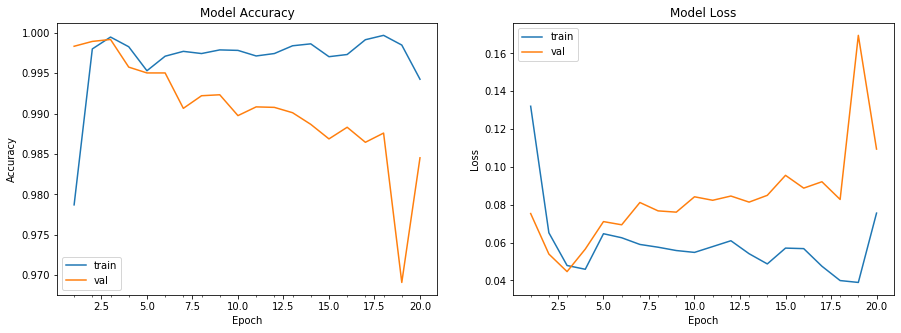

Confusion Martix [[8092  178]
 [  80 8316]]
16666/16666 [==============================] - 1s 62us/step
[Loss,Accuracy]: [0.10938423895866634, 0.984519380775231]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      8270
         1.0       0.98      0.99      0.98      8396

    accuracy                           0.98     16666
   macro avg       0.98      0.98      0.98     16666
weighted avg       0.98      0.98      0.98     16666

Average accuracy 0.9320210499618479


In [62]:
# Scenario 3
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
# ReLU for every hidden layer
# Batch Size 64
# Adam with lr 1e-03

#Create the model
model3 = Sequential()

#Input - Layer
model3.add(Embedding(top_words,32,input_length=max_words))
model3.add(Flatten())

#Hidden - Layers
model3.add(layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))
model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(32, activation="relu"))

# Output - Layer
model3.add(layers.Dense(1, activation = "sigmoid"))

model3.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model3.compile(optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"])

from sklearn.model_selection import KFold
 
n_split=3
acc=[]
 
for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model3.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model3.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model3.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg3 = np.average(acc)
print("Average accuracy",avg3);

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_43 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_103 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_33 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

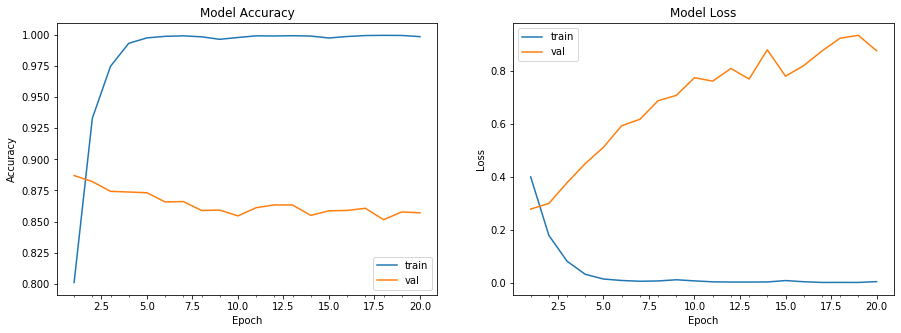

Confusion Martix [[7079 1203]
 [1180 7205]]
16667/16667 [==============================] - 1s 62us/step
[Loss,Accuracy]: [0.87763801376578, 0.8570228595892998]
Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      8282
         1.0       0.86      0.86      0.86      8385

    accuracy                           0.86     16667
   macro avg       0.86      0.86      0.86     16667
weighted avg       0.86      0.86      0.86     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.2040 - acc: 0.9316 - val_loss: 0.0497 - val_acc: 0.9917
Epoch 2/20
 - 3s - loss: 0.0619 - acc: 0.9821 - val_loss: 0.0318 - val_acc: 0.9897
Epoch 3/20
 - 3s - loss: 0.0195 - acc: 0.9959 - val_loss: 0.0155 - val_acc: 0.9944
Epoch 4/20
 - 3s - loss: 0.0094 - acc: 0.9986 - val_loss: 0.0152 - val_acc: 0.9945
Epoch 5/20
 - 3s - loss: 0.0061 - acc: 0.9992 - val_loss: 0.0172 - val_acc: 0.9936
Epoch 6/20
 - 3s - loss: 0.0048 - acc:

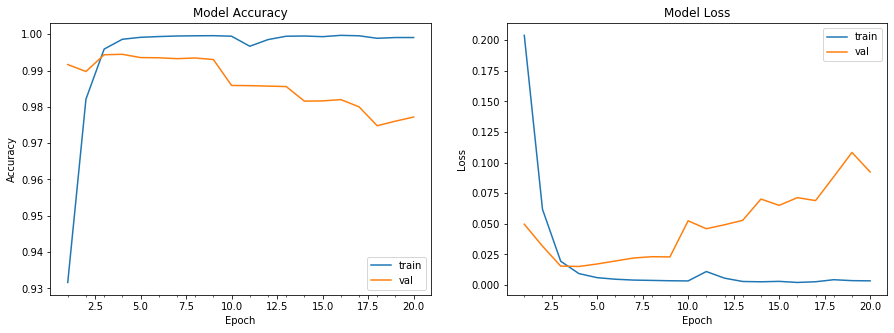

Confusion Martix [[8234  214]
 [ 166 8053]]
16667/16667 [==============================] - 1s 61us/step
[Loss,Accuracy]: [0.09240046131914714, 0.9772004559658467]
Report : 
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      8448
         1.0       0.97      0.98      0.98      8219

    accuracy                           0.98     16667
   macro avg       0.98      0.98      0.98     16667
weighted avg       0.98      0.98      0.98     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.0376 - acc: 0.9882 - val_loss: 0.0059 - val_acc: 0.9986
Epoch 2/20
 - 3s - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0040 - val_acc: 0.9989
Epoch 3/20
 - 3s - loss: 0.0012 - acc: 0.9999 - val_loss: 0.0022 - val_acc: 0.9992
Epoch 4/20
 - 3s - loss: 0.0011 - acc: 0.9999 - val_loss: 0.0024 - val_acc: 0.9992
Epoch 5/20
 - 3s - loss: 9.9448e-04 - acc: 0.9999 - val_loss: 0.0023 - val_acc: 0.9992
Epoch 6/20
 - 3s - loss: 9.7903

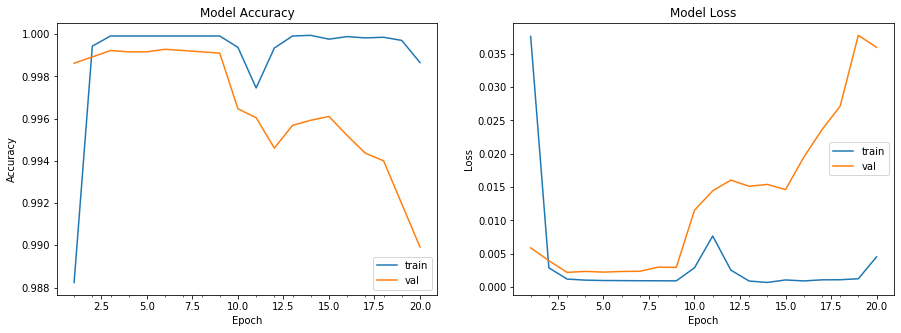

Confusion Martix [[8189   81]
 [  87 8309]]
16666/16666 [==============================] - 1s 63us/step
[Loss,Accuracy]: [0.035946578916088656, 0.9899195967838713]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8270
         1.0       0.99      0.99      0.99      8396

    accuracy                           0.99     16666
   macro avg       0.99      0.99      0.99     16666
weighted avg       0.99      0.99      0.99     16666

Average accuracy 0.9413809707796726


In [63]:
# Scenario 4
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25
# Sigmoid for every hidden layer
# Batch Size 64
# Adam with lr 1e-03

#Create the model
model4 = Sequential()

#Input - Layer
model4.add(Embedding(top_words,32,input_length=max_words))
model4.add(Flatten())

#Hidden - Layers
model4.add(layers.Dense(64, activation="sigmoid"))
model4.add(layers.Dropout(0.25))
model4.add(layers.Dense(32, activation="sigmoid"))

#Output - Layer
model4.add(layers.Dense(1, activation = "sigmoid"))

model4.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model4.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model4.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model4.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model4.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg4 = np.average(acc)
print("Average accuracy",avg4);

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_44 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_106 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_34 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_107 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

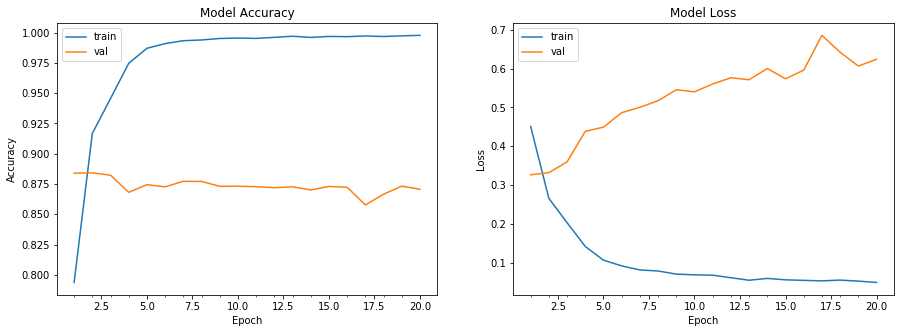

Confusion Martix [[7036 1246]
 [ 909 7476]]
16667/16667 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.6243677013578545, 0.8707025859232476]
Report : 
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      8282
         1.0       0.86      0.89      0.87      8385

    accuracy                           0.87     16667
   macro avg       0.87      0.87      0.87     16667
weighted avg       0.87      0.87      0.87     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.2612 - acc: 0.9305 - val_loss: 0.0968 - val_acc: 0.9949
Epoch 2/20
 - 3s - loss: 0.1253 - acc: 0.9753 - val_loss: 0.0756 - val_acc: 0.9949
Epoch 3/20
 - 3s - loss: 0.0809 - acc: 0.9901 - val_loss: 0.0702 - val_acc: 0.9942
Epoch 4/20
 - 3s - loss: 0.0647 - acc: 0.9948 - val_loss: 0.0697 - val_acc: 0.9917
Epoch 5/20
 - 3s - loss: 0.0638 - acc: 0.9952 - val_loss: 0.0819 - val_acc: 0.9897
Epoch 6/20
 - 3s - loss: 0.0625 - ac

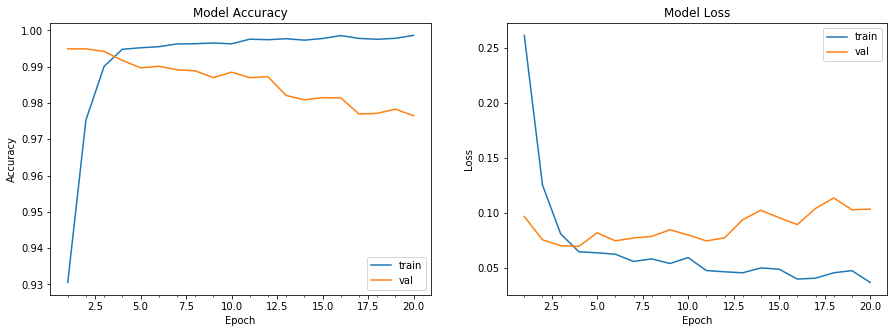

Confusion Martix [[8302  146]
 [ 246 7973]]
16667/16667 [==============================] - 1s 63us/step
[Loss,Accuracy]: [0.10344426065062894, 0.9764804703905922]
Report : 
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      8448
         1.0       0.98      0.97      0.98      8219

    accuracy                           0.98     16667
   macro avg       0.98      0.98      0.98     16667
weighted avg       0.98      0.98      0.98     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.0987 - acc: 0.9850 - val_loss: 0.0600 - val_acc: 0.9999
Epoch 2/20
 - 3s - loss: 0.0568 - acc: 0.9973 - val_loss: 0.0428 - val_acc: 0.9999
Epoch 3/20
 - 3s - loss: 0.0411 - acc: 0.9987 - val_loss: 0.0354 - val_acc: 0.9993
Epoch 4/20
 - 3s - loss: 0.0437 - acc: 0.9975 - val_loss: 0.0418 - val_acc: 0.9996
Epoch 5/20
 - 3s - loss: 0.0464 - acc: 0.9975 - val_loss: 0.0452 - val_acc: 0.9986
Epoch 6/20
 - 3s - loss: 0.0451 - a

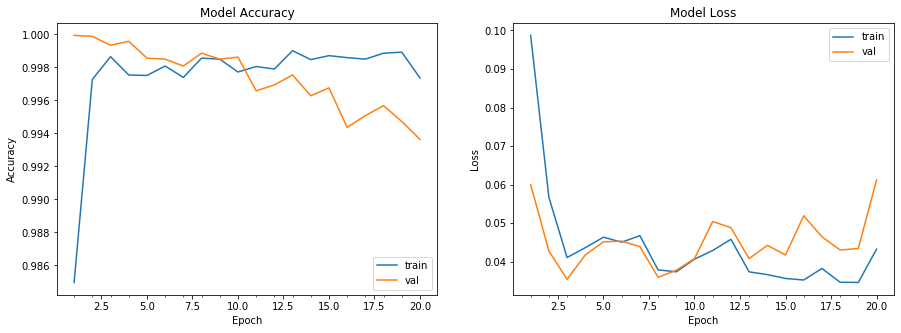

Confusion Martix [[8235   35]
 [  71 8325]]
16666/16666 [==============================] - 1s 63us/step
[Loss,Accuracy]: [0.061226412581500494, 0.9936397455898236]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      8270
         1.0       1.00      0.99      0.99      8396

    accuracy                           0.99     16666
   macro avg       0.99      0.99      0.99     16666
weighted avg       0.99      0.99      0.99     16666

Average accuracy 0.9469409339678877


In [64]:
# Scenario 5
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
# Sigmoid for every hidden layer
# Batch Size 64
# Adam with lr 1e-03

#Create the model
model5 = Sequential()

#Input - Layer
model5.add(Embedding(top_words,32,input_length=max_words))
model5.add(Flatten())

#Hidden - Layers
model5.add(layers.Dense(64, activation="sigmoid",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))
model5.add(layers.Dropout(0.25))
model5.add(layers.Dense(32, activation="sigmoid",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))

#Output - Layer
model5.add(layers.Dense(1, activation = "sigmoid"))

model5.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model5.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model5.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model5.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model5.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg5 = np.average(acc)
print("Average accuracy",avg5);

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_45 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_45 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_109 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_35 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

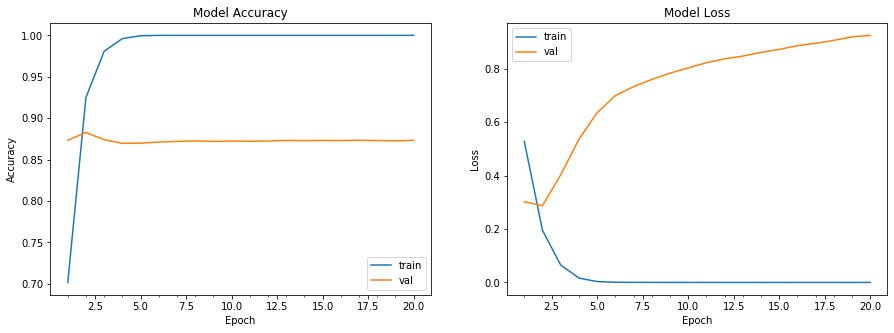

Confusion Martix [[7287  995]
 [1117 7268]]
16667/16667 [==============================] - 1s 62us/step
[Loss,Accuracy]: [0.9249616209624331, 0.8732825343242796]
Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      8282
         1.0       0.88      0.87      0.87      8385

    accuracy                           0.87     16667
   macro avg       0.87      0.87      0.87     16667
weighted avg       0.87      0.87      0.87     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.2400 - acc: 0.9183 - val_loss: 0.0876 - val_acc: 0.9709
Epoch 2/20
 - 1s - loss: 0.0355 - acc: 0.9893 - val_loss: 0.0666 - val_acc: 0.9763
Epoch 3/20
 - 1s - loss: 0.0069 - acc: 0.9982 - val_loss: 0.1076 - val_acc: 0.9658
Epoch 4/20
 - 1s - loss: 0.0014 - acc: 0.9998 - val_loss: 0.0957 - val_acc: 0.9724
Epoch 5/20
 - 1s - loss: 4.5702e-04 - acc: 0.9999 - val_loss: 0.1002 - val_acc: 0.9716
Epoch 6/20
 - 1s - loss: 1.9473e

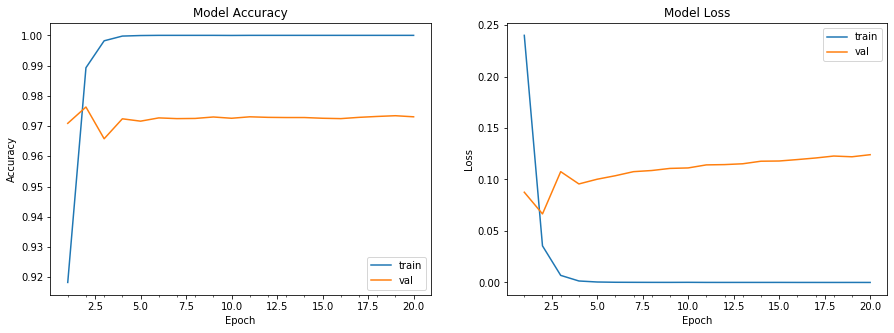

Confusion Martix [[8243  205]
 [ 244 7975]]
16667/16667 [==============================] - 1s 63us/step
[Loss,Accuracy]: [0.12407237506634503, 0.9730605387892242]
Report : 
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      8448
         1.0       0.97      0.97      0.97      8219

    accuracy                           0.97     16667
   macro avg       0.97      0.97      0.97     16667
weighted avg       0.97      0.97      0.97     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.0748 - acc: 0.9741 - val_loss: 0.0231 - val_acc: 0.9942
Epoch 2/20
 - 1s - loss: 0.0137 - acc: 0.9958 - val_loss: 0.0187 - val_acc: 0.9934
Epoch 3/20
 - 1s - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0260 - val_acc: 0.9919
Epoch 4/20
 - 1s - loss: 6.4231e-04 - acc: 0.9999 - val_loss: 0.0287 - val_acc: 0.9917
Epoch 5/20
 - 1s - loss: 4.3106e-04 - acc: 0.9999 - val_loss: 0.0283 - val_acc: 0.9918
Epoch 6/20
 - 1s - loss: 1.

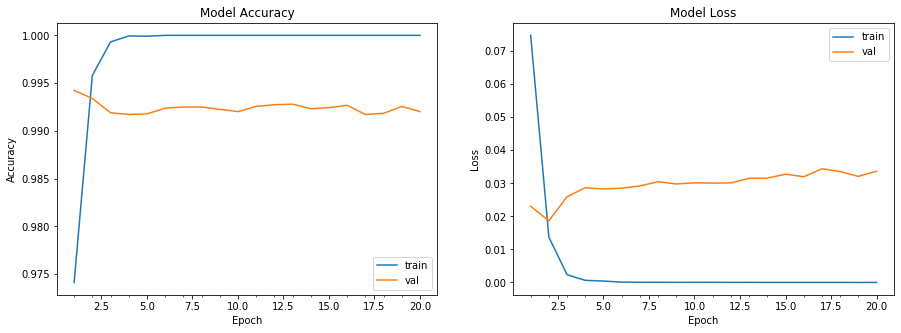

Confusion Martix [[8185   85]
 [  48 8348]]
16666/16666 [==============================] - 1s 62us/step
[Loss,Accuracy]: [0.03365039441082393, 0.9920196807872315]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8270
         1.0       0.99      0.99      0.99      8396

    accuracy                           0.99     16666
   macro avg       0.99      0.99      0.99     16666
weighted avg       0.99      0.99      0.99     16666

Average accuracy 0.9461209179669118


In [65]:
# Scenario 6
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25
# relu for every hidden layer
# Batch Size 256
# Adam with lr 1e-03

#Create the model
model6 = Sequential()

#Input - Layer
model6.add(Embedding(top_words,32,input_length=max_words))
model6.add(Flatten())

#Hidden - Layers
model6.add(layers.Dense(64, activation="relu"))
model6.add(layers.Dropout(0.25))
model6.add(layers.Dense(32, activation="relu"))

#Output - Layer
model6.add(layers.Dense(1, activation = "sigmoid"))

model6.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model6.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"])

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model6.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model6.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model6.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg6 = np.average(acc)
print("Average accuracy",avg6);

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_46 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_46 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_112 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_113 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

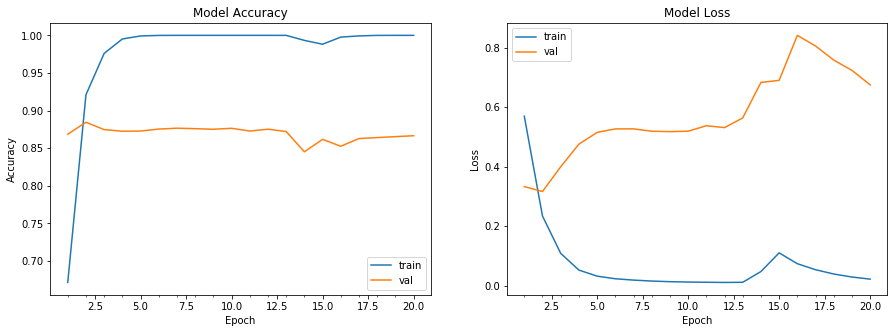

Confusion Martix [[7292  990]
 [1234 7151]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.6753557433161944, 0.8665626687215916]
Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      8282
         1.0       0.88      0.85      0.87      8385

    accuracy                           0.87     16667
   macro avg       0.87      0.87      0.87     16667
weighted avg       0.87      0.87      0.87     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.2585 - acc: 0.9267 - val_loss: 0.1363 - val_acc: 0.9812
Epoch 2/20
 - 1s - loss: 0.1029 - acc: 0.9835 - val_loss: 0.0868 - val_acc: 0.9861
Epoch 3/20
 - 1s - loss: 0.0539 - acc: 0.9972 - val_loss: 0.0844 - val_acc: 0.9833
Epoch 4/20
 - 1s - loss: 0.0405 - acc: 0.9987 - val_loss: 0.0735 - val_acc: 0.9854
Epoch 5/20
 - 1s - loss: 0.0302 - acc: 0.9999 - val_loss: 0.0665 - val_acc: 0.9863
Epoch 6/20
 - 1s - loss: 0.0236 - ac

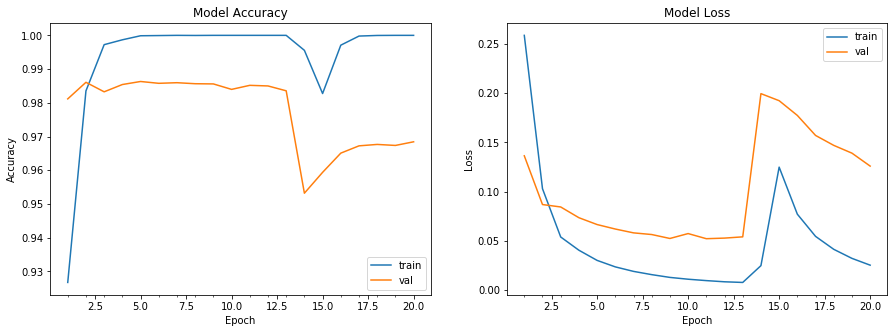

Confusion Martix [[8144  304]
 [ 222 7997]]
16667/16667 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.1258565859183273, 0.9684406311873762]
Report : 
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      8448
         1.0       0.96      0.97      0.97      8219

    accuracy                           0.97     16667
   macro avg       0.97      0.97      0.97     16667
weighted avg       0.97      0.97      0.97     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.0930 - acc: 0.9805 - val_loss: 0.0599 - val_acc: 0.9985
Epoch 2/20
 - 1s - loss: 0.0590 - acc: 0.9959 - val_loss: 0.0485 - val_acc: 0.9983
Epoch 3/20
 - 1s - loss: 0.0421 - acc: 0.9994 - val_loss: 0.0392 - val_acc: 0.9988
Epoch 4/20
 - 1s - loss: 0.0328 - acc: 0.9999 - val_loss: 0.0323 - val_acc: 0.9988
Epoch 5/20
 - 1s - loss: 0.0267 - acc: 0.9999 - val_loss: 0.0277 - val_acc: 0.9987
Epoch 6/20
 - 1s - loss: 0.0216 - ac

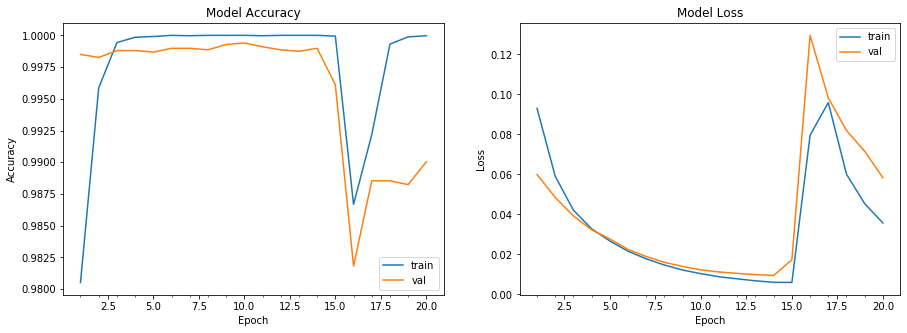

Confusion Martix [[8169  101]
 [  65 8331]]
16666/16666 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.058321584876661156, 0.9900396015840633]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8270
         1.0       0.99      0.99      0.99      8396

    accuracy                           0.99     16666
   macro avg       0.99      0.99      0.99     16666
weighted avg       0.99      0.99      0.99     16666

Average accuracy 0.9416809671643437


In [66]:
# Scenario 7
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
# relu for every hidden layer
# Batch Size 256
# Adam with lr 1e-03

#Create the model
model7 = Sequential()

#Input - Layer
model7.add(Embedding(top_words,32,input_length=max_words))
model7.add(Flatten())

#Hidden - Layers
model7.add(layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))
model7.add(layers.Dropout(0.25))
model7.add(layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))

#Output - Layer
model7.add(layers.Dense(1, activation = "sigmoid"))

model7.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model7.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model7.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model7.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model7.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg7 = np.average(acc)
print("Average accuracy",avg7);

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_47 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_47 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_115 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_37 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_116 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

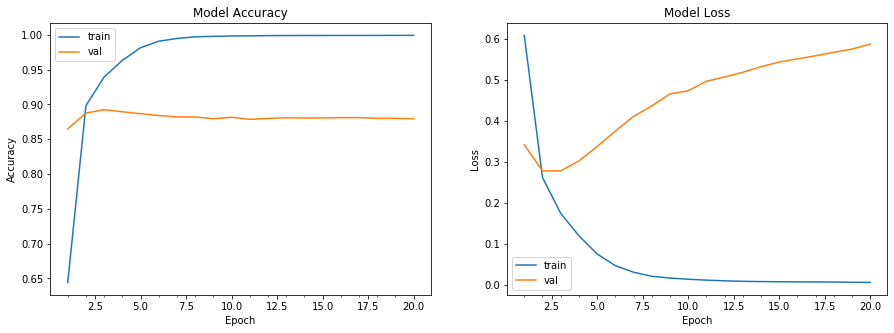

Confusion Martix [[7360  922]
 [1086 7299]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.587176895199782, 0.8795224095518089]
Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      8282
         1.0       0.89      0.87      0.88      8385

    accuracy                           0.88     16667
   macro avg       0.88      0.88      0.88     16667
weighted avg       0.88      0.88      0.88     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.2257 - acc: 0.9316 - val_loss: 0.0455 - val_acc: 0.9938
Epoch 2/20
 - 1s - loss: 0.0770 - acc: 0.9781 - val_loss: 0.0316 - val_acc: 0.9921
Epoch 3/20
 - 1s - loss: 0.0353 - acc: 0.9934 - val_loss: 0.0244 - val_acc: 0.9937
Epoch 4/20
 - 1s - loss: 0.0218 - acc: 0.9966 - val_loss: 0.0226 - val_acc: 0.9935
Epoch 5/20
 - 1s - loss: 0.0152 - acc: 0.9979 - val_loss: 0.0224 - val_acc: 0.9930
Epoch 6/20
 - 1s - loss: 0.0113 - acc

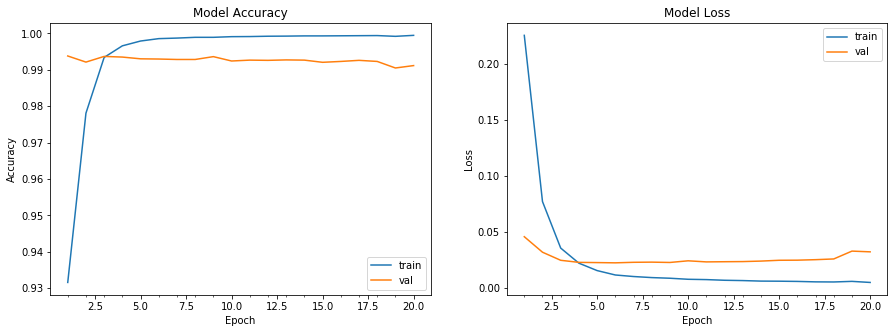

Confusion Martix [[8362   86]
 [  61 8158]]
16667/16667 [==============================] - 1s 62us/step
[Loss,Accuracy]: [0.03197830445492726, 0.9911801763714386]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8448
         1.0       0.99      0.99      0.99      8219

    accuracy                           0.99     16667
   macro avg       0.99      0.99      0.99     16667
weighted avg       0.99      0.99      0.99     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.0331 - acc: 0.9899 - val_loss: 0.0041 - val_acc: 0.9993
Epoch 2/20
 - 1s - loss: 0.0120 - acc: 0.9972 - val_loss: 0.0036 - val_acc: 0.9995
Epoch 3/20
 - 1s - loss: 0.0077 - acc: 0.9989 - val_loss: 0.0036 - val_acc: 0.9992
Epoch 4/20
 - 1s - loss: 0.0062 - acc: 0.9993 - val_loss: 0.0032 - val_acc: 0.9995
Epoch 5/20
 - 1s - loss: 0.0056 - acc: 0.9993 - val_loss: 0.0032 - val_acc: 0.9994
Epoch 6/20
 - 1s - loss: 0.0053 - a

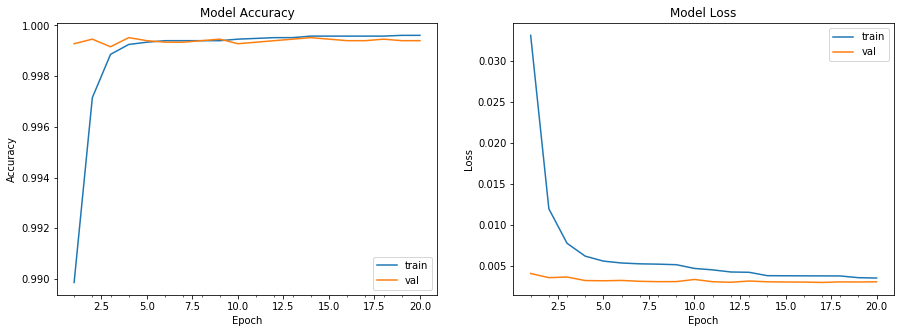

Confusion Martix [[8265    5]
 [   5 8391]]
16666/16666 [==============================] - 1s 61us/step
[Loss,Accuracy]: [0.003047409477244758, 0.99939997599904]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8270
         1.0       1.00      1.00      1.00      8396

    accuracy                           1.00     16666
   macro avg       1.00      1.00      1.00     16666
weighted avg       1.00      1.00      1.00     16666

Average accuracy 0.9567008539740959


In [67]:
# Scenario 8
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25 
# sigmoid for every hidden layer
# Batch Size 256
# Adam with lr 1e-03

#Create the model
model8 = Sequential()

#Input - Layer
model8.add(Embedding(top_words,32,input_length=max_words))
model8.add(Flatten())

#Hidden - Layers
model8.add(layers.Dense(64, activation="sigmoid"))
model8.add(layers.Dropout(0.25))
model8.add(layers.Dense(32, activation="sigmoid"))

#Output - Layer
model8.add(layers.Dense(1, activation = "sigmoid"))

model8.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model8.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model8.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model8.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model8.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg8 = np.average(acc)
print("Average accuracy",avg8);

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_48 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_48 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_118 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_38 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

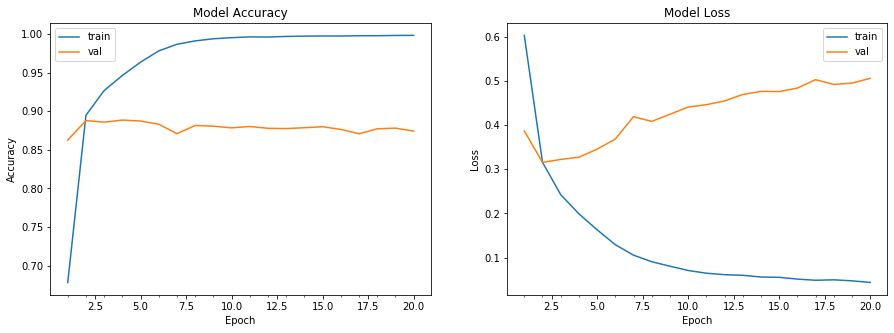

Confusion Martix [[7453  829]
 [1268 7117]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.5056341970471849, 0.8741825163246395]
Report : 
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      8282
         1.0       0.90      0.85      0.87      8385

    accuracy                           0.87     16667
   macro avg       0.88      0.87      0.87     16667
weighted avg       0.88      0.87      0.87     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.2642 - acc: 0.9315 - val_loss: 0.1048 - val_acc: 0.9947
Epoch 2/20
 - 1s - loss: 0.1393 - acc: 0.9719 - val_loss: 0.0758 - val_acc: 0.9955
Epoch 3/20
 - 1s - loss: 0.0913 - acc: 0.9880 - val_loss: 0.0666 - val_acc: 0.9956
Epoch 4/20
 - 1s - loss: 0.0735 - acc: 0.9924 - val_loss: 0.0619 - val_acc: 0.9956
Epoch 5/20
 - 1s - loss: 0.0626 - acc: 0.9955 - val_loss: 0.0604 - val_acc: 0.9942
Epoch 6/20
 - 1s - loss: 0.0570 - ac

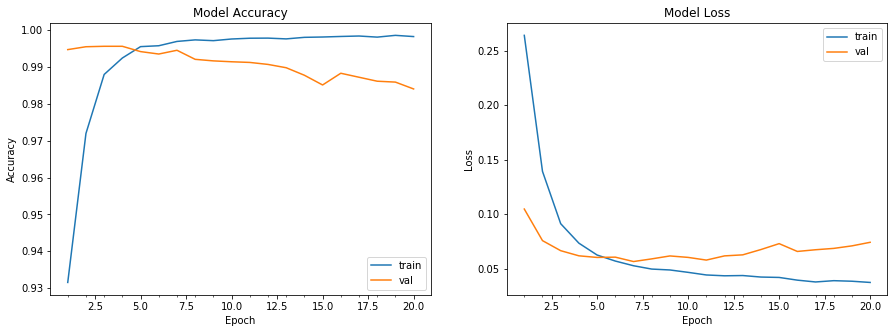

Confusion Martix [[8321  127]
 [ 139 8080]]
16667/16667 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.07425852597525104, 0.9840403192293782]
Report : 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      8448
         1.0       0.98      0.98      0.98      8219

    accuracy                           0.98     16667
   macro avg       0.98      0.98      0.98     16667
weighted avg       0.98      0.98      0.98     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.0872 - acc: 0.9864 - val_loss: 0.0593 - val_acc: 0.9998
Epoch 2/20
 - 1s - loss: 0.0615 - acc: 0.9971 - val_loss: 0.0464 - val_acc: 0.9998
Epoch 3/20
 - 1s - loss: 0.0487 - acc: 0.9975 - val_loss: 0.0385 - val_acc: 0.9998
Epoch 4/20
 - 1s - loss: 0.0410 - acc: 0.9986 - val_loss: 0.0332 - val_acc: 0.9998
Epoch 5/20
 - 1s - loss: 0.0378 - acc: 0.9981 - val_loss: 0.0316 - val_acc: 0.9999
Epoch 6/20
 - 1s - loss: 0.0376 - a

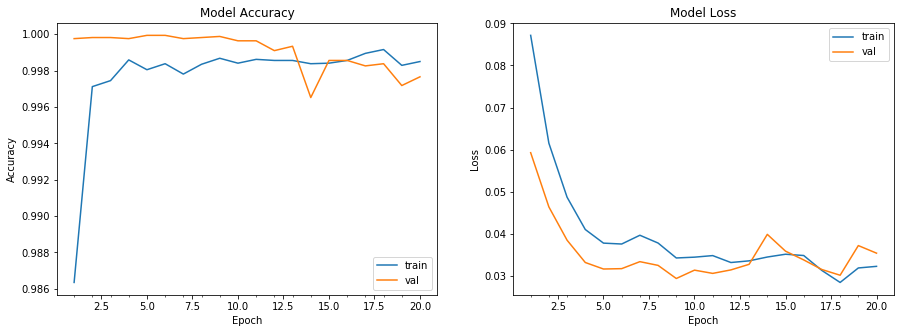

Confusion Martix [[8266    4]
 [  35 8361]]
16666/16666 [==============================] - 1s 66us/step
[Loss,Accuracy]: [0.03539129707246543, 0.9976599063962559]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8270
         1.0       1.00      1.00      1.00      8396

    accuracy                           1.00     16666
   macro avg       1.00      1.00      1.00     16666
weighted avg       1.00      1.00      1.00     16666

Average accuracy 0.9519609139834245


In [68]:
# Scenario 9
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
# sigmoid for every hidden layer
# Batch Size 256
# Adam with lr 1e-03

#Create the model
model9 = Sequential()

#Input - Layer
model9.add(Embedding(top_words,32,input_length=max_words))
model9.add(Flatten())

#Hidden - Layers
model9.add(layers.Dense(64, activation="sigmoid",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))
model9.add(layers.Dropout(0.25))
model9.add(layers.Dense(32, activation="sigmoid",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))

#Output - Layer
model9.add(layers.Dense(1, activation = "sigmoid"))

model9.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model9.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model9.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model9.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model9.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg9 = np.average(acc)
print("Average accuracy",avg9);

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_49 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_49 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_121 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_39 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

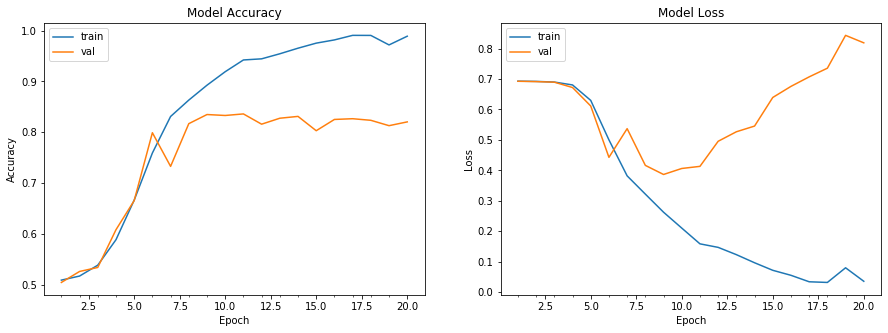

Confusion Martix [[6997 1285]
 [1708 6677]]
16667/16667 [==============================] - 1s 61us/step
[Loss,Accuracy]: [0.819038552516451, 0.8204235915388981]
Report : 
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      8282
         1.0       0.84      0.80      0.82      8385

    accuracy                           0.82     16667
   macro avg       0.82      0.82      0.82     16667
weighted avg       0.82      0.82      0.82     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.3143 - acc: 0.8812 - val_loss: 0.1067 - val_acc: 0.9766
Epoch 2/20
 - 1s - loss: 0.2089 - acc: 0.9209 - val_loss: 0.1411 - val_acc: 0.9450
Epoch 3/20
 - 1s - loss: 0.1650 - acc: 0.9411 - val_loss: 0.1234 - val_acc: 0.9560
Epoch 4/20
 - 1s - loss: 0.1241 - acc: 0.9554 - val_loss: 0.0843 - val_acc: 0.9714
Epoch 5/20
 - 1s - loss: 0.0907 - acc: 0.9676 - val_loss: 0.0996 - val_acc: 0.9613
Epoch 6/20
 - 1s - loss: 0.0700 - acc

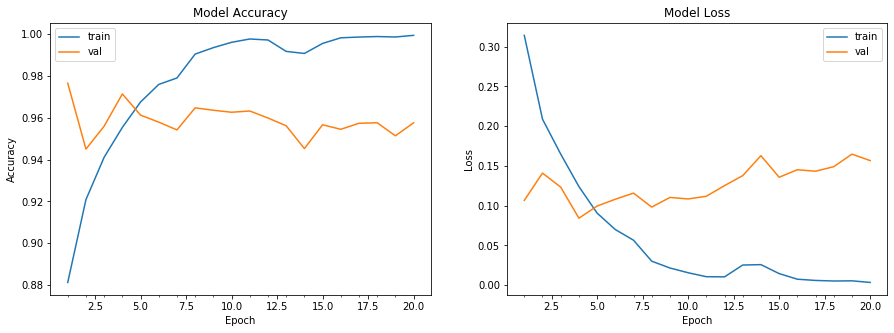

Confusion Martix [[8090  358]
 [ 348 7871]]
16667/16667 [==============================] - 1s 62us/step
[Loss,Accuracy]: [0.1567784804413737, 0.9576408472188184]
Report : 
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      8448
         1.0       0.96      0.96      0.96      8219

    accuracy                           0.96     16667
   macro avg       0.96      0.96      0.96     16667
weighted avg       0.96      0.96      0.96     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.0771 - acc: 0.9747 - val_loss: 0.0372 - val_acc: 0.9875
Epoch 2/20
 - 1s - loss: 0.0595 - acc: 0.9776 - val_loss: 0.0129 - val_acc: 0.9981
Epoch 3/20
 - 1s - loss: 0.0288 - acc: 0.9900 - val_loss: 0.0103 - val_acc: 0.9973
Epoch 4/20
 - 1s - loss: 0.0129 - acc: 0.9963 - val_loss: 0.0058 - val_acc: 0.9986
Epoch 5/20
 - 1s - loss: 0.0088 - acc: 0.9978 - val_loss: 0.0057 - val_acc: 0.9987
Epoch 6/20
 - 1s - loss: 0.0074 - ac

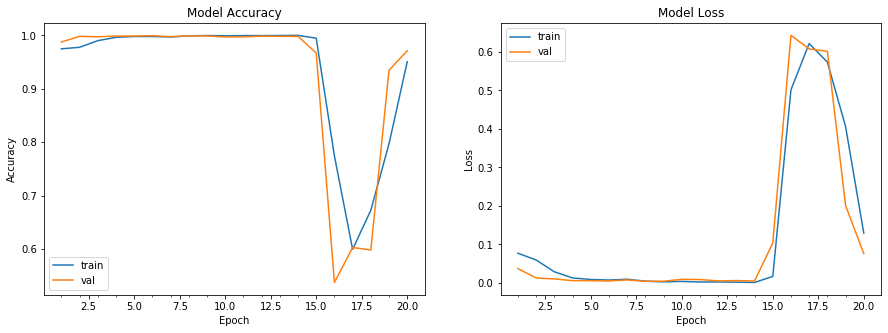

Confusion Martix [[8111  159]
 [ 322 8074]]
16666/16666 [==============================] - 1s 63us/step
[Loss,Accuracy]: [0.07616400205047745, 0.9711388455538221]
Report : 
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      8270
         1.0       0.98      0.96      0.97      8396

    accuracy                           0.97     16666
   macro avg       0.97      0.97      0.97     16666
weighted avg       0.97      0.97      0.97     16666

Average accuracy 0.9164010947705128


In [69]:
# Scenario 10
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25 
# relu for every hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model10 = Sequential()

#Input - Layer
model10.add(Embedding(top_words,32,input_length=max_words))
model10.add(Flatten())

#Hidden - Layers
model10.add(layers.Dense(64, activation="relu"))
model10.add(layers.Dropout(0.25))
model10.add(layers.Dense(32, activation="relu"))

#Output - Layer
model10.add(layers.Dense(1, activation = "sigmoid"))

model10.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model10.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model10.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose =2)
  
  plot_model_history(model_info)

  y_pred = model10.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model10.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg10 = np.average(acc)
print("Average accuracy",avg10);

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_50 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_50 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_124 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_40 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_125 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

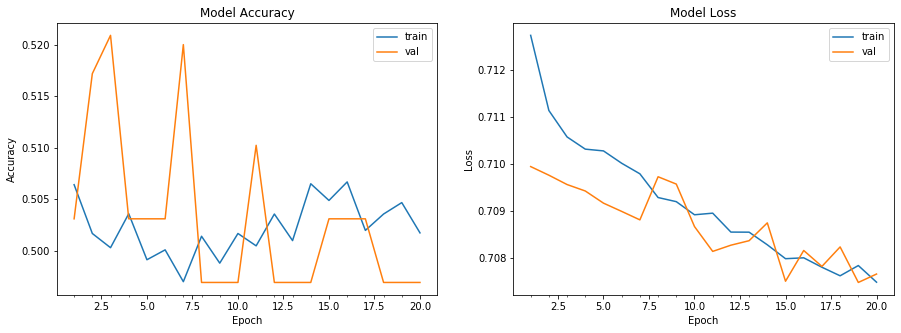

Confusion Martix [[8282    0]
 [8385    0]]
16667/16667 [==============================] - 1s 66us/step
[Loss,Accuracy]: [0.7076647132948035, 0.4969100617916116]
Report : 
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.66      8282
         1.0       0.00      0.00      0.00      8385

    accuracy                           0.50     16667
   macro avg       0.25      0.50      0.33     16667
weighted avg       0.25      0.50      0.33     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 - 1s - loss: 0.7067 - acc: 0.5082 - val_loss: 0.7062 - val_acc: 0.5194
Epoch 2/20
 - 1s - loss: 0.7071 - acc: 0.5048 - val_loss: 0.7061 - val_acc: 0.5069
Epoch 3/20
 - 1s - loss: 0.7071 - acc: 0.5028 - val_loss: 0.7089 - val_acc: 0.4931
Epoch 4/20
 - 1s - loss: 0.7067 - acc: 0.5061 - val_loss: 0.7057 - val_acc: 0.5194
Epoch 5/20
 - 1s - loss: 0.7065 - acc: 0.5079 - val_loss: 0.7068 - val_acc: 0.4931
Epoch 6/20
 - 1s - loss: 0.7064 - acc: 0.5057 - val_loss: 0.7055 - val_acc: 0.5175
Epoch 7/20
 - 1s - loss: 0.7061 - acc: 0.5106 - val_loss: 0.7062 - val_acc: 0.4931
Epoch 8/20
 - 1s - loss: 0.7057 - acc: 0.5119 - val_loss: 0.7051 - val_acc: 0.5182
Epoch 9/20
 - 1s - loss: 0.7055 - acc: 0.5124 - val_loss: 0.7048 - val_acc: 0.5248
Epoch 10/20
 - 1s - loss: 0.7056 - acc: 0.5090 - val_loss: 0.7062 - val_acc: 0.4931
Epoch 11/20
 - 1s - loss: 0.7054 - acc: 0.5111 - val_loss: 0.7044 - val_acc: 0.5238
Epoch 12/20
 - 1s - loss: 0.7056 - acc: 0.5059 - val_loss: 0.7042 - val_acc: 0.5226
Epoch 13/20


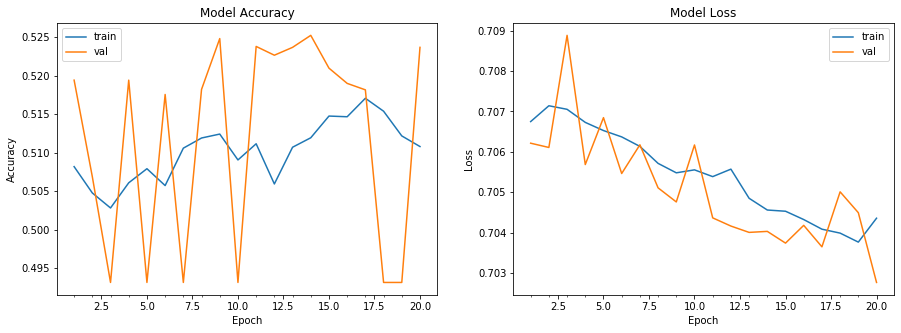

Confusion Martix [[6197 2251]
 [5688 2531]]
16667/16667 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.7027686992761304, 0.5236695266166203]
Report : 
              precision    recall  f1-score   support

         0.0       0.52      0.73      0.61      8448
         1.0       0.53      0.31      0.39      8219

    accuracy                           0.52     16667
   macro avg       0.53      0.52      0.50     16667
weighted avg       0.53      0.52      0.50     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.7033 - acc: 0.5193 - val_loss: 0.7035 - val_acc: 0.5156
Epoch 2/20
 - 1s - loss: 0.7033 - acc: 0.5172 - val_loss: 0.7034 - val_acc: 0.5166
Epoch 3/20
 - 1s - loss: 0.7035 - acc: 0.5159 - val_loss: 0.7044 - val_acc: 0.5105
Epoch 4/20
 - 1s - loss: 0.7029 - acc: 0.5207 - val_loss: 0.7030 - val_acc: 0.5156
Epoch 5/20
 - 1s - loss: 0.7028 - acc: 0.5169 - val_loss: 0.7029 - val_acc: 0.5161
Epoch 6/20
 - 1s - loss: 0.7022 - ac

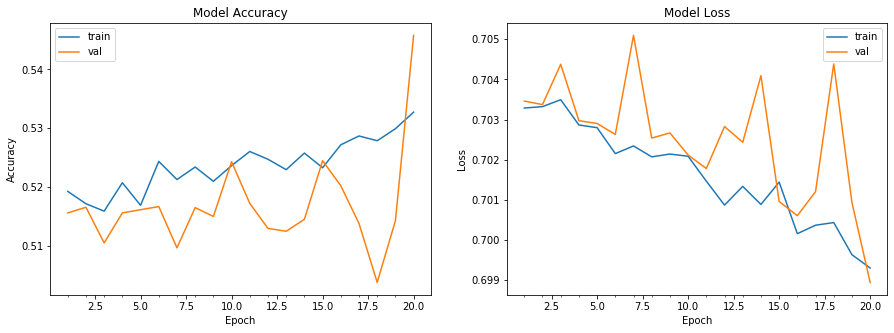

Confusion Martix [[5032 3238]
 [4332 4064]]
16666/16666 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.6989422542027719, 0.545781831273251]
Report : 
              precision    recall  f1-score   support

         0.0       0.54      0.61      0.57      8270
         1.0       0.56      0.48      0.52      8396

    accuracy                           0.55     16666
   macro avg       0.55      0.55      0.54     16666
weighted avg       0.55      0.55      0.54     16666

Average accuracy 0.5221204732271609


In [70]:
# Scenario 11
# 2 Hidden Layers of 64-32 units
# Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
# relu for every hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model11 = Sequential()

#Input - Layer
model11.add(Embedding(top_words,32,input_length=max_words))
model11.add(Flatten())

#Hidden - Layers
model11.add(layers.Dense(64, activation="sigmoid",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))
model11.add(layers.Dropout(0.25))
model11.add(layers.Dense(32, activation="sigmoid",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))

#Output - Layer
model11.add(layers.Dense(1, activation = "sigmoid"))

model11.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model11.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model11.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model11.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model11.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg11 = np.average(acc)
print("Average accuracy",avg11);

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_51 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_51 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_127 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_41 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_128 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

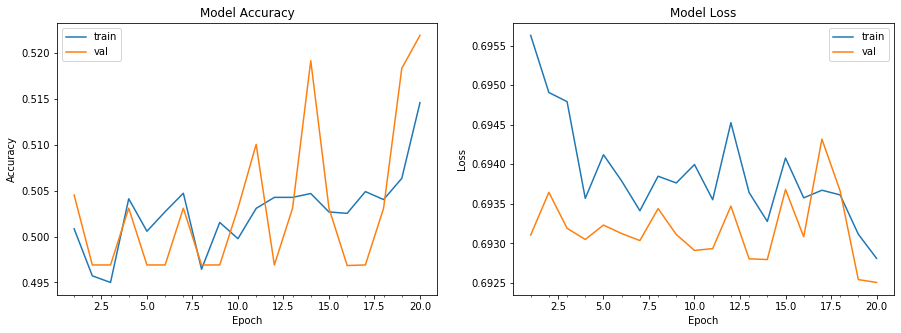

Confusion Martix [[5360 2922]
 [5046 3339]]
16667/16667 [==============================] - 1s 62us/step
[Loss,Accuracy]: [0.692505306199666, 0.5219295613908908]
Report : 
              precision    recall  f1-score   support

         0.0       0.52      0.65      0.57      8282
         1.0       0.53      0.40      0.46      8385

    accuracy                           0.52     16667
   macro avg       0.52      0.52      0.51     16667
weighted avg       0.52      0.52      0.51     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.6936 - acc: 0.5049 - val_loss: 0.6934 - val_acc: 0.4931
Epoch 2/20
 - 1s - loss: 0.6933 - acc: 0.5087 - val_loss: 0.6922 - val_acc: 0.5231
Epoch 3/20
 - 1s - loss: 0.6930 - acc: 0.5125 - val_loss: 0.6926 - val_acc: 0.5069
Epoch 4/20
 - 1s - loss: 0.6927 - acc: 0.5104 - val_loss: 0.6933 - val_acc: 0.4931
Epoch 5/20
 - 1s - loss: 0.6929 - acc: 0.5120 - val_loss: 0.6951 - val_acc: 0.4931
Epoch 6/20
 - 1s - loss: 0.6936 - acc

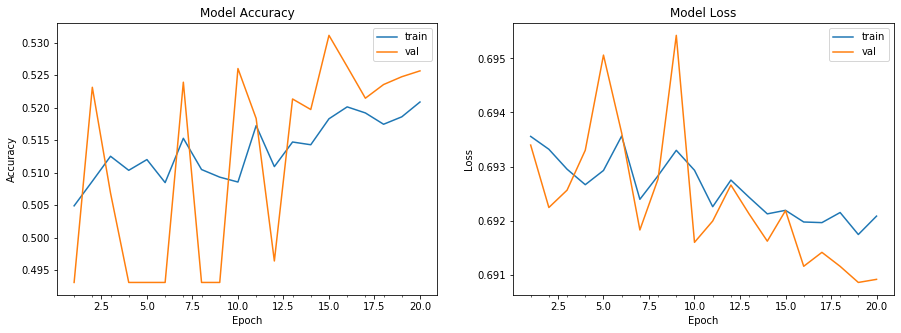

Confusion Martix [[6702 1746]
 [6160 2059]]
16667/16667 [==============================] - 1s 61us/step
[Loss,Accuracy]: [0.6909112385212356, 0.5256494870174122]
Report : 
              precision    recall  f1-score   support

         0.0       0.52      0.79      0.63      8448
         1.0       0.54      0.25      0.34      8219

    accuracy                           0.53     16667
   macro avg       0.53      0.52      0.49     16667
weighted avg       0.53      0.53      0.49     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.6927 - acc: 0.5183 - val_loss: 0.6933 - val_acc: 0.5038
Epoch 2/20
 - 1s - loss: 0.6924 - acc: 0.5168 - val_loss: 0.6914 - val_acc: 0.5202
Epoch 3/20
 - 1s - loss: 0.6908 - acc: 0.5262 - val_loss: 0.6915 - val_acc: 0.5402
Epoch 4/20
 - 1s - loss: 0.6913 - acc: 0.5252 - val_loss: 0.6911 - val_acc: 0.5217
Epoch 5/20
 - 1s - loss: 0.6909 - acc: 0.5258 - val_loss: 0.6916 - val_acc: 0.5161
Epoch 6/20
 - 1s - loss: 0.6902 - ac

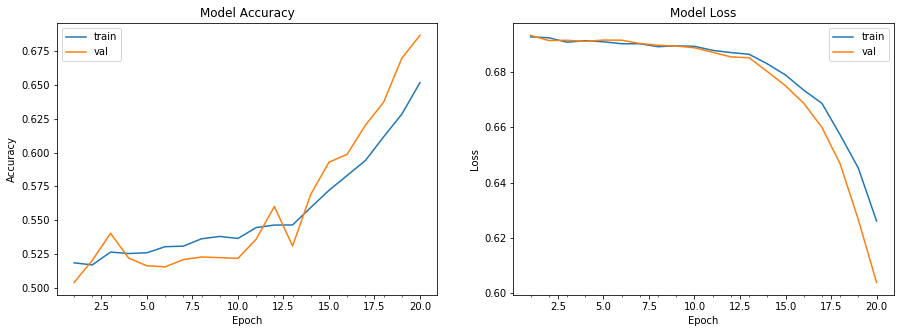

Confusion Martix [[5290 2980]
 [2240 6156]]
16666/16666 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.6038686581251931, 0.6867874715274713]
Report : 
              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67      8270
         1.0       0.67      0.73      0.70      8396

    accuracy                           0.69     16666
   macro avg       0.69      0.69      0.69     16666
weighted avg       0.69      0.69      0.69     16666

Average accuracy 0.5781221733119247


In [71]:
# Scenario 12
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25
# sigmoid for every hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model12 = Sequential()

#Input - Layer
model12.add(Embedding(top_words,32,input_length=max_words))
model12.add(Flatten())

#Hidden - Layers
model12.add(layers.Dense(64, activation="sigmoid"))
model12.add(layers.Dropout(0.25))
model12.add(layers.Dense(32, activation="sigmoid"))

#Output - Layer
model12.add(layers.Dense(1, activation = "sigmoid"))

model12.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model12.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model12.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model12.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model12.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg12 = np.average(acc)
print("Average accuracy",avg12);

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_52 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_52 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_130 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_42 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_131 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_132 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

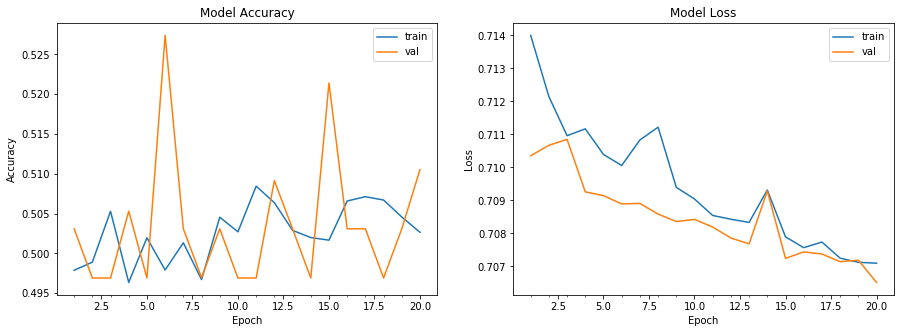

Confusion Martix [[7534  748]
 [7410  975]]
16667/16667 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.7065134664356312, 0.5105297894095763]
Report : 
              precision    recall  f1-score   support

         0.0       0.50      0.91      0.65      8282
         1.0       0.57      0.12      0.19      8385

    accuracy                           0.51     16667
   macro avg       0.54      0.51      0.42     16667
weighted avg       0.54      0.51      0.42     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.7069 - acc: 0.5050 - val_loss: 0.7061 - val_acc: 0.5275
Epoch 2/20
 - 1s - loss: 0.7071 - acc: 0.5052 - val_loss: 0.7061 - val_acc: 0.5164
Epoch 3/20
 - 1s - loss: 0.7071 - acc: 0.5020 - val_loss: 0.7057 - val_acc: 0.5166
Epoch 4/20
 - 1s - loss: 0.7068 - acc: 0.5072 - val_loss: 0.7058 - val_acc: 0.5156
Epoch 5/20
 - 1s - loss: 0.7061 - acc: 0.5078 - val_loss: 0.7061 - val_acc: 0.4931
Epoch 6/20
 - 1s - loss: 0.7062 - ac

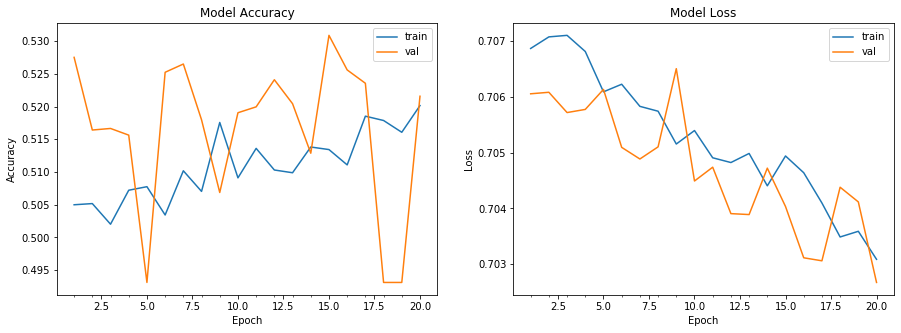

Confusion Martix [[4627 3821]
 [4153 4066]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.7026728366792699, 0.5215695686157802]
Report : 
              precision    recall  f1-score   support

         0.0       0.53      0.55      0.54      8448
         1.0       0.52      0.49      0.50      8219

    accuracy                           0.52     16667
   macro avg       0.52      0.52      0.52     16667
weighted avg       0.52      0.52      0.52     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.7027 - acc: 0.5241 - val_loss: 0.7030 - val_acc: 0.5206
Epoch 2/20
 - 1s - loss: 0.7026 - acc: 0.5236 - val_loss: 0.7038 - val_acc: 0.5123
Epoch 3/20
 - 1s - loss: 0.7023 - acc: 0.5228 - val_loss: 0.7030 - val_acc: 0.5158
Epoch 4/20
 - 1s - loss: 0.7022 - acc: 0.5273 - val_loss: 0.7043 - val_acc: 0.5104
Epoch 5/20
 - 1s - loss: 0.7027 - acc: 0.5205 - val_loss: 0.7031 - val_acc: 0.5131
Epoch 6/20
 - 1s - loss: 0.7017 - ac

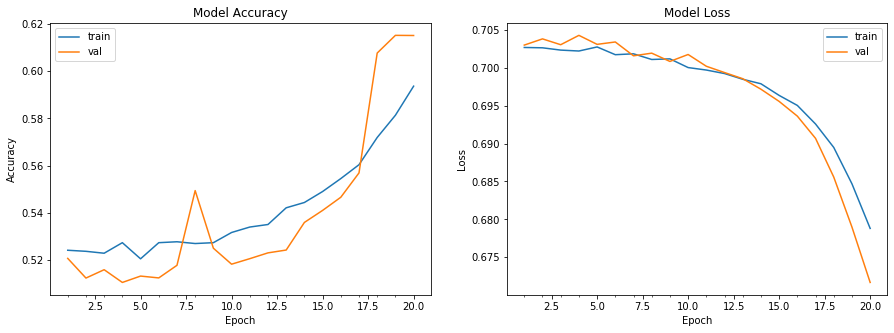

Confusion Martix [[6110 2160]
 [4254 4142]]
16666/16666 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.6716788201991298, 0.6151446057770785]
Report : 
              precision    recall  f1-score   support

         0.0       0.59      0.74      0.66      8270
         1.0       0.66      0.49      0.56      8396

    accuracy                           0.62     16666
   macro avg       0.62      0.62      0.61     16666
weighted avg       0.62      0.62      0.61     16666

Average accuracy 0.5490813212674784


In [72]:
# Scenario 13
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
# sigmoid for every hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95


#Create the model
model13 = Sequential()

#Input - Layer
model13.add(Embedding(top_words,32,input_length=max_words))
model13.add(Flatten())

#Hidden - Layers
model13.add(layers.Dense(64, activation="sigmoid",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))
model13.add(layers.Dropout(0.25))
model13.add(layers.Dense(32, activation="sigmoid",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))

#Output - Layer
model13.add(layers.Dense(1, activation = "sigmoid"))

model13.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model13.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model13.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose =2)
  
  plot_model_history(model_info)

  y_pred = model13.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model13.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg13 = np.average(acc)
print("Average accuracy",avg13);

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_53 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_53 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_133 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_43 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_134 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

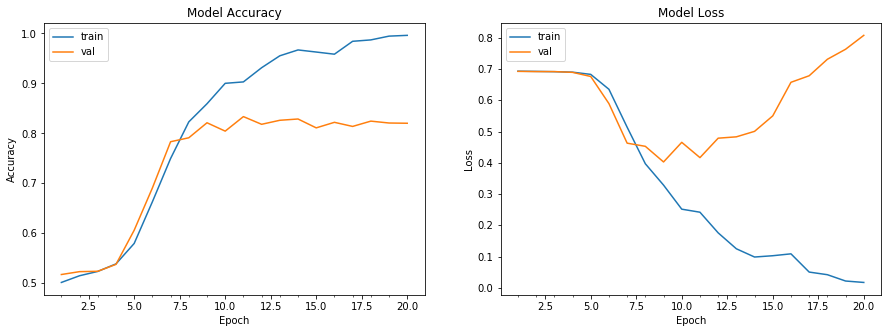

Confusion Martix [[7019 1263]
 [1734 6651]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.807791752533656, 0.8201835963388021]
Report : 
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      8282
         1.0       0.84      0.79      0.82      8385

    accuracy                           0.82     16667
   macro avg       0.82      0.82      0.82     16667
weighted avg       0.82      0.82      0.82     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.2808 - acc: 0.8971 - val_loss: 0.1180 - val_acc: 0.9598
Epoch 2/20
 - 1s - loss: 0.1786 - acc: 0.9341 - val_loss: 0.1036 - val_acc: 0.9644
Epoch 3/20
 - 1s - loss: 0.1412 - acc: 0.9476 - val_loss: 0.1493 - val_acc: 0.9447
Epoch 4/20
 - 1s - loss: 0.0996 - acc: 0.9651 - val_loss: 0.0979 - val_acc: 0.9631
Epoch 5/20
 - 1s - loss: 0.0727 - acc: 0.9751 - val_loss: 0.0871 - val_acc: 0.9687
Epoch 6/20
 - 1s - loss: 0.0554 - acc

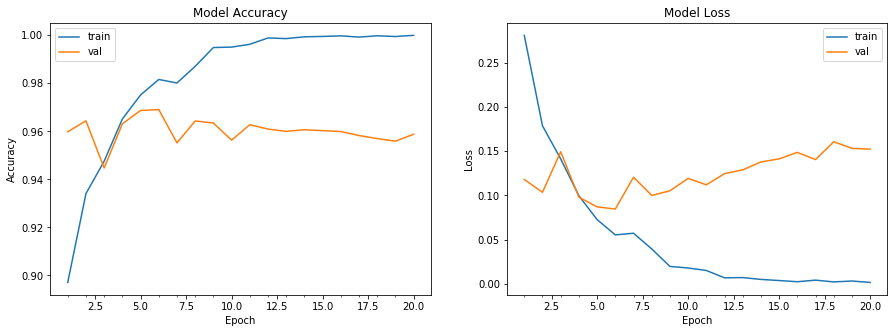

Confusion Martix [[8033  415]
 [ 272 7947]]
16667/16667 [==============================] - 1s 63us/step
[Loss,Accuracy]: [0.15225256420646793, 0.9587808244192744]
Report : 
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      8448
         1.0       0.95      0.97      0.96      8219

    accuracy                           0.96     16667
   macro avg       0.96      0.96      0.96     16667
weighted avg       0.96      0.96      0.96     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.2414 - acc: 0.9128 - val_loss: 0.2899 - val_acc: 0.8781
Epoch 2/20
 - 1s - loss: 0.2219 - acc: 0.9074 - val_loss: 0.0636 - val_acc: 0.9758
Epoch 3/20
 - 1s - loss: 0.2506 - acc: 0.8984 - val_loss: 0.1704 - val_acc: 0.9572
Epoch 4/20
 - 1s - loss: 0.1047 - acc: 0.9592 - val_loss: 0.0725 - val_acc: 0.9742
Epoch 5/20
 - 1s - loss: 0.0845 - acc: 0.9677 - val_loss: 0.0812 - val_acc: 0.9680
Epoch 6/20
 - 1s - loss: 0.0427 - a

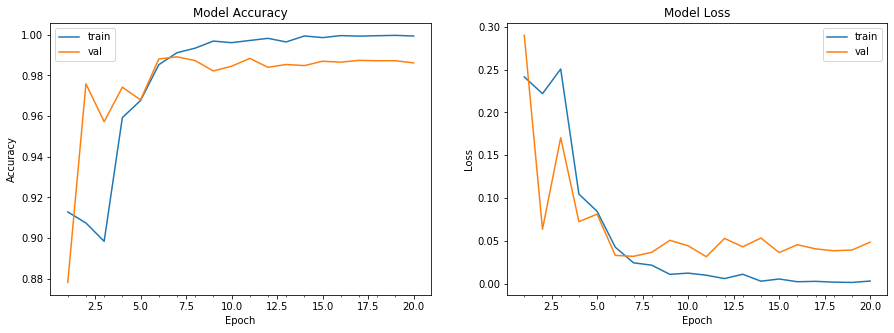

Confusion Martix [[8185   85]
 [ 146 8250]]
16666/16666 [==============================] - 1s 62us/step
[Loss,Accuracy]: [0.048585912357061126, 0.9861394455778231]
Report : 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      8270
         1.0       0.99      0.98      0.99      8396

    accuracy                           0.99     16666
   macro avg       0.99      0.99      0.99     16666
weighted avg       0.99      0.99      0.99     16666

Average accuracy 0.9217012887786332


In [73]:
# Scenario 14
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25 
# relu for every hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model14 = Sequential()

#Input - Layer
model14.add(Embedding(top_words,32,input_length=max_words))
model14.add(Flatten())

#Hidden - Layers
model14.add(layers.Dense(64, activation="relu"))
model14.add(layers.Dropout(0.25))
model14.add(layers.Dense(32, activation="relu"))

#Output - Layer
model14.add(layers.Dense(1, activation = "sigmoid"))

model14.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model14.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model14.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose =2)
  
  plot_model_history(model_info)

  y_pred = model14.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model14.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg14 = np.average(acc)
print("Average accuracy",avg14);

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_54 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_54 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_136 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_44 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_137 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_138 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

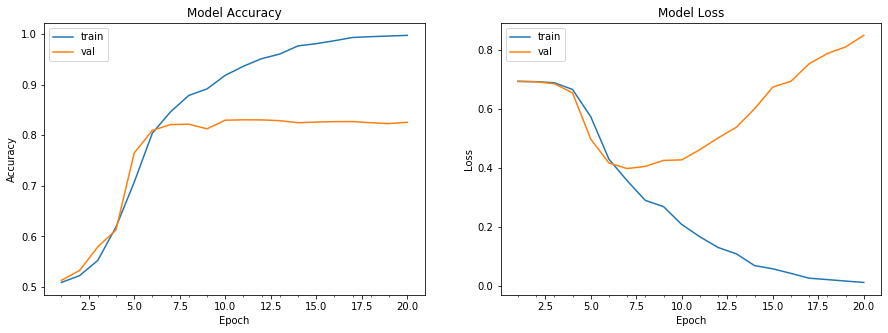

Confusion Martix [[6903 1379]
 [1526 6859]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.8489929508499874, 0.8257034859159765]
Report : 
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      8282
         1.0       0.83      0.82      0.83      8385

    accuracy                           0.83     16667
   macro avg       0.83      0.83      0.83     16667
weighted avg       0.83      0.83      0.83     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.3065 - acc: 0.8860 - val_loss: 0.1206 - val_acc: 0.9630
Epoch 2/20
 - 1s - loss: 0.2285 - acc: 0.9121 - val_loss: 0.1208 - val_acc: 0.9657
Epoch 3/20
 - 1s - loss: 0.1504 - acc: 0.9443 - val_loss: 0.0899 - val_acc: 0.9696
Epoch 4/20
 - 1s - loss: 0.1117 - acc: 0.9602 - val_loss: 0.1149 - val_acc: 0.9545
Epoch 5/20
 - 1s - loss: 0.0740 - acc: 0.9762 - val_loss: 0.0852 - val_acc: 0.9671
Epoch 6/20
 - 1s - loss: 0.0605 - ac

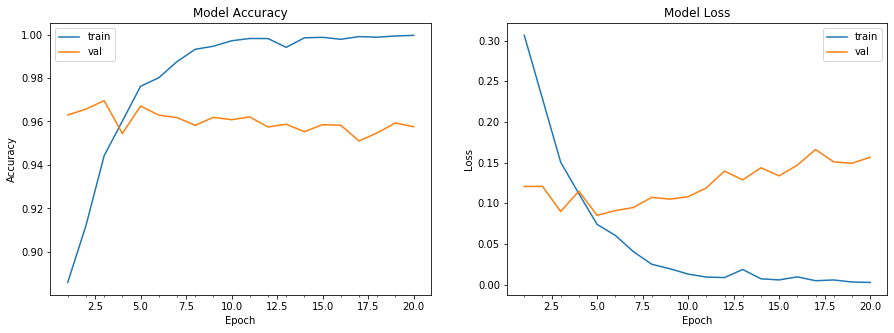

Confusion Martix [[8010  438]
 [ 269 7950]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.1566084619898185, 0.9575808484187944]
Report : 
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      8448
         1.0       0.95      0.97      0.96      8219

    accuracy                           0.96     16667
   macro avg       0.96      0.96      0.96     16667
weighted avg       0.96      0.96      0.96     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.2533 - acc: 0.9272 - val_loss: 0.4176 - val_acc: 0.8496
Epoch 2/20
 - 1s - loss: 0.5912 - acc: 0.6793 - val_loss: 0.5154 - val_acc: 0.7552
Epoch 3/20
 - 1s - loss: 0.3725 - acc: 0.8209 - val_loss: 0.1434 - val_acc: 0.9696
Epoch 4/20
 - 1s - loss: 0.3268 - acc: 0.8559 - val_loss: 0.9177 - val_acc: 0.5662
Epoch 5/20
 - 1s - loss: 0.6249 - acc: 0.5811 - val_loss: 0.6251 - val_acc: 0.5514
Epoch 6/20
 - 1s - loss: 0.6099 - ac

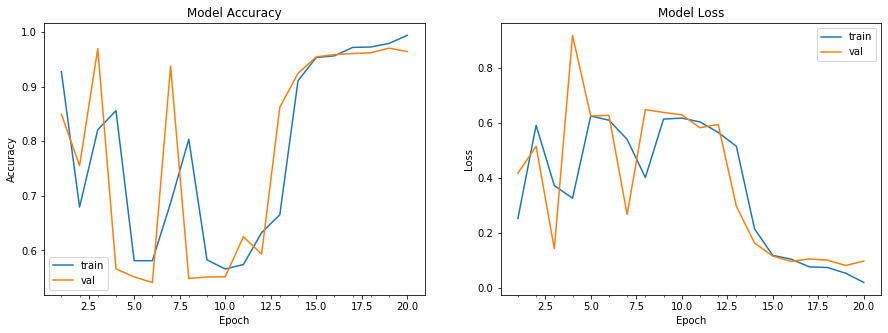

Confusion Martix [[8031  239]
 [ 360 8036]]
16666/16666 [==============================] - 1s 66us/step
[Loss,Accuracy]: [0.09844207213539977, 0.9640585623424937]
Report : 
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      8270
         1.0       0.97      0.96      0.96      8396

    accuracy                           0.96     16666
   macro avg       0.96      0.96      0.96     16666
weighted avg       0.96      0.96      0.96     16666

Average accuracy 0.9157809655590882


In [74]:
# Scenario 15
# 2 Hidden Layers of 64-32 units
# Dropout of ratio 0.25
# relu for every hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model15 = Sequential()

#Input - Layer
model15.add(Embedding(top_words,32,input_length=max_words))
model15.add(Flatten())

#Hidden - Layers
model15.add(layers.Dense(64, activation="relu"))
model15.add(layers.Dropout(0.25))
model15.add(layers.Dense(32, activation="relu"))

#Output - Layer
model15.add(layers.Dense(1, activation = "sigmoid"))

model15.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model15.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model15.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model15.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model15.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg15 = np.average(acc)
print("Average accuracy",avg15);

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_55 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_55 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_139 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_45 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_140 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

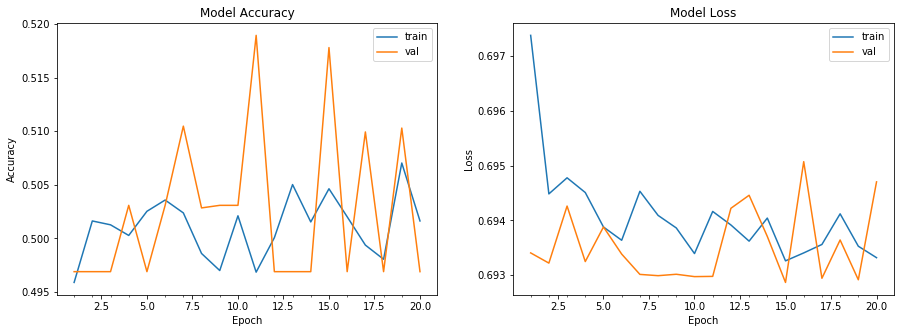

Confusion Martix [[8282    0]
 [8385    0]]
16667/16667 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.6947046005140078, 0.4969100617916116]
Report : 
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.66      8282
         1.0       0.00      0.00      0.00      8385

    accuracy                           0.50     16667
   macro avg       0.25      0.50      0.33     16667
weighted avg       0.25      0.50      0.33     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 - 1s - loss: 0.6934 - acc: 0.5062 - val_loss: 0.6926 - val_acc: 0.5228
Epoch 2/20
 - 1s - loss: 0.6931 - acc: 0.5093 - val_loss: 0.6947 - val_acc: 0.4931
Epoch 3/20
 - 1s - loss: 0.6932 - acc: 0.5103 - val_loss: 0.6933 - val_acc: 0.4931
Epoch 4/20
 - 1s - loss: 0.6930 - acc: 0.5105 - val_loss: 0.6937 - val_acc: 0.4931
Epoch 5/20
 - 1s - loss: 0.6931 - acc: 0.5084 - val_loss: 0.6923 - val_acc: 0.5249
Epoch 6/20
 - 1s - loss: 0.6930 - acc: 0.5084 - val_loss: 0.6933 - val_acc: 0.4931
Epoch 7/20
 - 1s - loss: 0.6934 - acc: 0.5066 - val_loss: 0.6926 - val_acc: 0.5154
Epoch 8/20
 - 1s - loss: 0.6932 - acc: 0.5068 - val_loss: 0.6951 - val_acc: 0.4931
Epoch 9/20
 - 1s - loss: 0.6930 - acc: 0.5104 - val_loss: 0.6930 - val_acc: 0.4931
Epoch 10/20
 - 1s - loss: 0.6926 - acc: 0.5106 - val_loss: 0.6920 - val_acc: 0.5237
Epoch 11/20
 - 1s - loss: 0.6930 - acc: 0.5117 - val_loss: 0.6921 - val_acc: 0.5205
Epoch 12/20
 - 1s - loss: 0.6926 - acc: 0.5130 - val_loss: 0.6919 - val_acc: 0.5261
Epoch 13/20


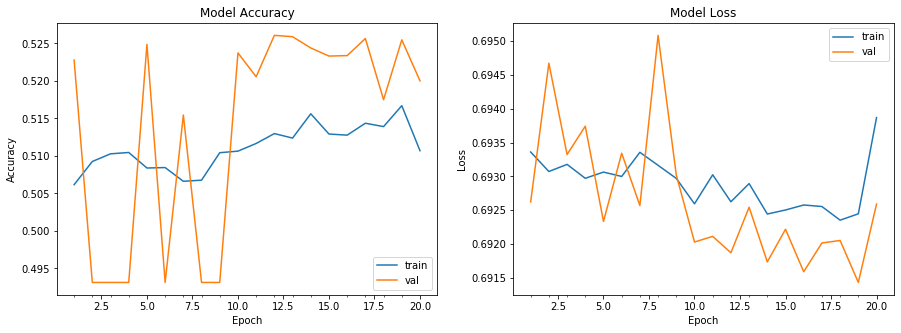

Confusion Martix [[7879  569]
 [7431  788]]
16667/16667 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.6925914413306582, 0.5200095998509183]
Report : 
              precision    recall  f1-score   support

         0.0       0.51      0.93      0.66      8448
         1.0       0.58      0.10      0.16      8219

    accuracy                           0.52     16667
   macro avg       0.55      0.51      0.41     16667
weighted avg       0.55      0.52      0.42     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.6926 - acc: 0.5173 - val_loss: 0.6950 - val_acc: 0.5053
Epoch 2/20
 - 1s - loss: 0.6926 - acc: 0.5173 - val_loss: 0.6919 - val_acc: 0.5172
Epoch 3/20
 - 1s - loss: 0.6916 - acc: 0.5218 - val_loss: 0.6919 - val_acc: 0.5163
Epoch 4/20
 - 1s - loss: 0.6918 - acc: 0.5202 - val_loss: 0.6928 - val_acc: 0.5119
Epoch 5/20
 - 1s - loss: 0.6917 - acc: 0.5205 - val_loss: 0.6926 - val_acc: 0.5132
Epoch 6/20
 - 1s - loss: 0.6918 - ac

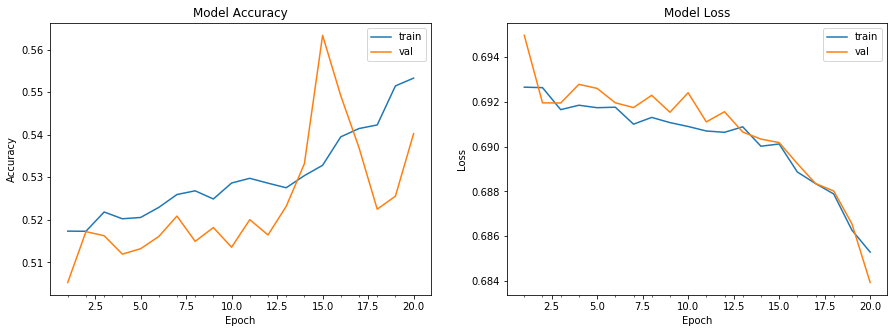

Confusion Martix [[6346 1924]
 [5738 2658]]
16666/16666 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.6839370258097944, 0.5402616104751479]
Report : 
              precision    recall  f1-score   support

         0.0       0.53      0.77      0.62      8270
         1.0       0.58      0.32      0.41      8396

    accuracy                           0.54     16666
   macro avg       0.55      0.54      0.52     16666
weighted avg       0.55      0.54      0.52     16666

Average accuracy 0.5190604240392259


In [75]:
# Scenario 16
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25
# sigmoid for every hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model16 = Sequential()

#Input - Layer
model16.add(Embedding(top_words,32,input_length=max_words))
model16.add(Flatten())

#Hidden - Layers
model16.add(layers.Dense(64, activation="sigmoid"))
model16.add(layers.Dropout(0.25))
model16.add(layers.Dense(32, activation="sigmoid"))

#Output - Layer
model16.add(layers.Dense(1, activation = "sigmoid"))

model16.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model16.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model16.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model16.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model16.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg16 = np.average(acc)
print("Average accuracy",avg16);

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_56 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_56 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_142 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dropout_46 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_143 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 33        
Total params: 1,346,177
Trainable params: 1,346,177
Non-trainable params: 0
___________________________________________

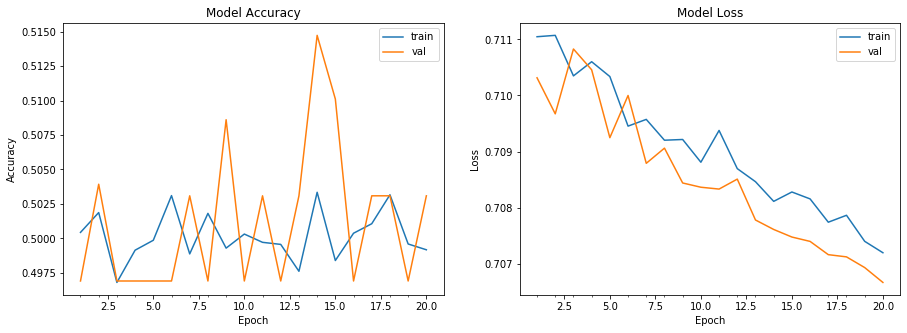

Confusion Martix [[   0 8282]
 [   0 8385]]
16667/16667 [==============================] - 1s 69us/step
[Loss,Accuracy]: [0.7066676761218995, 0.5030899382083884]
Report : 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      8282
         1.0       0.50      1.00      0.67      8385

    accuracy                           0.50     16667
   macro avg       0.25      0.50      0.33     16667
weighted avg       0.25      0.50      0.34     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 - 1s - loss: 0.7071 - acc: 0.5055 - val_loss: 0.7081 - val_acc: 0.4931
Epoch 2/20
 - 1s - loss: 0.7066 - acc: 0.5077 - val_loss: 0.7069 - val_acc: 0.4931
Epoch 3/20
 - 1s - loss: 0.7068 - acc: 0.5008 - val_loss: 0.7081 - val_acc: 0.4931
Epoch 4/20
 - 1s - loss: 0.7071 - acc: 0.5028 - val_loss: 0.7062 - val_acc: 0.4931
Epoch 5/20
 - 1s - loss: 0.7066 - acc: 0.5017 - val_loss: 0.7061 - val_acc: 0.4931
Epoch 6/20
 - 1s - loss: 0.7062 - acc: 0.5001 - val_loss: 0.7058 - val_acc: 0.5069
Epoch 7/20
 - 1s - loss: 0.7062 - acc: 0.4997 - val_loss: 0.7057 - val_acc: 0.5149
Epoch 8/20
 - 1s - loss: 0.7061 - acc: 0.5031 - val_loss: 0.7068 - val_acc: 0.4931
Epoch 9/20
 - 1s - loss: 0.7059 - acc: 0.5013 - val_loss: 0.7053 - val_acc: 0.5259
Epoch 10/20
 - 1s - loss: 0.7061 - acc: 0.5035 - val_loss: 0.7058 - val_acc: 0.4931
Epoch 11/20
 - 1s - loss: 0.7057 - acc: 0.5013 - val_loss: 0.7050 - val_acc: 0.5247
Epoch 12/20
 - 1s - loss: 0.7052 - acc: 0.5069 - val_loss: 0.7049 - val_acc: 0.5156
Epoch 13/20


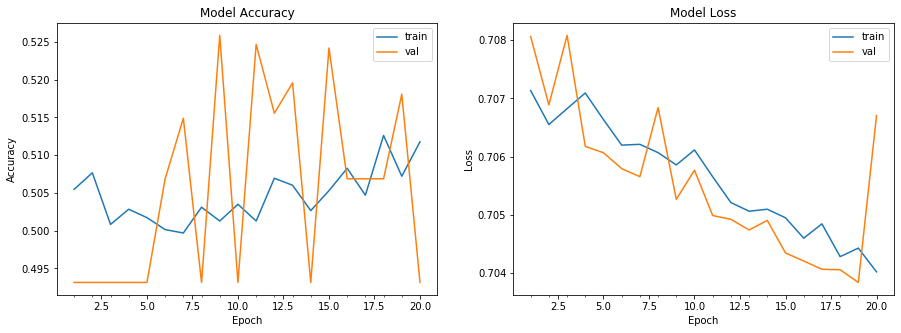

Confusion Martix [[   0 8448]
 [   0 8219]]
16667/16667 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.7067047998951959, 0.4931301374151331]
Report : 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      8448
         1.0       0.49      1.00      0.66      8219

    accuracy                           0.49     16667
   macro avg       0.25      0.50      0.33     16667
weighted avg       0.24      0.49      0.33     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 - 1s - loss: 0.7044 - acc: 0.5028 - val_loss: 0.7047 - val_acc: 0.4962
Epoch 2/20
 - 1s - loss: 0.7038 - acc: 0.5099 - val_loss: 0.7041 - val_acc: 0.5091
Epoch 3/20
 - 1s - loss: 0.7036 - acc: 0.5122 - val_loss: 0.7042 - val_acc: 0.5076
Epoch 4/20
 - 1s - loss: 0.7031 - acc: 0.5178 - val_loss: 0.7034 - val_acc: 0.5144
Epoch 5/20
 - 1s - loss: 0.7034 - acc: 0.5150 - val_loss: 0.7031 - val_acc: 0.5145
Epoch 6/20
 - 1s - loss: 0.7029 - acc: 0.5148 - val_loss: 0.7033 - val_acc: 0.5106
Epoch 7/20
 - 1s - loss: 0.7031 - acc: 0.5138 - val_loss: 0.7033 - val_acc: 0.5104
Epoch 8/20
 - 1s - loss: 0.7029 - acc: 0.5138 - val_loss: 0.7063 - val_acc: 0.4962
Epoch 9/20
 - 1s - loss: 0.7024 - acc: 0.5183 - val_loss: 0.7029 - val_acc: 0.5133
Epoch 10/20
 - 1s - loss: 0.7027 - acc: 0.5140 - val_loss: 0.7025 - val_acc: 0.5133
Epoch 11/20
 - 1s - loss: 0.7021 - acc: 0.5210 - val_loss: 0.7024 - val_acc: 0.5129
Epoch 12/20
 - 1s - loss: 0.7019 - acc: 0.5194 - val_loss: 0.7023 - val_acc: 0.5145
Epoch 13/20


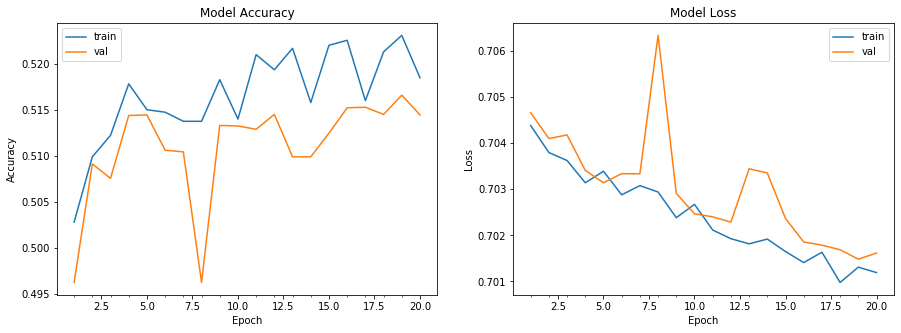

Confusion Martix [[3114 5156]
 [2936 5460]]
16666/16666 [==============================] - 1s 68us/step
[Loss,Accuracy]: [0.7016166775835729, 0.514460578415984]
Report : 
              precision    recall  f1-score   support

         0.0       0.51      0.38      0.43      8270
         1.0       0.51      0.65      0.57      8396

    accuracy                           0.51     16666
   macro avg       0.51      0.51      0.50     16666
weighted avg       0.51      0.51      0.51     16666

Average accuracy 0.5035602180131685


In [76]:
# Scenario 17
# 2 Hidden Layer of 64-32 units
# Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
# sigmoid for every hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model17 = Sequential()

#Input - Layer
model17.add(Embedding(top_words,32,input_length=max_words))
model17.add(Flatten())

#Hidden - Layers
model17.add(layers.Dense(64, activation="sigmoid",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))
model17.add(layers.Dropout(0.25))
model17.add(layers.Dense(32, activation="sigmoid",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))

#Output - Layer
model17.add(layers.Dense(1, activation = "sigmoid"))

model17.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model17.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model17.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model17.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model17.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg17 = np.average(acc)
print("Average accuracy",avg17);

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_57 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_57 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_145 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 7s - loss: 0.3900 - acc: 0.8115 - val_loss: 0.2720 - val_acc: 0.8867
Epoch 2/20
 - 3s - loss: 0.1634 - acc: 0.9388 - val_loss: 0.2899 - val_acc: 0.8850
Epoch 3/20
 - 3s - loss: 

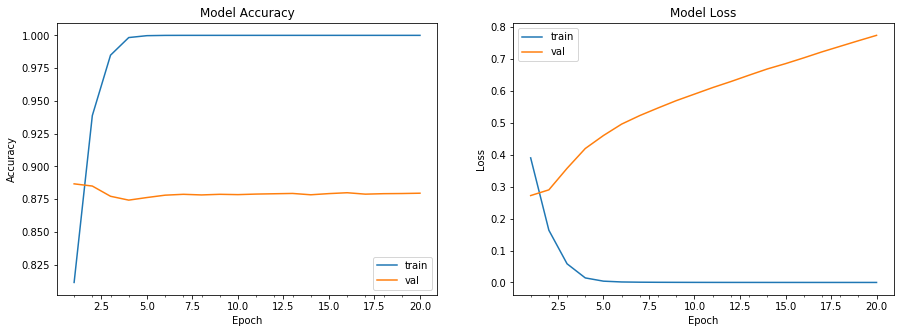

Confusion Martix [[7330  952]
 [1055 7330]]
16667/16667 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.7735179693316802, 0.8795824083625616]
Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      8282
         1.0       0.89      0.87      0.88      8385

    accuracy                           0.88     16667
   macro avg       0.88      0.88      0.88     16667
weighted avg       0.88      0.88      0.88     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.2277 - acc: 0.9294 - val_loss: 0.0609 - val_acc: 0.9866
Epoch 2/20
 - 3s - loss: 0.0515 - acc: 0.9875 - val_loss: 0.0281 - val_acc: 0.9921
Epoch 3/20
 - 3s - loss: 0.0176 - acc: 0.9973 - val_loss: 0.0231 - val_acc: 0.9929
Epoch 4/20
 - 3s - loss: 0.0072 - acc: 0.9991 - val_loss: 0.0238 - val_acc: 0.9921
Epoch 5/20
 - 3s - loss: 0.0037 - acc: 0.9997 - val_loss: 0.0225 - val_acc: 0.9921
Epoch 6/20
 - 3s - loss: 0.0023 - ac

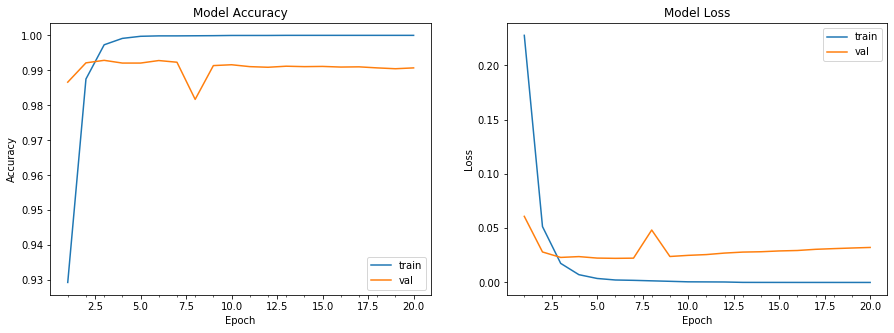

Confusion Martix [[8356   92]
 [  63 8156]]
16667/16667 [==============================] - 1s 63us/step
[Loss,Accuracy]: [0.032259289217363145, 0.9907001860320421]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8448
         1.0       0.99      0.99      0.99      8219

    accuracy                           0.99     16667
   macro avg       0.99      0.99      0.99     16667
weighted avg       0.99      0.99      0.99     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.0544 - acc: 0.9839 - val_loss: 0.0092 - val_acc: 0.9971
Epoch 2/20
 - 3s - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0071 - val_acc: 0.9977
Epoch 3/20
 - 3s - loss: 3.9696e-04 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.9980
Epoch 4/20
 - 3s - loss: 2.4316e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.9982
Epoch 5/20
 - 3s - loss: 1.7093e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9982
Epoch 6/20
 - 3s - los

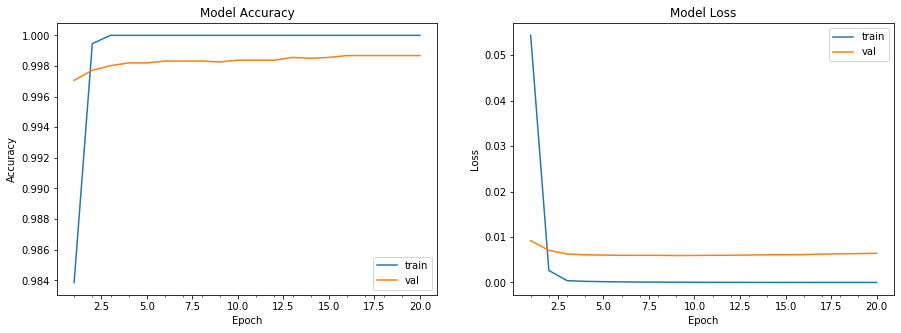

Confusion Martix [[8259   11]
 [  11 8385]]
16666/16666 [==============================] - 1s 61us/step
[Loss,Accuracy]: [0.006425761024093969, 0.9986799471978879]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8270
         1.0       1.00      1.00      1.00      8396

    accuracy                           1.00     16666
   macro avg       1.00      1.00      1.00     16666
weighted avg       1.00      1.00      1.00     16666

Average accuracy 0.9563208471974972


In [77]:
# Scenario 18
# 1 Hidden Layer of 64 units
# No Dropout
# Sigmoid in the hidden layer
# Batch Size 64
# Adam with lr 1e-03

#Create the model
model18 = Sequential()

#Input - Layer
model18.add(Embedding(top_words,32,input_length=max_words))
model18.add(Flatten())

#Hidden - Layers
model18.add(layers.Dense(64, activation="sigmoid"))

#Output - Layer
model18.add(layers.Dense(1, activation = "sigmoid"))

model18.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model18.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model18.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose = 2)
  
  plot_model_history(model_info)

  y_pred = model18.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model18.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg18 = np.average(acc)
print("Average accuracy",avg18);

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_58 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_58 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_147 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_148 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 7s - loss: 0.6964 - acc: 0.5053 - val_loss: 0.6919 - val_acc: 0.5154
Epoch 2/20
 - 3s - loss: 0.6897 - acc: 0.5411 - val_loss: 0.6800 - val_acc: 0.5374
Epoch 3/20
 - 3s - loss: 

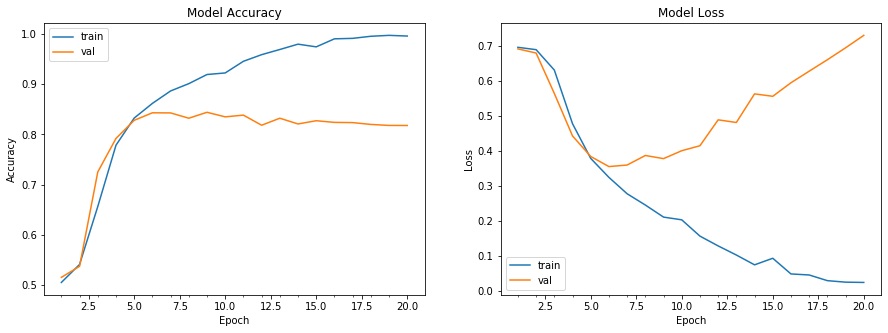

Confusion Martix [[6845 1437]
 [1604 6781]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.7305600521996061, 0.8175436491735082]
Report : 
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      8282
         1.0       0.83      0.81      0.82      8385

    accuracy                           0.82     16667
   macro avg       0.82      0.82      0.82     16667
weighted avg       0.82      0.82      0.82     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.3641 - acc: 0.8921 - val_loss: 0.2887 - val_acc: 0.8756
Epoch 2/20
 - 3s - loss: 0.1584 - acc: 0.9431 - val_loss: 0.0734 - val_acc: 0.9765
Epoch 3/20
 - 3s - loss: 0.0938 - acc: 0.9728 - val_loss: 0.1445 - val_acc: 0.9477
Epoch 4/20
 - 3s - loss: 0.0688 - acc: 0.9820 - val_loss: 0.1035 - val_acc: 0.9603
Epoch 5/20
 - 3s - loss: 0.0436 - acc: 0.9922 - val_loss: 0.0801 - val_acc: 0.9699
Epoch 6/20
 - 3s - loss: 0.0319 - ac

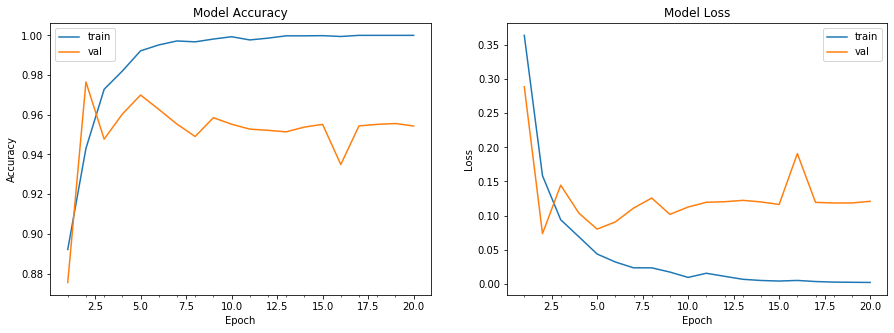

Confusion Martix [[8037  411]
 [ 350 7869]]
16667/16667 [==============================] - 1s 63us/step
[Loss,Accuracy]: [0.12084857390198542, 0.9543409131817364]
Report : 
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      8448
         1.0       0.95      0.96      0.95      8219

    accuracy                           0.95     16667
   macro avg       0.95      0.95      0.95     16667
weighted avg       0.95      0.95      0.95     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.1047 - acc: 0.9643 - val_loss: 0.0174 - val_acc: 0.9957
Epoch 2/20
 - 3s - loss: 0.0383 - acc: 0.9876 - val_loss: 0.0410 - val_acc: 0.9858
Epoch 3/20
 - 3s - loss: 0.0127 - acc: 0.9981 - val_loss: 0.0070 - val_acc: 0.9992
Epoch 4/20
 - 3s - loss: 0.0063 - acc: 0.9993 - val_loss: 0.0206 - val_acc: 0.9941
Epoch 5/20
 - 3s - loss: 0.0039 - acc: 0.9998 - val_loss: 0.0059 - val_acc: 0.9992
Epoch 6/20
 - 3s - loss: 0.0048 - a

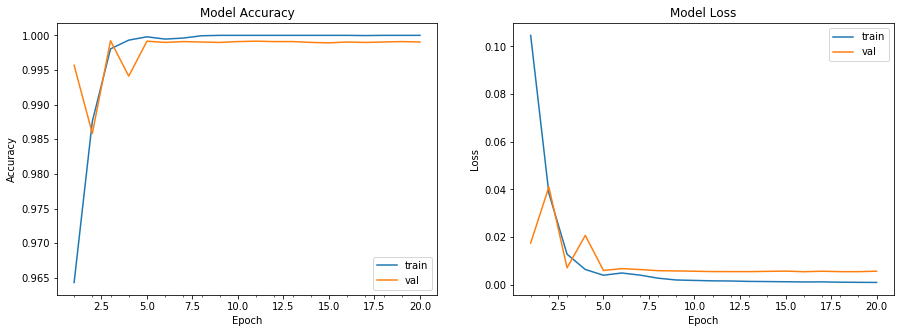

Confusion Martix [[8256   14]
 [   2 8394]]
16666/16666 [==============================] - 1s 63us/step
[Loss,Accuracy]: [0.005597652062552917, 0.999039961598464]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8270
         1.0       1.00      1.00      1.00      8396

    accuracy                           1.00     16666
   macro avg       1.00      1.00      1.00     16666
weighted avg       1.00      1.00      1.00     16666

Average accuracy 0.9236415079845696


In [78]:
# Scenario 19
# 1 Hidden Layer of 64 units
# No Dropout
# Sigmoid in the hidden layer
# Batch Size 64
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model19 = Sequential()

#Input - Layer
model19.add(Embedding(top_words,32,input_length=max_words))
model19.add(Flatten())

#Hidden - Layers
model19.add(layers.Dense(64, activation="sigmoid"))

#Output - Layer
model19.add(layers.Dense(1, activation = "sigmoid"))

model19.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model19.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model19.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model19.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model19.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg19 = np.average(acc)
print("Average accuracy",avg19);

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_59 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_59 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_149 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_150 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 5s - loss: 0.4950 - acc: 0.7554 - val_loss: 0.3012 - val_acc: 0.8739
Epoch 2/20
 - 1s - loss: 0.2246 - acc: 0.9126 - val_loss: 0.2782 - val_acc: 0.8855
Epoch 3/20
 - 1s - loss: 

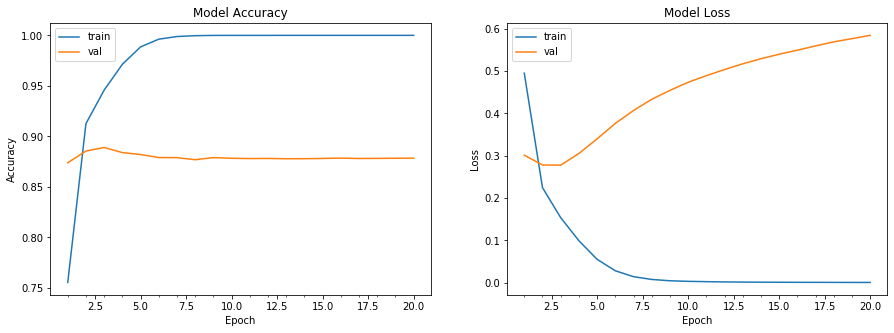

Confusion Martix [[7274 1008]
 [1018 7367]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.5846848894334651, 0.8784424311263436]
Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      8282
         1.0       0.88      0.88      0.88      8385

    accuracy                           0.88     16667
   macro avg       0.88      0.88      0.88     16667
weighted avg       0.88      0.88      0.88     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.2397 - acc: 0.9324 - val_loss: 0.0376 - val_acc: 0.9940
Epoch 2/20
 - 1s - loss: 0.0476 - acc: 0.9895 - val_loss: 0.0256 - val_acc: 0.9956
Epoch 3/20
 - 1s - loss: 0.0181 - acc: 0.9976 - val_loss: 0.0224 - val_acc: 0.9953
Epoch 4/20
 - 1s - loss: 0.0082 - acc: 0.9994 - val_loss: 0.0201 - val_acc: 0.9949
Epoch 5/20
 - 1s - loss: 0.0049 - acc: 0.9998 - val_loss: 0.0198 - val_acc: 0.9945
Epoch 6/20
 - 1s - loss: 0.0035 - ac

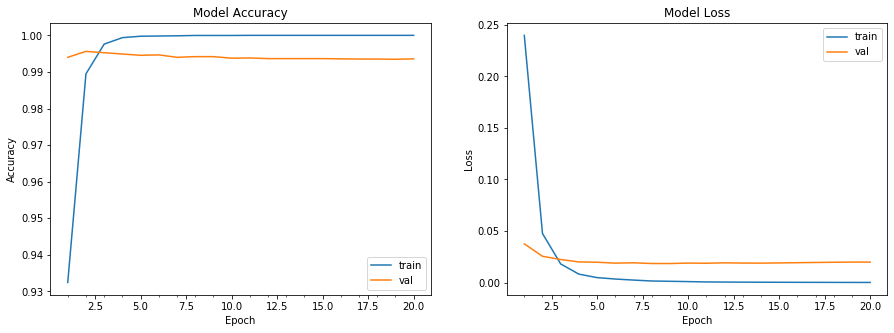

Confusion Martix [[8383   65]
 [  42 8177]]
16667/16667 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.019944050720801597, 0.993580128397432]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      8448
         1.0       0.99      0.99      0.99      8219

    accuracy                           0.99     16667
   macro avg       0.99      0.99      0.99     16667
weighted avg       0.99      0.99      0.99     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0014 - val_acc: 0.9996
Epoch 2/20
 - 1s - loss: 0.0029 - acc: 0.9993 - val_loss: 0.0012 - val_acc: 0.9999
Epoch 3/20
 - 1s - loss: 5.7215e-04 - acc: 1.0000 - val_loss: 7.4555e-04 - val_acc: 0.9999
Epoch 4/20
 - 1s - loss: 2.7085e-04 - acc: 1.0000 - val_loss: 7.6615e-04 - val_acc: 0.9998
Epoch 5/20
 - 1s - loss: 2.1606e-04 - acc: 1.0000 - val_loss: 6.9789e-04 - val_acc: 0.9998
Epoch 6/20


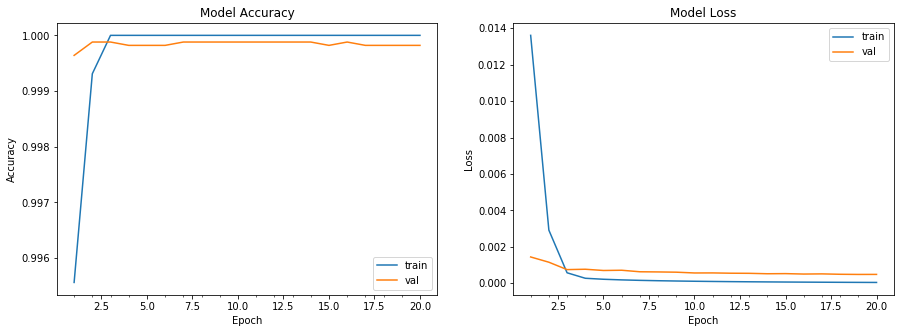

Confusion Martix [[8270    0]
 [   3 8393]]
16666/16666 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.0004829740221356497, 0.999819992799712]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8270
         1.0       1.00      1.00      1.00      8396

    accuracy                           1.00     16666
   macro avg       1.00      1.00      1.00     16666
weighted avg       1.00      1.00      1.00     16666

Average accuracy 0.9572808507744958


In [79]:
# Scenario 20
# 1 Hidden Layer of 64 units
# No Dropout
# Sigmoid in the hidden layer
# Batch Size 256
# Adam with lr 1e-03

#Create the model
model20 = Sequential()

#Input - Layer
model20.add(Embedding(top_words,32,input_length=max_words))
model20.add(Flatten())

#Hidden - Layers
model20.add(layers.Dense(64, activation="sigmoid"))

#Output - Layer
model20.add(layers.Dense(1, activation = "sigmoid"))

model20.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model20.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model20.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model20.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model20.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg20 = np.average(acc)
print("Average accuracy",avg20);

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_60 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_60 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_151 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 5s - loss: 0.6997 - acc: 0.4998 - val_loss: 0.6936 - val_acc: 0.4970
Epoch 2/20
 - 1s - loss: 0.6936 - acc: 0.5066 - val_loss: 0.6923 - val_acc: 0.5227
Epoch 3/20
 - 1s - loss: 

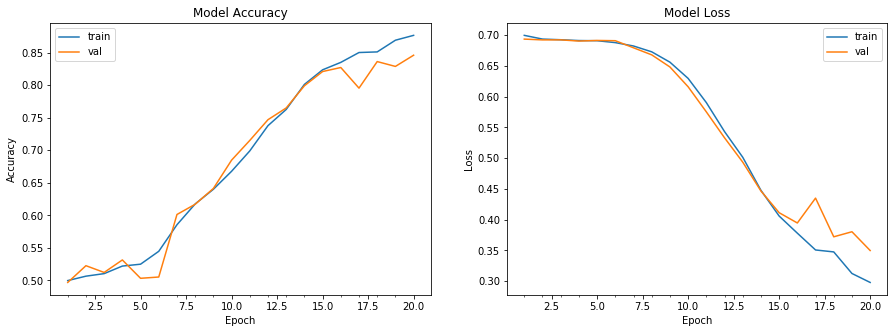

Confusion Martix [[6868 1414]
 [1152 7233]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.3498110754639241, 0.8460430791241124]
Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      8282
         1.0       0.84      0.86      0.85      8385

    accuracy                           0.85     16667
   macro avg       0.85      0.85      0.85     16667
weighted avg       0.85      0.85      0.85     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.3244 - acc: 0.8620 - val_loss: 0.3073 - val_acc: 0.8687
Epoch 2/20
 - 1s - loss: 0.3087 - acc: 0.8687 - val_loss: 0.2937 - val_acc: 0.8770
Epoch 3/20
 - 1s - loss: 0.2903 - acc: 0.8780 - val_loss: 0.2942 - val_acc: 0.8753
Epoch 4/20
 - 1s - loss: 0.2730 - acc: 0.8893 - val_loss: 0.3150 - val_acc: 0.8662
Epoch 5/20
 - 1s - loss: 0.2641 - acc: 0.8944 - val_loss: 0.2618 - val_acc: 0.8913
Epoch 6/20
 - 1s - loss: 0.2529 - ac

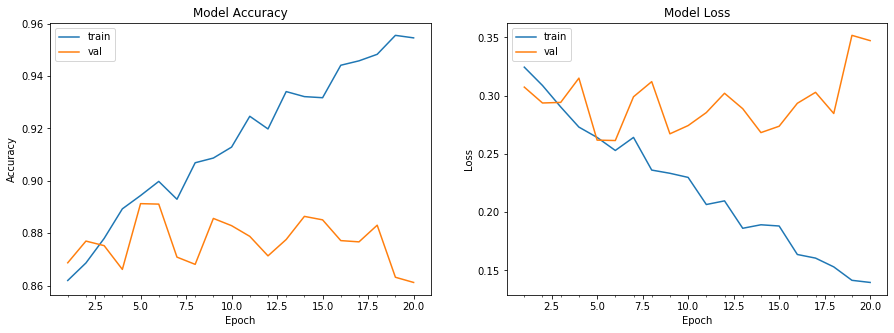

Confusion Martix [[7244 1204]
 [1109 7110]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.3471821668449587, 0.8612227755552178]
Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      8448
         1.0       0.86      0.87      0.86      8219

    accuracy                           0.86     16667
   macro avg       0.86      0.86      0.86     16667
weighted avg       0.86      0.86      0.86     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.2436 - acc: 0.9067 - val_loss: 0.1863 - val_acc: 0.9333
Epoch 2/20
 - 1s - loss: 0.2254 - acc: 0.9132 - val_loss: 0.1321 - val_acc: 0.9591
Epoch 3/20
 - 1s - loss: 0.1767 - acc: 0.9371 - val_loss: 0.1275 - val_acc: 0.9605
Epoch 4/20
 - 1s - loss: 0.1646 - acc: 0.9433 - val_loss: 0.1757 - val_acc: 0.9383
Epoch 5/20
 - 1s - loss: 0.1578 - acc: 0.9457 - val_loss: 0.1317 - val_acc: 0.9552
Epoch 6/20
 - 1s - loss: 0.1507 - ac

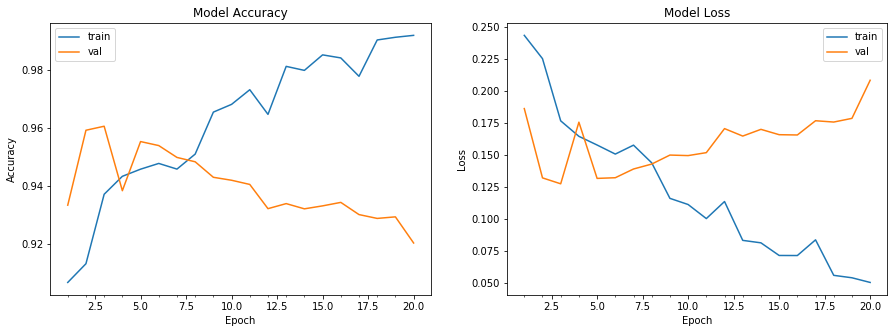

Confusion Martix [[7574  696]
 [ 632 7764]]
16666/16666 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.20846638702357728, 0.9203168126295899]
Report : 
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      8270
         1.0       0.92      0.92      0.92      8396

    accuracy                           0.92     16666
   macro avg       0.92      0.92      0.92     16666
weighted avg       0.92      0.92      0.92     16666

Average accuracy 0.8758608891029733


In [80]:
# Scenario 21
# 1 Hidden Layer of 64 units
# No Dropout
# Sigmoid in the hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model21 = Sequential()

#Input - Layer
model21.add(Embedding(top_words,32,input_length=max_words))
model21.add(Flatten())

#Hidden - Layers
model21.add(layers.Dense(64, activation="sigmoid"))

#Output - Layer
model21.add(layers.Dense(1, activation = "sigmoid"))

model21.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model21.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model21.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model21.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model21.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg21 = np.average(acc)
print("Average accuracy",avg21);

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_61 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_61 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_153 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_154 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 7s - loss: 0.3950 - acc: 0.7949 - val_loss: 0.2893 - val_acc: 0.8769
Epoch 2/20
 - 3s - loss: 0.1244 - acc: 0.9560 - val_loss: 0.3423 - val_acc: 0.8718
Epoch 3/20
 - 3s - loss: 

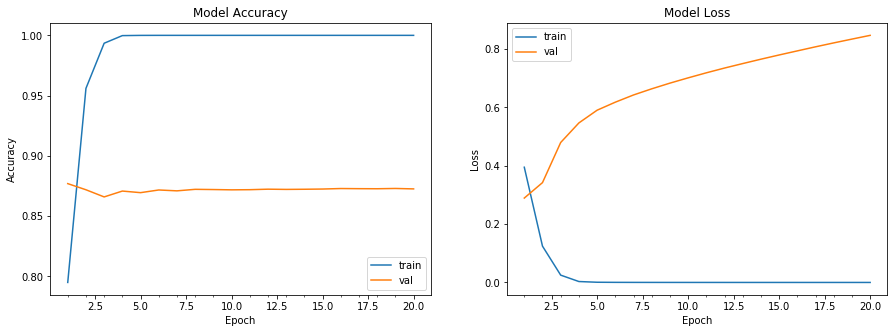

Confusion Martix [[7231 1051]
 [1073 7312]]
16667/16667 [==============================] - 1s 64us/step
[Loss,Accuracy]: [0.8471651479777094, 0.8725625487239915]
Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      8282
         1.0       0.87      0.87      0.87      8385

    accuracy                           0.87     16667
   macro avg       0.87      0.87      0.87     16667
weighted avg       0.87      0.87      0.87     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.2273 - acc: 0.9203 - val_loss: 0.1058 - val_acc: 0.9730
Epoch 2/20
 - 3s - loss: 0.0298 - acc: 0.9920 - val_loss: 0.0561 - val_acc: 0.9788
Epoch 3/20
 - 3s - loss: 0.0030 - acc: 0.9996 - val_loss: 0.0584 - val_acc: 0.9794
Epoch 4/20
 - 3s - loss: 2.8142e-04 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9789
Epoch 5/20
 - 3s - loss: 8.7910e-05 - acc: 1.0000 - val_loss: 0.0683 - val_acc: 0.9786
Epoch 6/20
 - 3s - loss: 5.2

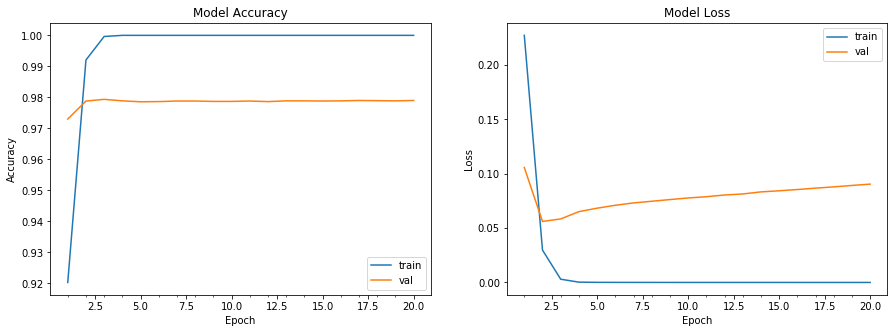

Confusion Martix [[8249  199]
 [ 151 8068]]
16667/16667 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.09045664318681823, 0.9790004200273622]
Report : 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      8448
         1.0       0.98      0.98      0.98      8219

    accuracy                           0.98     16667
   macro avg       0.98      0.98      0.98     16667
weighted avg       0.98      0.98      0.98     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.0770 - acc: 0.9737 - val_loss: 0.0201 - val_acc: 0.9948
Epoch 2/20
 - 3s - loss: 0.0029 - acc: 0.9993 - val_loss: 0.0135 - val_acc: 0.9953
Epoch 3/20
 - 3s - loss: 2.0260e-04 - acc: 1.0000 - val_loss: 0.0138 - val_acc: 0.9954
Epoch 4/20
 - 3s - loss: 7.1551e-05 - acc: 1.0000 - val_loss: 0.0141 - val_acc: 0.9956
Epoch 5/20
 - 3s - loss: 4.4153e-05 - acc: 1.0000 - val_loss: 0.0143 - val_acc: 0.9954
Epoch 6/20
 - 3s - loss

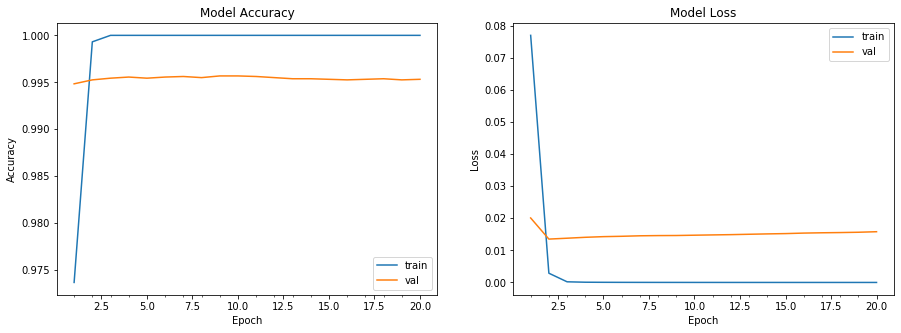

Confusion Martix [[8232   38]
 [  40 8356]]
16666/16666 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.0158031220925022, 0.9953198127925117]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8270
         1.0       1.00      1.00      1.00      8396

    accuracy                           1.00     16666
   macro avg       1.00      1.00      1.00     16666
weighted avg       1.00      1.00      1.00     16666

Average accuracy 0.9489609271812885


In [81]:
# Scenario 22
# 1 Hidden Layer of 64 units
# No Dropout
# relu in the hidden layer
# Batch Size 64
# Adam with lr 1e-03

#Create the model
model22 = Sequential()

#Input - Layer
model22.add(Embedding(top_words,32,input_length=max_words))
model22.add(Flatten())

#Hidden - Layers
model22.add(layers.Dense(64, activation="relu"))

#Output - Layer
model22.add(layers.Dense(1, activation = "sigmoid"))

model22.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model22.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model22.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model22.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model22.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg22 = np.average(acc)
print("Average accuracy",avg22);

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_62 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_62 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_155 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 8s - loss: 0.6911 - acc: 0.5297 - val_loss: 0.6813 - val_acc: 0.5880
Epoch 2/20
 - 3s - loss: 0.5721 - acc: 0.7027 - val_loss: 0.4404 - val_acc: 0.7979
Epoch 3/20
 - 3s - loss: 

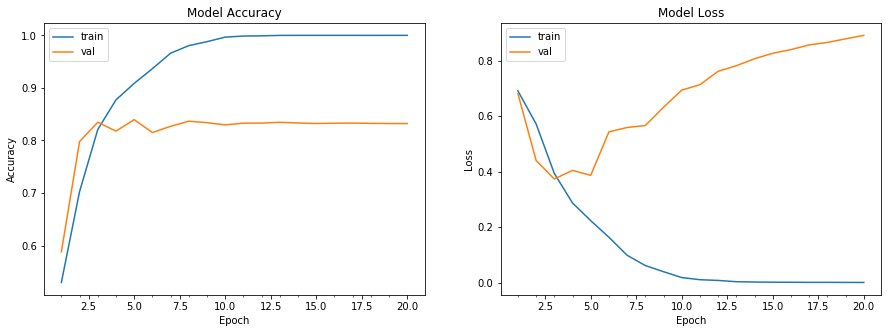

Confusion Martix [[6879 1403]
 [1396 6989]]
16667/16667 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.8912534987074631, 0.832063358693487]
Report : 
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      8282
         1.0       0.83      0.83      0.83      8385

    accuracy                           0.83     16667
   macro avg       0.83      0.83      0.83     16667
weighted avg       0.83      0.83      0.83     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.3761 - acc: 0.8517 - val_loss: 0.1839 - val_acc: 0.9271
Epoch 2/20
 - 3s - loss: 0.2128 - acc: 0.9204 - val_loss: 0.1415 - val_acc: 0.9502
Epoch 3/20
 - 3s - loss: 0.1673 - acc: 0.9377 - val_loss: 0.1497 - val_acc: 0.9381
Epoch 4/20
 - 3s - loss: 0.0943 - acc: 0.9675 - val_loss: 0.1649 - val_acc: 0.9347
Epoch 5/20
 - 3s - loss: 0.0702 - acc: 0.9771 - val_loss: 0.3342 - val_acc: 0.8817
Epoch 6/20
 - 3s - loss: 7.1994 - acc

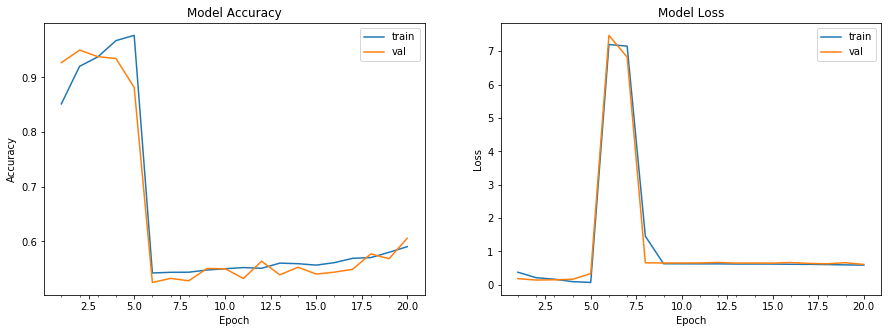

Confusion Martix [[7828  620]
 [5954 2265]]
16667/16667 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.6097470909730784, 0.6055678886851417]
Report : 
              precision    recall  f1-score   support

         0.0       0.57      0.93      0.70      8448
         1.0       0.79      0.28      0.41      8219

    accuracy                           0.61     16667
   macro avg       0.68      0.60      0.56     16667
weighted avg       0.68      0.61      0.56     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.5442 - acc: 0.6520 - val_loss: 0.6091 - val_acc: 0.5958
Epoch 2/20
 - 3s - loss: 0.3587 - acc: 0.7942 - val_loss: 0.2962 - val_acc: 0.8607
Epoch 3/20
 - 3s - loss: 0.1455 - acc: 0.9421 - val_loss: 0.0799 - val_acc: 0.9705
Epoch 4/20
 - 3s - loss: 0.1336 - acc: 0.9500 - val_loss: 0.5429 - val_acc: 0.8435
Epoch 5/20
 - 3s - loss: 0.1781 - acc: 0.9317 - val_loss: 0.0941 - val_acc: 0.9684
Epoch 6/20
 - 3s - loss: 0.0517 - ac

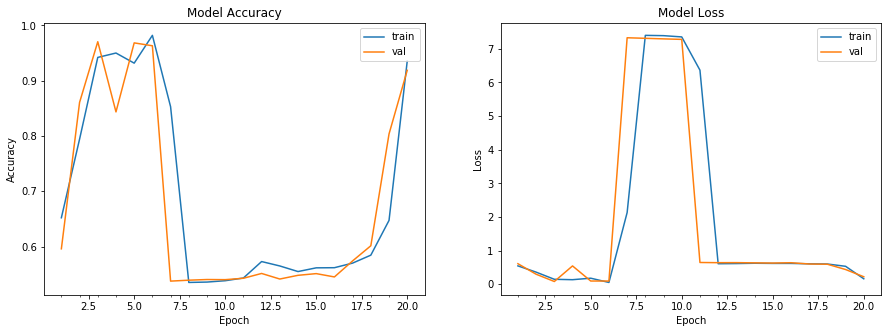

Confusion Martix [[8090  180]
 [1173 7223]]
16666/16666 [==============================] - 1s 68us/step
[Loss,Accuracy]: [0.22075528327541508, 0.9188167526772596]
Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      8270
         1.0       0.98      0.86      0.91      8396

    accuracy                           0.92     16666
   macro avg       0.92      0.92      0.92     16666
weighted avg       0.92      0.92      0.92     16666

Average accuracy 0.7854826666852962


In [82]:
# Scenario 23
# 1 Hidden Layer of 64 units
# No Dropout
# relu in the hidden layer
# Batch Size 64
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model23 = Sequential()

#Input - Layer
model23.add(Embedding(top_words,32,input_length=max_words))
model23.add(Flatten())

#Hidden - Layers
model23.add(layers.Dense(64, activation="relu"))

#Output - Layer
model23.add(layers.Dense(1, activation = "sigmoid"))

model23.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model23.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
    )

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model23.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model23.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model23.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg23 = np.average(acc)
print("Average accuracy",avg23);

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_63 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_63 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_157 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 6s - loss: 0.4854 - acc: 0.7424 - val_loss: 0.2923 - val_acc: 0.8759
Epoch 2/20
 - 1s - loss: 0.1811 - acc: 0.9305 - val_loss: 0.2855 - val_acc: 0.8830
Epoch 3/20
 - 1s - loss: 

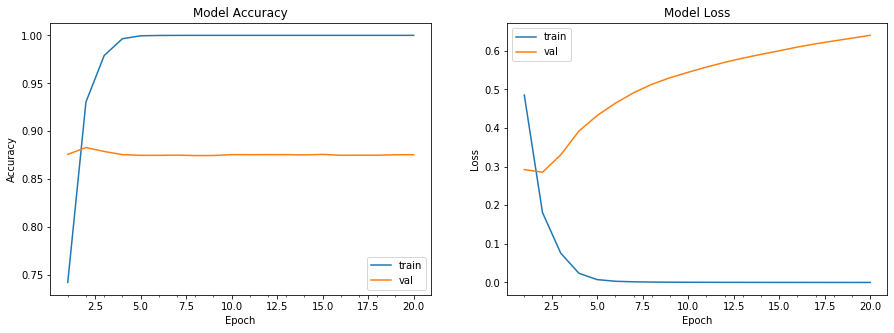

Confusion Martix [[7267 1015]
 [1059 7326]]
16667/16667 [==============================] - 1s 66us/step
[Loss,Accuracy]: [0.6399289334429014, 0.8755624887609537]
Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      8282
         1.0       0.88      0.87      0.88      8385

    accuracy                           0.88     16667
   macro avg       0.88      0.88      0.88     16667
weighted avg       0.88      0.88      0.88     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.2211 - acc: 0.9254 - val_loss: 0.0868 - val_acc: 0.9815
Epoch 2/20
 - 1s - loss: 0.0361 - acc: 0.9902 - val_loss: 0.0412 - val_acc: 0.9861
Epoch 3/20
 - 1s - loss: 0.0049 - acc: 0.9994 - val_loss: 0.0432 - val_acc: 0.9837
Epoch 4/20
 - 1s - loss: 0.0019 - acc: 0.9998 - val_loss: 0.0404 - val_acc: 0.9849
Epoch 5/20
 - 1s - loss: 8.6926e-04 - acc: 1.0000 - val_loss: 0.0396 - val_acc: 0.9853
Epoch 6/20
 - 1s - loss: 7.4376e

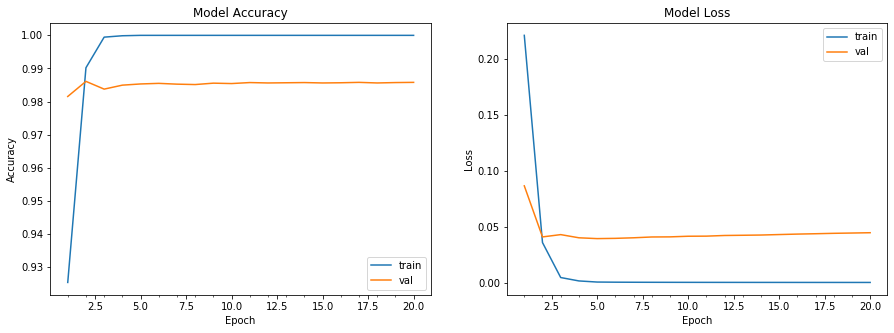

Confusion Martix [[8303  145]
 [  92 8127]]
16667/16667 [==============================] - 1s 66us/step
[Loss,Accuracy]: [0.04490594914135775, 0.9857802844300741]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      8448
         1.0       0.98      0.99      0.99      8219

    accuracy                           0.99     16667
   macro avg       0.99      0.99      0.99     16667
weighted avg       0.99      0.99      0.99     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.0468 - acc: 0.9834 - val_loss: 0.0082 - val_acc: 0.9981
Epoch 2/20
 - 1s - loss: 0.0069 - acc: 0.9982 - val_loss: 0.0066 - val_acc: 0.9980
Epoch 3/20
 - 1s - loss: 9.0782e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.9981
Epoch 4/20
 - 1s - loss: 6.3446e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9983
Epoch 5/20
 - 1s - loss: 5.8988e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9983
Epoch 6/20
 - 1s - loss

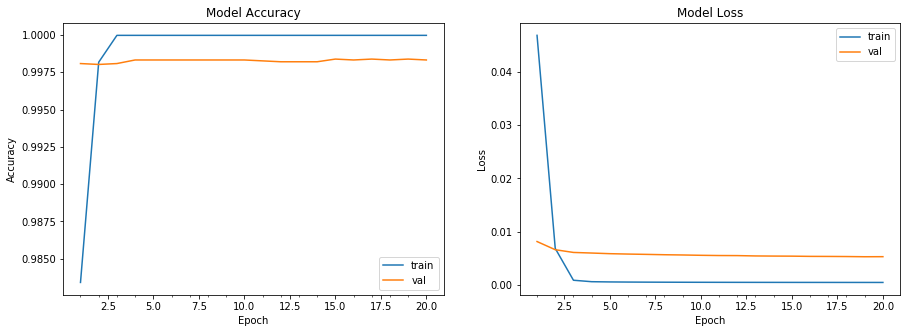

Confusion Martix [[8252   18]
 [  10 8386]]
16666/16666 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.005327704079901203, 0.9983199327973119]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8270
         1.0       1.00      1.00      1.00      8396

    accuracy                           1.00     16666
   macro avg       1.00      1.00      1.00     16666
weighted avg       1.00      1.00      1.00     16666

Average accuracy 0.9532209019961132


In [83]:
# Scenario 24
# 1 Hidden Layer of 64 units
# No Dropout
# relu in the hidden layer
# Batch Size 256
# Adam with lr 1e-03

#Create the model
model24 = Sequential()

#Input - Layer
model24.add(Embedding(top_words,32,input_length=max_words))
model24.add(Flatten())

#Hidden - Layers
model24.add(layers.Dense(64, activation="relu"))

#Output - Layer
model24.add(layers.Dense(1, activation = "sigmoid"))

model24.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model24.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model24.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model24.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model24.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg24 = np.average(acc)
print("Average accuracy",avg24);

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_64 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_64 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_159 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_160 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 6s - loss: 0.6929 - acc: 0.5068 - val_loss: 0.6921 - val_acc: 0.5205
Epoch 2/20
 - 1s - loss: 0.6905 - acc: 0.5350 - val_loss: 0.6908 - val_acc: 0.5201
Epoch 3/20
 - 1s - loss: 

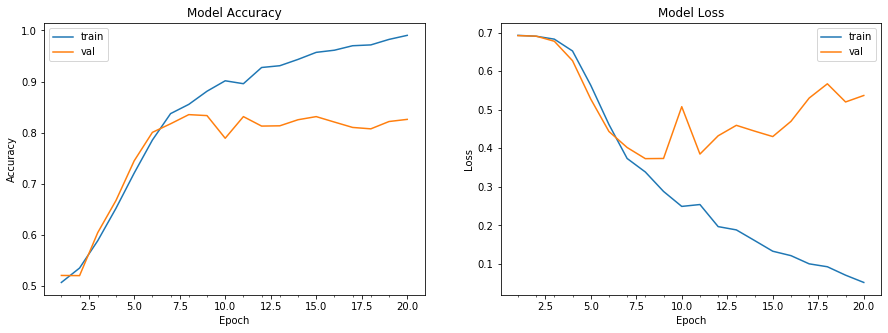

Confusion Martix [[6654 1628]
 [1273 7112]]
16667/16667 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.5369197987259174, 0.8259434811768681]
Report : 
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      8282
         1.0       0.81      0.85      0.83      8385

    accuracy                           0.83     16667
   macro avg       0.83      0.83      0.83     16667
weighted avg       0.83      0.83      0.83     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.2720 - acc: 0.9019 - val_loss: 0.1102 - val_acc: 0.9667
Epoch 2/20
 - 1s - loss: 0.1916 - acc: 0.9292 - val_loss: 0.1594 - val_acc: 0.9286
Epoch 3/20
 - 1s - loss: 0.1611 - acc: 0.9436 - val_loss: 0.1002 - val_acc: 0.9675
Epoch 4/20
 - 1s - loss: 0.1214 - acc: 0.9611 - val_loss: 0.0990 - val_acc: 0.9647
Epoch 5/20
 - 1s - loss: 0.1000 - acc: 0.9701 - val_loss: 0.1080 - val_acc: 0.9600
Epoch 6/20
 - 1s - loss: 0.0834 - ac

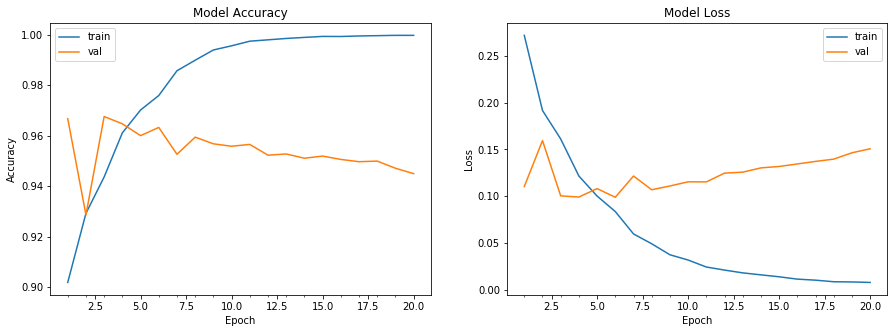

Confusion Martix [[7952  496]
 [ 422 7797]]
16667/16667 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.15060993312060272, 0.9449211016244591]
Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      8448
         1.0       0.94      0.95      0.94      8219

    accuracy                           0.94     16667
   macro avg       0.94      0.94      0.94     16667
weighted avg       0.94      0.94      0.94     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.0825 - acc: 0.9717 - val_loss: 0.0108 - val_acc: 0.9991
Epoch 2/20
 - 1s - loss: 0.0339 - acc: 0.9916 - val_loss: 0.0106 - val_acc: 0.9989
Epoch 3/20
 - 1s - loss: 0.0212 - acc: 0.9969 - val_loss: 0.0107 - val_acc: 0.9993
Epoch 4/20
 - 1s - loss: 0.0141 - acc: 0.9990 - val_loss: 0.0100 - val_acc: 0.9992
Epoch 5/20
 - 1s - loss: 0.0112 - acc: 0.9993 - val_loss: 0.0100 - val_acc: 0.9991
Epoch 6/20
 - 1s - loss: 0.0091 - a

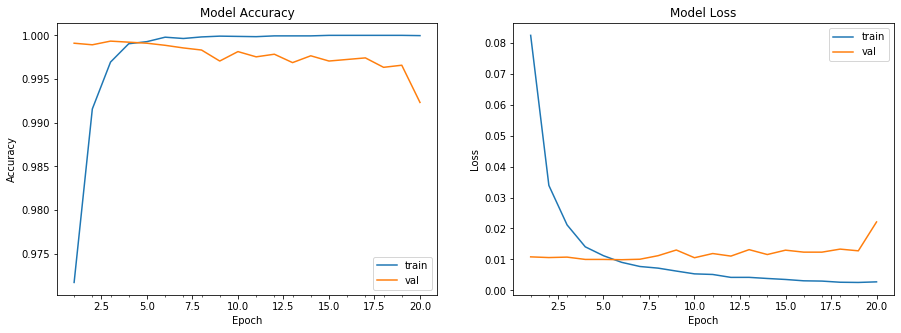

Confusion Martix [[8167  103]
 [  25 8371]]
16666/16666 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.022119630801686017, 0.9923196927877115]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      8270
         1.0       0.99      1.00      0.99      8396

    accuracy                           0.99     16666
   macro avg       0.99      0.99      0.99     16666
weighted avg       0.99      0.99      0.99     16666

Average accuracy 0.9210614251963462


In [84]:
# Scenario 25
# 1 Hidden Layer of 64 units
# No Dropout
# Sigmoid in the hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model25 = Sequential()

#Input - Layer
model25.add(Embedding(top_words,32,input_length=max_words))
model25.add(Flatten())

#Hidden - Layers
model25.add(layers.Dense(64, activation="relu"))

#Output - Layer
model25.add(layers.Dense(1, activation = "sigmoid"))

model25.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model25.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model25.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model25.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model25.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg25 = np.average(acc)
print("Average accuracy",avg25);

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_65 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_65 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 16000)             0         
_________________________________________________________________
dense_161 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_162 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 5s - loss: 0.6959 - acc: 0.4999 - val_loss: 0

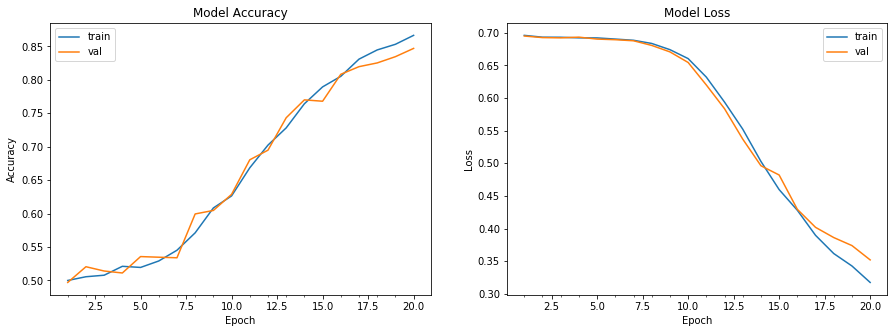

Confusion Martix [[6926 1356]
 [1194 7191]]
16667/16667 [==============================] - 1s 68us/step
[Loss,Accuracy]: [0.35207096864260645, 0.8470030599602585]
Report : 
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      8282
         1.0       0.84      0.86      0.85      8385

    accuracy                           0.85     16667
   macro avg       0.85      0.85      0.85     16667
weighted avg       0.85      0.85      0.85     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.3336 - acc: 0.8546 - val_loss: 0.3026 - val_acc: 0.8743
Epoch 2/20
 - 1s - loss: 0.3263 - acc: 0.8594 - val_loss: 0.3475 - val_acc: 0.8411
Epoch 3/20
 - 1s - loss: 0.3129 - acc: 0.8659 - val_loss: 0.2814 - val_acc: 0.8859
Epoch 4/20
 - 1s - loss: 0.2903 - acc: 0.8795 - val_loss: 0.3298 - val_acc: 0.8571
Epoch 5/20
 - 1s - loss: 0.2909 - acc: 0.8792 - val_loss: 0.2759 - val_acc: 0.8869
Epoch 6/20
 - 1s - loss: 0.2714 - a

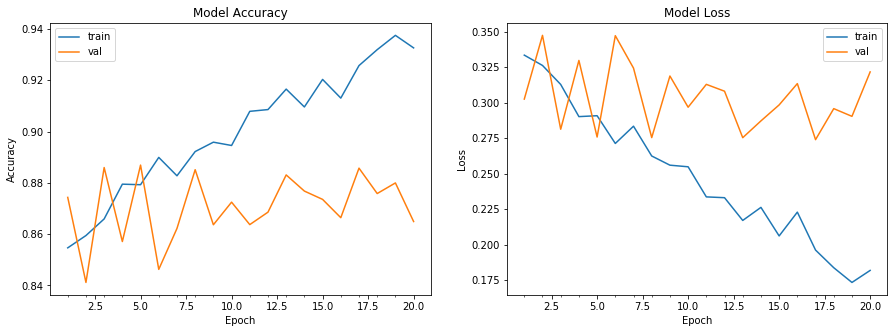

Confusion Martix [[7184 1264]
 [ 988 7231]]
16667/16667 [==============================] - 1s 68us/step
[Loss,Accuracy]: [0.32174092543899757, 0.8648827023924438]
Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      8448
         1.0       0.85      0.88      0.87      8219

    accuracy                           0.86     16667
   macro avg       0.87      0.87      0.86     16667
weighted avg       0.87      0.86      0.86     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.2498 - acc: 0.9005 - val_loss: 0.2145 - val_acc: 0.9159
Epoch 2/20
 - 1s - loss: 0.2520 - acc: 0.8987 - val_loss: 0.2271 - val_acc: 0.9015
Epoch 3/20
 - 1s - loss: 0.2248 - acc: 0.9122 - val_loss: 0.1530 - val_acc: 0.9495
Epoch 4/20
 - 1s - loss: 0.2016 - acc: 0.9220 - val_loss: 0.2030 - val_acc: 0.9213
Epoch 5/20
 - 1s - loss: 0.1929 - acc: 0.9267 - val_loss: 0.1467 - val_acc: 0.9500
Epoch 6/20
 - 1s - loss: 0.1826 - a

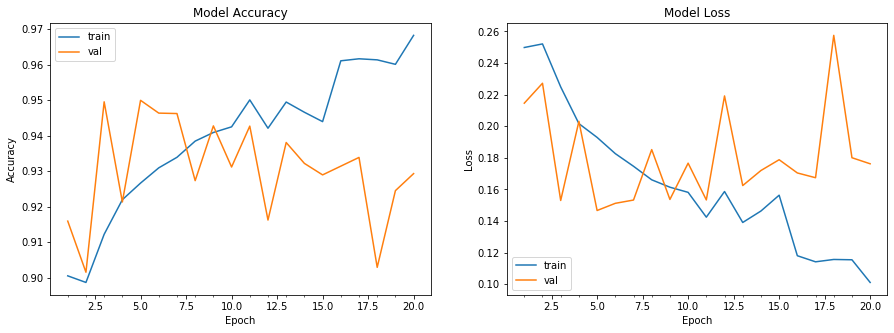

Confusion Martix [[7574  696]
 [ 482 7914]]
16666/16666 [==============================] - 1s 68us/step
[Loss,Accuracy]: [0.17620103280702074, 0.9293171726439904]
Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      8270
         1.0       0.92      0.94      0.93      8396

    accuracy                           0.93     16666
   macro avg       0.93      0.93      0.93     16666
weighted avg       0.93      0.93      0.93     16666

Average accuracy 0.880400978332231


In [85]:
# Scenario 26
# 1 Hidden Layer of 64 units
# Dropout of ratio 0.25
# Sigmoid in the hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model26 = Sequential()

#Input - Layer
model26.add(Embedding(top_words,32,input_length=max_words))
model26.add(Flatten())

#Hidden - Layers
model26.add(layers.Dropout(0.25))
model26.add(layers.Dense(64, activation="sigmoid"))

#Output - Layer
model26.add(layers.Dense(1, activation = "sigmoid"))

model26.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model26.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model26.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model26.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model26.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg26 = np.average(acc)
print("Average accuracy",avg26);

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_66 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_66 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 16000)             0         
_________________________________________________________________
dense_163 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 7s - loss: 0.6954 - acc: 0.5073 - val_loss: 0

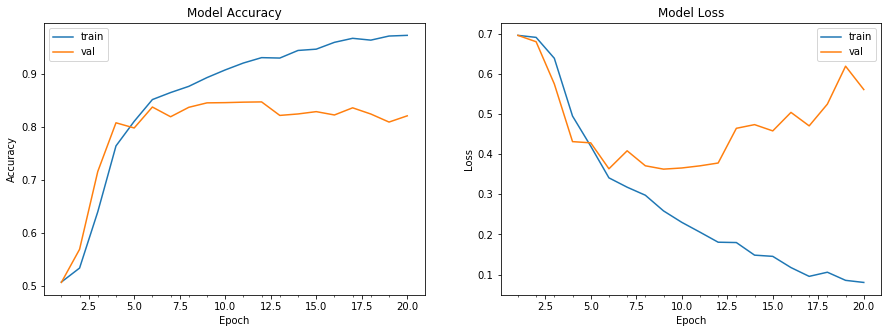

Confusion Martix [[6803 1479]
 [1505 6880]]
16667/16667 [==============================] - 1s 70us/step
[Loss,Accuracy]: [0.5604738937758467, 0.820963580739114]
Report : 
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      8282
         1.0       0.82      0.82      0.82      8385

    accuracy                           0.82     16667
   macro avg       0.82      0.82      0.82     16667
weighted avg       0.82      0.82      0.82     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.3392 - acc: 0.8864 - val_loss: 0.1064 - val_acc: 0.9642
Epoch 2/20
 - 3s - loss: 0.2171 - acc: 0.9166 - val_loss: 0.0914 - val_acc: 0.9729
Epoch 3/20
 - 3s - loss: 0.1603 - acc: 0.9398 - val_loss: 0.1073 - val_acc: 0.9636
Epoch 4/20
 - 3s - loss: 0.1345 - acc: 0.9503 - val_loss: 0.0934 - val_acc: 0.9680
Epoch 5/20
 - 3s - loss: 0.1180 - acc: 0.9579 - val_loss: 0.0975 - val_acc: 0.9650
Epoch 6/20
 - 3s - loss: 0.1096 - acc

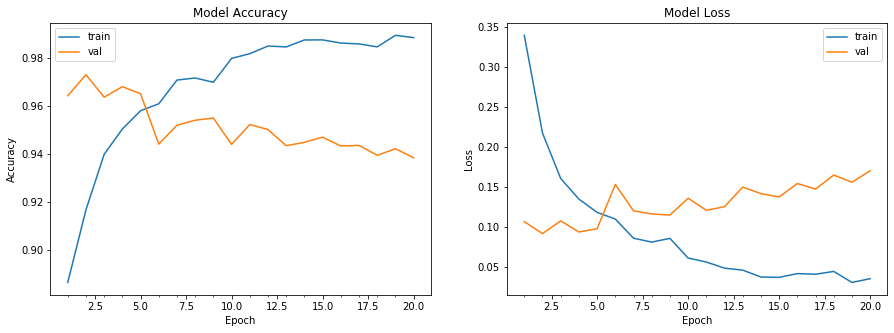

Confusion Martix [[7761  687]
 [ 341 7878]]
16667/16667 [==============================] - 1s 70us/step
[Loss,Accuracy]: [0.1700316466033019, 0.9383212335502951]
Report : 
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      8448
         1.0       0.92      0.96      0.94      8219

    accuracy                           0.94     16667
   macro avg       0.94      0.94      0.94     16667
weighted avg       0.94      0.94      0.94     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.1714 - acc: 0.9402 - val_loss: 0.0193 - val_acc: 0.9974
Epoch 2/20
 - 3s - loss: 0.1134 - acc: 0.9561 - val_loss: 0.0205 - val_acc: 0.9963
Epoch 3/20
 - 3s - loss: 0.0859 - acc: 0.9679 - val_loss: 0.0199 - val_acc: 0.9953
Epoch 4/20
 - 3s - loss: 0.0627 - acc: 0.9755 - val_loss: 0.0254 - val_acc: 0.9920
Epoch 5/20
 - 3s - loss: 0.0527 - acc: 0.9801 - val_loss: 0.0223 - val_acc: 0.9937
Epoch 6/20
 - 3s - loss: 0.0403 - ac

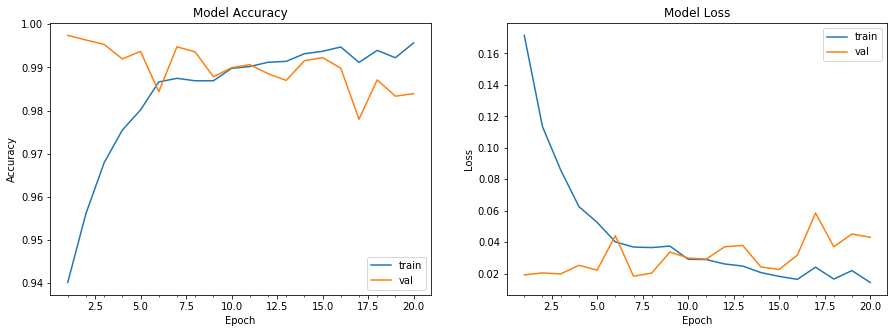

Confusion Martix [[8029  241]
 [  27 8369]]
16666/16666 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.04317718789022343, 0.983919356774271]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      8270
         1.0       0.97      1.00      0.98      8396

    accuracy                           0.98     16666
   macro avg       0.98      0.98      0.98     16666
weighted avg       0.98      0.98      0.98     16666

Average accuracy 0.91440139035456


In [86]:
# Scenario 27
# 1 Hidden Layer of 64 units
# Dropout of ratio 0.25
# Sigmoid in the hidden layer
# Batch Size 64
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model27 = Sequential()

#Input - Layer
model27.add(Embedding(top_words,32,input_length=max_words))
model27.add(Flatten())

#Hidden - Layers
model27.add(layers.Dropout(0.25))
model27.add(layers.Dense(64, activation="sigmoid"))

#Output - Layer
model27.add(layers.Dense(1, activation = "sigmoid"))

model27.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model27.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model27.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model27.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model27.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg27 = np.average(acc)
print("Average accuracy",avg27);

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_67 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_67 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 16000)             0         
_________________________________________________________________
dense_165 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_166 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 7s - loss: 0.6896 - acc: 0.5308 - val_loss: 0

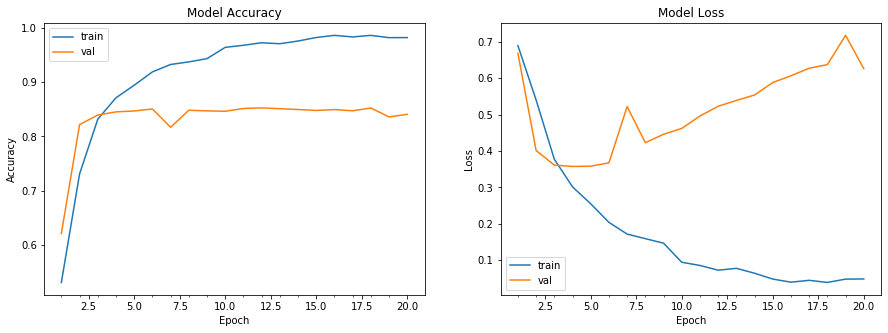

Confusion Martix [[6909 1373]
 [1286 7099]]
16667/16667 [==============================] - 1s 66us/step
[Loss,Accuracy]: [0.626229239746069, 0.840463190782676]
Report : 
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      8282
         1.0       0.84      0.85      0.84      8385

    accuracy                           0.84     16667
   macro avg       0.84      0.84      0.84     16667
weighted avg       0.84      0.84      0.84     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.2899 - acc: 0.8969 - val_loss: 0.0901 - val_acc: 0.9796
Epoch 2/20
 - 3s - loss: 0.1718 - acc: 0.9370 - val_loss: 0.0681 - val_acc: 0.9833
Epoch 3/20
 - 3s - loss: 0.1346 - acc: 0.9498 - val_loss: 0.0958 - val_acc: 0.9630
Epoch 4/20
 - 3s - loss: 0.1111 - acc: 0.9587 - val_loss: 0.0610 - val_acc: 0.9802
Epoch 5/20
 - 3s - loss: 0.0878 - acc: 0.9678 - val_loss: 0.0619 - val_acc: 0.9775
Epoch 6/20
 - 3s - loss: 0.0723 - acc:

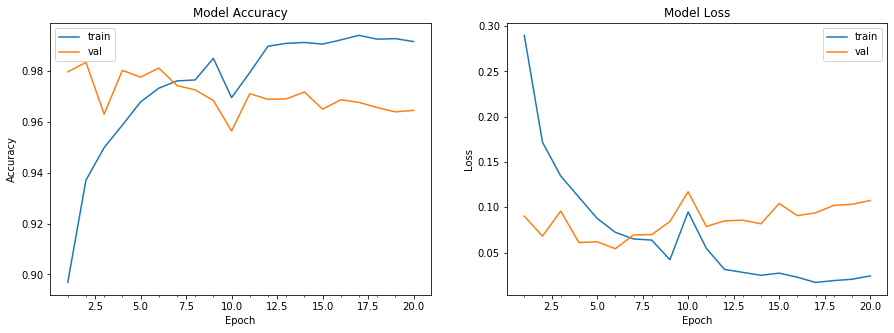

Confusion Martix [[8249  199]
 [ 393 7826]]
16667/16667 [==============================] - 1s 65us/step
[Loss,Accuracy]: [0.10748192550130682, 0.9644807103607589]
Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      8448
         1.0       0.98      0.95      0.96      8219

    accuracy                           0.96     16667
   macro avg       0.96      0.96      0.96     16667
weighted avg       0.96      0.96      0.96     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.1271 - acc: 0.9558 - val_loss: 0.0153 - val_acc: 0.9970
Epoch 2/20
 - 3s - loss: 0.0580 - acc: 0.9777 - val_loss: 0.0132 - val_acc: 0.9975
Epoch 3/20
 - 3s - loss: 0.0625 - acc: 0.9761 - val_loss: 0.0103 - val_acc: 0.9984
Epoch 4/20
 - 3s - loss: 0.0436 - acc: 0.9834 - val_loss: 0.0152 - val_acc: 0.9961
Epoch 5/20
 - 3s - loss: 0.0271 - acc: 0.9906 - val_loss: 0.0058 - val_acc: 0.9987
Epoch 6/20
 - 3s - loss: 0.0231 - a

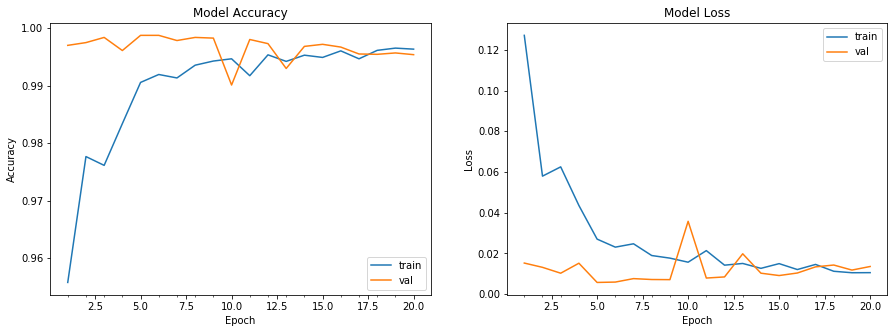

Confusion Martix [[8226   44]
 [  33 8363]]
16666/16666 [==============================] - 1s 66us/step
[Loss,Accuracy]: [0.013613662129197025, 0.9953798151926077]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      8270
         1.0       0.99      1.00      1.00      8396

    accuracy                           1.00     16666
   macro avg       1.00      1.00      1.00     16666
weighted avg       1.00      1.00      1.00     16666

Average accuracy 0.9334412387786809


In [87]:
# Scenario 28
# 1 Hidden Layer of 64 units
# Dropout of ratio 0.25
# Relu in the hidden layer
# Batch Size 64
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model28 = Sequential()

#Input - Layer
model28.add(Embedding(top_words,32,input_length=max_words))
model28.add(Flatten())

#Hidden - Layers
model28.add(layers.Dropout(0.25))
model28.add(layers.Dense(64, activation="relu"))

#Output - Layer
model28.add(layers.Dense(1, activation = "sigmoid"))

model28.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model28.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model28.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model28.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model28.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg28 = np.average(acc)
print("Average accuracy",avg28);

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_68 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_68 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 16000)             0         
_________________________________________________________________
dense_167 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_168 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 6s - loss: 0.6929 - acc: 0.5104 - val_loss: 0

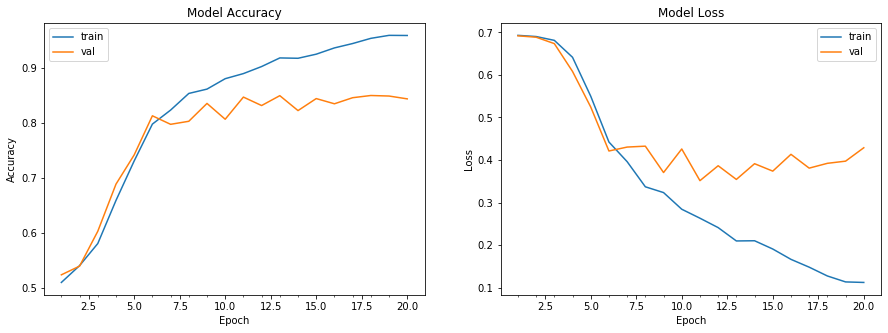

Confusion Martix [[7195 1087]
 [1511 6874]]
16667/16667 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.42885086957523744, 0.8441231175483779]
Report : 
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      8282
         1.0       0.86      0.82      0.84      8385

    accuracy                           0.84     16667
   macro avg       0.84      0.84      0.84     16667
weighted avg       0.85      0.84      0.84     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.2666 - acc: 0.9000 - val_loss: 0.1132 - val_acc: 0.9753
Epoch 2/20
 - 1s - loss: 0.2097 - acc: 0.9191 - val_loss: 0.1174 - val_acc: 0.9585
Epoch 3/20
 - 1s - loss: 0.1791 - acc: 0.9314 - val_loss: 0.1271 - val_acc: 0.9516
Epoch 4/20
 - 1s - loss: 0.1584 - acc: 0.9411 - val_loss: 0.1122 - val_acc: 0.9621
Epoch 5/20
 - 1s - loss: 0.1412 - acc: 0.9475 - val_loss: 0.1236 - val_acc: 0.9540
Epoch 6/20
 - 1s - loss: 0.1259 - a

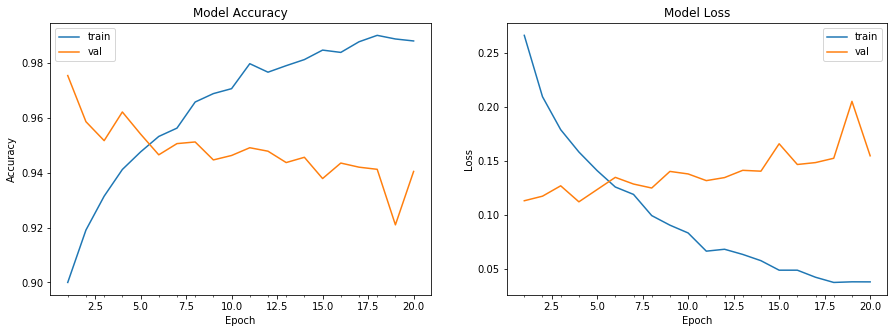

Confusion Martix [[7910  538]
 [ 455 7764]]
16667/16667 [==============================] - 1s 69us/step
[Loss,Accuracy]: [0.15488944572754254, 0.940421191551135]
Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      8448
         1.0       0.94      0.94      0.94      8219

    accuracy                           0.94     16667
   macro avg       0.94      0.94      0.94     16667
weighted avg       0.94      0.94      0.94     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.1268 - acc: 0.9536 - val_loss: 0.0326 - val_acc: 0.9944
Epoch 2/20
 - 1s - loss: 0.0996 - acc: 0.9617 - val_loss: 0.0227 - val_acc: 0.9980
Epoch 3/20
 - 1s - loss: 0.0800 - acc: 0.9702 - val_loss: 0.0198 - val_acc: 0.9976
Epoch 4/20
 - 1s - loss: 0.0753 - acc: 0.9716 - val_loss: 0.0264 - val_acc: 0.9940
Epoch 5/20
 - 1s - loss: 0.0683 - acc: 0.9752 - val_loss: 0.0282 - val_acc: 0.9932
Epoch 6/20
 - 1s - loss: 0.0436 - ac

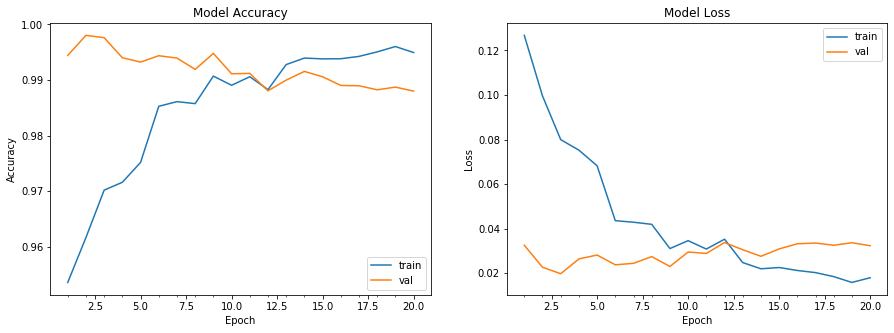

Confusion Martix [[8151  119]
 [  81 8315]]
16666/16666 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.03236195269134309, 0.9879995199807993]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8270
         1.0       0.99      0.99      0.99      8396

    accuracy                           0.99     16666
   macro avg       0.99      0.99      0.99     16666
weighted avg       0.99      0.99      0.99     16666

Average accuracy 0.924181276360104


In [88]:
# Scenario 29
# 1 Hidden Layer of 64 units
# Dropout of ratio 0.25
# Relu in the hidden layer
# Batch Size 256
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model29 = Sequential()

#Input - Layer
model29.add(Embedding(top_words,32,input_length=max_words))
model29.add(Flatten())

#Hidden - Layers
model29.add(layers.Dropout(0.25))
model29.add(layers.Dense(64, activation="relu"))

#Output - Layer
model29.add(layers.Dense(1, activation = "sigmoid"))

model29.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model29.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model29.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model29.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model29.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg29 = np.average(acc)
print("Average accuracy",avg29);

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_69 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_69 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 16000)             0         
_________________________________________________________________
dense_169 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_170 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 6s - loss: 0.5667 - acc: 0.6639 - val_loss: 0

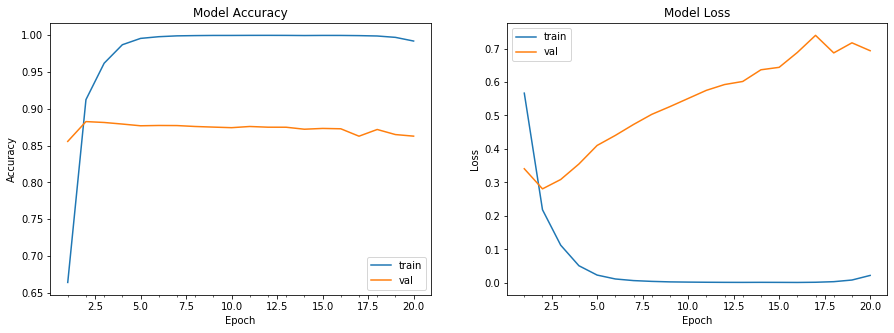

Confusion Martix [[7299  983]
 [1303 7082]]
16667/16667 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.6934588169081707, 0.8628427431916278]
Report : 
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      8282
         1.0       0.88      0.84      0.86      8385

    accuracy                           0.86     16667
   macro avg       0.86      0.86      0.86     16667
weighted avg       0.86      0.86      0.86     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 1s - loss: 0.2097 - acc: 0.9277 - val_loss: 0.0674 - val_acc: 0.9887
Epoch 2/20
 - 1s - loss: 0.0720 - acc: 0.9769 - val_loss: 0.0356 - val_acc: 0.9899
Epoch 3/20
 - 1s - loss: 0.0312 - acc: 0.9908 - val_loss: 0.0309 - val_acc: 0.9893
Epoch 4/20
 - 1s - loss: 0.0150 - acc: 0.9962 - val_loss: 0.0308 - val_acc: 0.9894
Epoch 5/20
 - 1s - loss: 0.0098 - acc: 0.9969 - val_loss: 0.0331 - val_acc: 0.9884
Epoch 6/20
 - 1s - loss: 0.0072 - ac

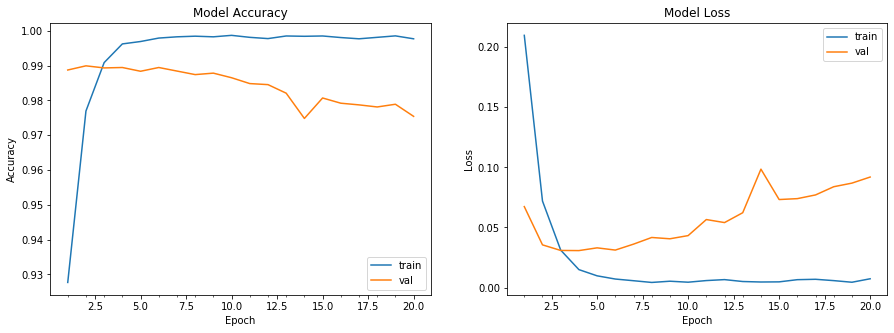

Confusion Martix [[8174  274]
 [ 136 8083]]
16667/16667 [==============================] - 1s 68us/step
[Loss,Accuracy]: [0.09193235013911946, 0.9754004919651268]
Report : 
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      8448
         1.0       0.97      0.98      0.98      8219

    accuracy                           0.98     16667
   macro avg       0.98      0.98      0.98     16667
weighted avg       0.98      0.98      0.98     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 1s - loss: 0.0549 - acc: 0.9820 - val_loss: 0.0049 - val_acc: 0.9996
Epoch 2/20
 - 1s - loss: 0.0161 - acc: 0.9948 - val_loss: 0.0018 - val_acc: 0.9996
Epoch 3/20
 - 1s - loss: 0.0107 - acc: 0.9962 - val_loss: 0.0017 - val_acc: 0.9996
Epoch 4/20
 - 1s - loss: 0.0071 - acc: 0.9978 - val_loss: 0.0018 - val_acc: 0.9996
Epoch 5/20
 - 1s - loss: 0.0079 - acc: 0.9976 - val_loss: 0.0019 - val_acc: 0.9995
Epoch 6/20
 - 1s - loss: 0.0055 - a

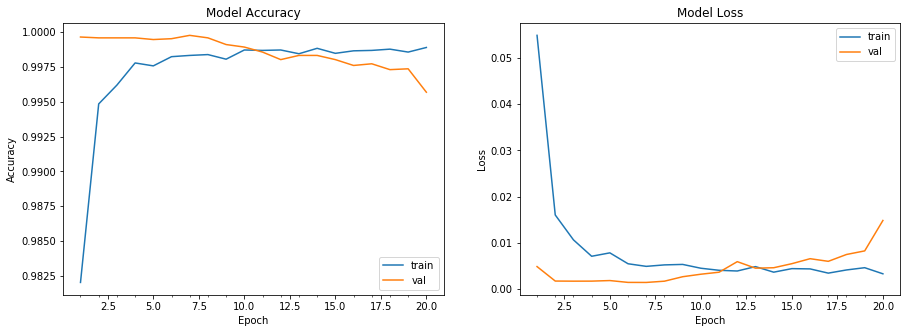

Confusion Martix [[8206   64]
 [   8 8388]]
16666/16666 [==============================] - 1s 66us/step
[Loss,Accuracy]: [0.014866961704709221, 0.9956798271930877]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      8270
         1.0       0.99      1.00      1.00      8396

    accuracy                           1.00     16666
   macro avg       1.00      1.00      1.00     16666
weighted avg       1.00      1.00      1.00     16666

Average accuracy 0.9446410207832807


In [89]:
# Scenario 30
# 1 Hidden Layer of 64 units
# Dropout of ratio 0.25
# Relu in the hidden layer
# Batch Size 256
# Adam with lr 1e-03

#Create the model
model30 = Sequential()

#Input - Layer
model30.add(Embedding(top_words,32,input_length=max_words))
model30.add(Flatten())

#Hidden - Layers
model30.add(layers.Dropout(0.25))
model30.add(layers.Dense(64, activation="relu"))

#Output - Layer
model30.add(layers.Dense(1, activation = "sigmoid"))

model30.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model30.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model30.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=256,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model30.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model30.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg30 = np.average(acc)
print("Average accuracy",avg30);

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_70 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_70 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 16000)             0         
_________________________________________________________________
dense_171 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_172 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 8s - loss: 0.3891 - acc: 0.8049 - val_loss: 0

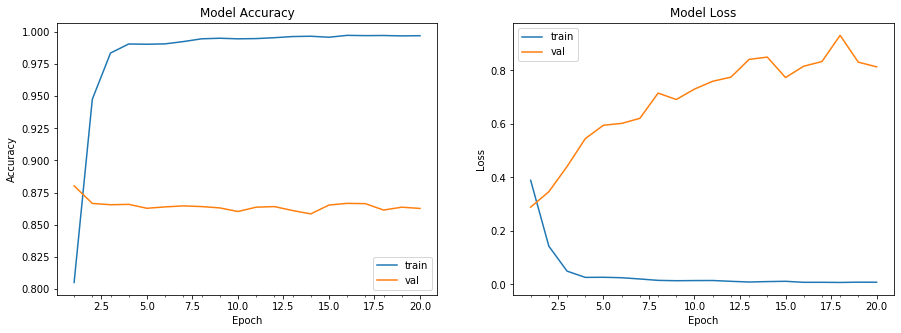

Confusion Martix [[7436  846]
 [1444 6941]]
16667/16667 [==============================] - 1s 67us/step
[Loss,Accuracy]: [0.8132529819557776, 0.8626027479557697]
Report : 
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      8282
         1.0       0.89      0.83      0.86      8385

    accuracy                           0.86     16667
   macro avg       0.86      0.86      0.86     16667
weighted avg       0.86      0.86      0.86     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.2013 - acc: 0.9285 - val_loss: 0.0465 - val_acc: 0.9925
Epoch 2/20
 - 3s - loss: 0.0734 - acc: 0.9761 - val_loss: 0.0207 - val_acc: 0.9960
Epoch 3/20
 - 3s - loss: 0.0260 - acc: 0.9917 - val_loss: 0.0166 - val_acc: 0.9952
Epoch 4/20
 - 3s - loss: 0.0142 - acc: 0.9955 - val_loss: 0.0173 - val_acc: 0.9936
Epoch 5/20
 - 3s - loss: 0.0087 - acc: 0.9969 - val_loss: 0.0186 - val_acc: 0.9942
Epoch 6/20
 - 3s - loss: 0.0075 - ac

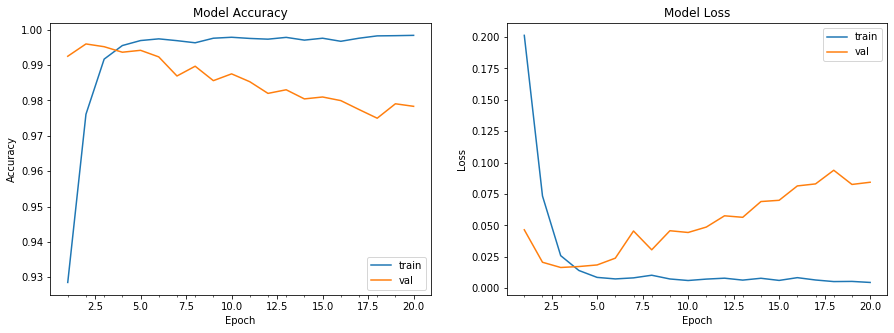

Confusion Martix [[8202  246]
 [ 115 8104]]
16667/16667 [==============================] - 1s 68us/step
[Loss,Accuracy]: [0.08438547537422598, 0.9783404332270983]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      8448
         1.0       0.97      0.99      0.98      8219

    accuracy                           0.98     16667
   macro avg       0.98      0.98      0.98     16667
weighted avg       0.98      0.98      0.98     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.0541 - acc: 0.9825 - val_loss: 0.0017 - val_acc: 0.9998
Epoch 2/20
 - 3s - loss: 0.0130 - acc: 0.9957 - val_loss: 9.3087e-04 - val_acc: 0.9999
Epoch 3/20
 - 3s - loss: 0.0082 - acc: 0.9976 - val_loss: 9.3835e-04 - val_acc: 0.9998
Epoch 4/20
 - 3s - loss: 0.0070 - acc: 0.9978 - val_loss: 0.0010 - val_acc: 0.9998
Epoch 5/20
 - 3s - loss: 0.0059 - acc: 0.9983 - val_loss: 0.0029 - val_acc: 0.9991
Epoch 6/20
 - 3s - loss: 0.

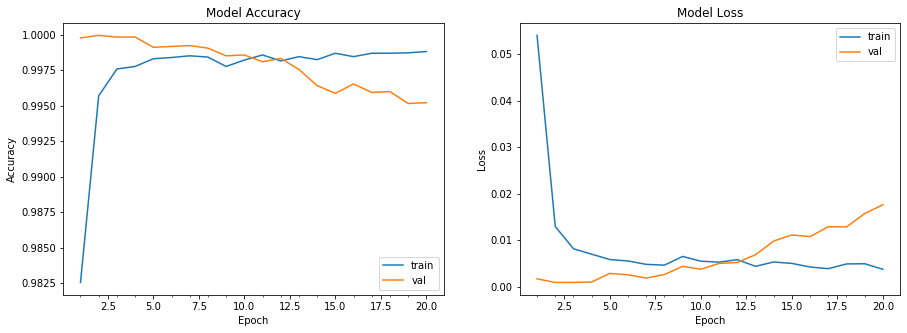

Confusion Martix [[8220   50]
 [  30 8366]]
16666/16666 [==============================] - 1s 66us/step
[Loss,Accuracy]: [0.017643993129033544, 0.9951998079923197]
Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      8270
         1.0       0.99      1.00      1.00      8396

    accuracy                           1.00     16666
   macro avg       1.00      1.00      1.00     16666
weighted avg       1.00      1.00      1.00     16666

Average accuracy 0.9453809963917292


In [90]:
# Scenario 31
# 1 Hidden Layer of 64 units
# Dropout of ratio 0.25
# relu in the hidden layer
# Batch Size 64
# Adam with lr 1e-03

#Create the model
model31 = Sequential()

#Input - Layer
model31.add(Embedding(top_words,32,input_length=max_words))
model31.add(Flatten())

#Hidden - Layers
model31.add(layers.Dropout(0.25))
model31.add(layers.Dense(64, activation="relu"))

#Output - Layer
model31.add(layers.Dense(1, activation = "sigmoid"))

model31.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model31.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model31.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model31.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model31.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg31 = np.average(acc)
print("Average accuracy",avg31);

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_71 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_71 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 16000)             0         
_________________________________________________________________
dense_173 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 8s - loss: 0.4363 - acc: 0.7913 - val_loss: 0

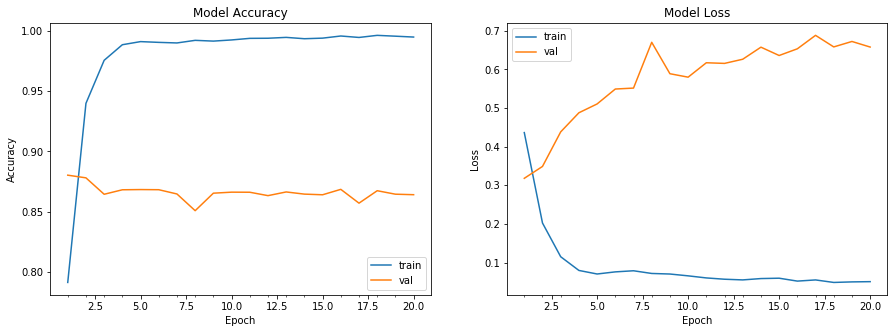

Confusion Martix [[6964 1318]
 [ 947 7438]]
16667/16667 [==============================] - 1s 70us/step
[Loss,Accuracy]: [0.6576151228753193, 0.8641027179206077]
Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      8282
         1.0       0.85      0.89      0.87      8385

    accuracy                           0.86     16667
   macro avg       0.86      0.86      0.86     16667
weighted avg       0.86      0.86      0.86     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.2435 - acc: 0.9308 - val_loss: 0.0949 - val_acc: 0.9908
Epoch 2/20
 - 3s - loss: 0.1123 - acc: 0.9745 - val_loss: 0.0645 - val_acc: 0.9945
Epoch 3/20
 - 3s - loss: 0.0688 - acc: 0.9890 - val_loss: 0.0616 - val_acc: 0.9909
Epoch 4/20
 - 3s - loss: 0.0542 - acc: 0.9931 - val_loss: 0.0615 - val_acc: 0.9901
Epoch 5/20
 - 3s - loss: 0.0476 - acc: 0.9950 - val_loss: 0.0660 - val_acc: 0.9880
Epoch 6/20
 - 3s - loss: 0.0463 - ac

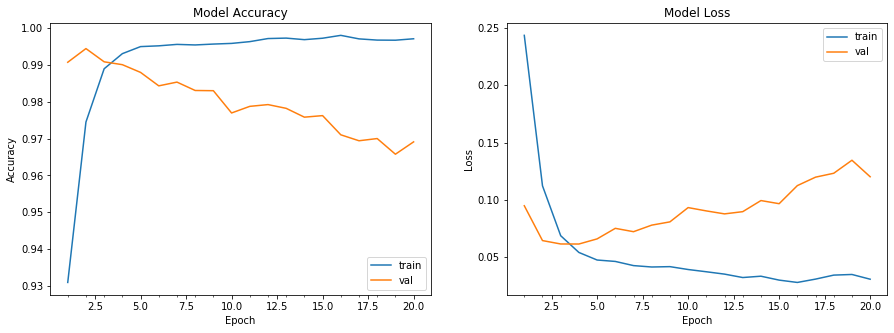

Confusion Martix [[8128  320]
 [ 195 8024]]
16667/16667 [==============================] - 1s 70us/step
[Loss,Accuracy]: [0.12019472058164864, 0.9691006179876402]
Report : 
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      8448
         1.0       0.96      0.98      0.97      8219

    accuracy                           0.97     16667
   macro avg       0.97      0.97      0.97     16667
weighted avg       0.97      0.97      0.97     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.0966 - acc: 0.9766 - val_loss: 0.0363 - val_acc: 0.9996
Epoch 2/20
 - 3s - loss: 0.0481 - acc: 0.9936 - val_loss: 0.0307 - val_acc: 0.9996
Epoch 3/20
 - 3s - loss: 0.0354 - acc: 0.9968 - val_loss: 0.0261 - val_acc: 0.9994
Epoch 4/20
 - 3s - loss: 0.0304 - acc: 0.9976 - val_loss: 0.0236 - val_acc: 0.9998
Epoch 5/20
 - 3s - loss: 0.0264 - acc: 0.9983 - val_loss: 0.0218 - val_acc: 0.9997
Epoch 6/20
 - 3s - loss: 0.0254 - a

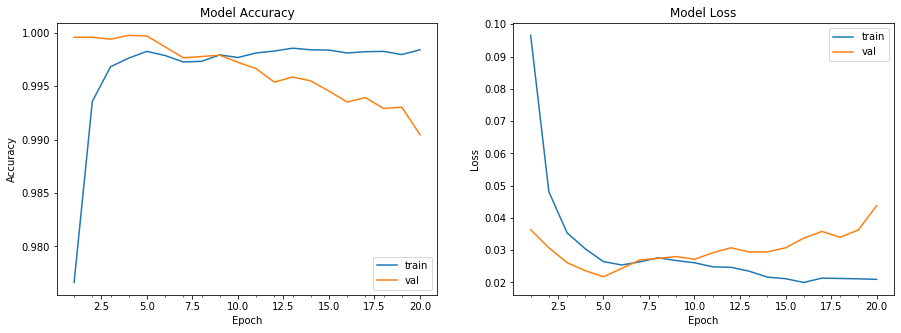

Confusion Martix [[8163  107]
 [  52 8344]]
16666/16666 [==============================] - 1s 69us/step
[Loss,Accuracy]: [0.043742469117960966, 0.9904596183847354]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8270
         1.0       0.99      0.99      0.99      8396

    accuracy                           0.99     16666
   macro avg       0.99      0.99      0.99     16666
weighted avg       0.99      0.99      0.99     16666

Average accuracy 0.9412209847643278


In [91]:
# Scenario 32
# 1 Hidden Layer of 64 units
# Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
# relu in the hidden layer
# Batch Size 64
# Adam with lr 1e-03

#Create the model
model32 = Sequential()

#Input - Layer
model32.add(Embedding(top_words,32,input_length=max_words))
model32.add(Flatten())

#Hidden - Layers
model32.add(layers.Dropout(0.25))
model32.add(layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))

#Output - Layer
model32.add(layers.Dense(1, activation = "sigmoid"))

model32.summary()

adam = optimizers.Adam(lr=0.001, amsgrad=False)

model32.compile(
    optimizer = adam,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model32.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model32.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model32.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg32 = np.average(acc)
print("Average accuracy",avg32);

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_72 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_72 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 16000)             0         
_________________________________________________________________
dense_175 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_176 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 8s - loss: 0.7083 - acc: 0.4997 - val_loss: 0

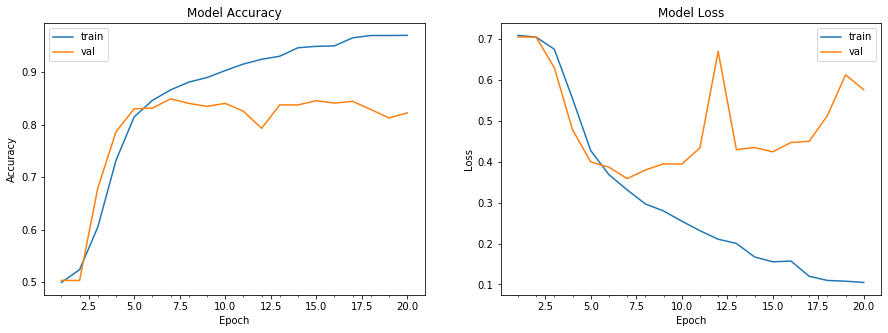

Confusion Martix [[7110 1172]
 [1789 6596]]
16667/16667 [==============================] - 1s 69us/step
[Loss,Accuracy]: [0.575421552650714, 0.822343553139666]
Report : 
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83      8282
         1.0       0.85      0.79      0.82      8385

    accuracy                           0.82     16667
   macro avg       0.82      0.82      0.82     16667
weighted avg       0.82      0.82      0.82     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.3503 - acc: 0.8835 - val_loss: 0.1130 - val_acc: 0.9719
Epoch 2/20
 - 3s - loss: 0.2325 - acc: 0.9167 - val_loss: 0.1067 - val_acc: 0.9767
Epoch 3/20
 - 3s - loss: 0.1806 - acc: 0.9386 - val_loss: 0.1209 - val_acc: 0.9651
Epoch 4/20
 - 3s - loss: 0.1515 - acc: 0.9521 - val_loss: 0.1456 - val_acc: 0.9521
Epoch 5/20
 - 3s - loss: 0.1416 - acc: 0.9558 - val_loss: 0.1708 - val_acc: 0.9365
Epoch 6/20
 - 3s - loss: 0.1264 - acc:

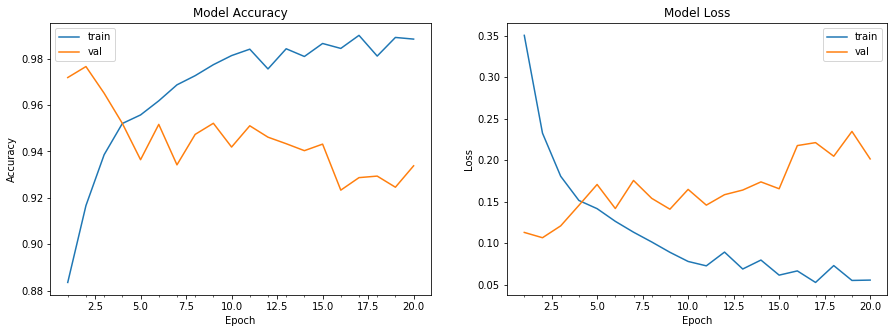

Confusion Martix [[7737  711]
 [ 392 7827]]
16667/16667 [==============================] - 1s 71us/step
[Loss,Accuracy]: [0.20151880339057143, 0.9338213235484951]
Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      8448
         1.0       0.92      0.95      0.93      8219

    accuracy                           0.93     16667
   macro avg       0.93      0.93      0.93     16667
weighted avg       0.93      0.93      0.93     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.1785 - acc: 0.9443 - val_loss: 0.0569 - val_acc: 0.9878
Epoch 2/20
 - 3s - loss: 0.1197 - acc: 0.9628 - val_loss: 0.0342 - val_acc: 0.9980
Epoch 3/20
 - 3s - loss: 0.0921 - acc: 0.9726 - val_loss: 0.0455 - val_acc: 0.9929
Epoch 4/20
 - 3s - loss: 0.0774 - acc: 0.9779 - val_loss: 0.0390 - val_acc: 0.9960
Epoch 5/20
 - 3s - loss: 0.0759 - acc: 0.9799 - val_loss: 0.0434 - val_acc: 0.9940
Epoch 6/20
 - 3s - loss: 0.0670 - a

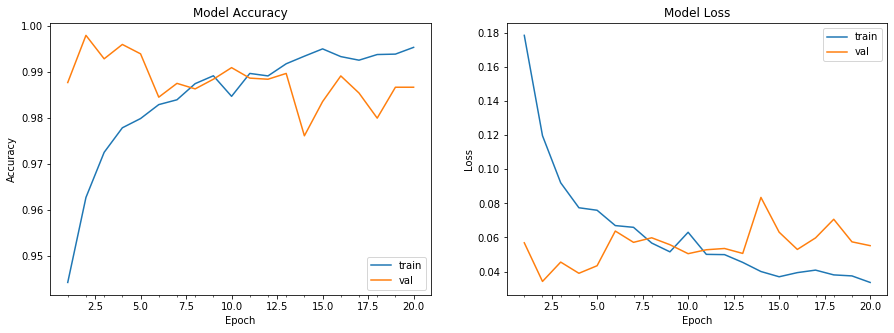

Confusion Martix [[8136  134]
 [  87 8309]]
16666/16666 [==============================] - 1s 69us/step
[Loss,Accuracy]: [0.055183220904628495, 0.9867394695787831]
Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      8270
         1.0       0.98      0.99      0.99      8396

    accuracy                           0.99     16666
   macro avg       0.99      0.99      0.99     16666
weighted avg       0.99      0.99      0.99     16666

Average accuracy 0.9143014487556481


In [92]:
# Scenario 33
# 1 Hidden Layer of 64 units
# Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
# Sigmoid in the hidden layer
# Batch Size 64
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model33 = Sequential()

#Input - Layer
model33.add(Embedding(top_words,32,input_length=max_words))
model33.add(Flatten())

#Hidden - Layers
model33.add(layers.Dropout(0.25))
model33.add(layers.Dense(64, activation="sigmoid",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))

#Output - Layer
model33.add(layers.Dense(1, activation = "sigmoid"))

model33.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model33.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model33.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model33.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model33.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg33 = np.average(acc)
print("Average accuracy",avg33);

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_73 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_73 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 16000)             0         
_________________________________________________________________
dense_177 (Dense)            (None, 64)                1024064   
_________________________________________________________________
dense_178 (Dense)            (None, 1)                 65        
Total params: 1,344,129
Trainable params: 1,344,129
Non-trainable params: 0
_________________________________________________________________
Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 8s - loss: 0.7043 - acc: 0.5209 - val_loss: 0

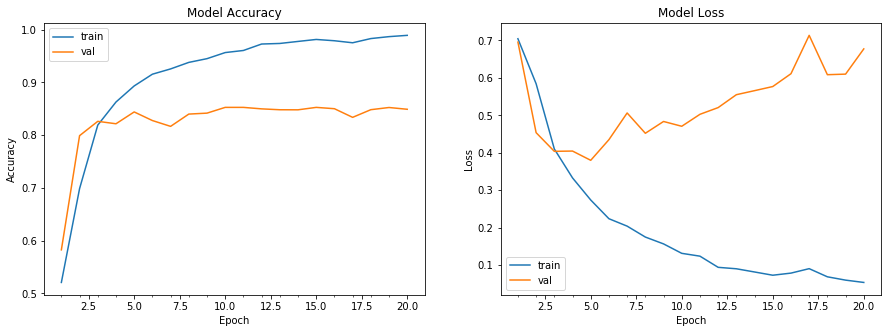

Confusion Martix [[6565 1717]
 [ 796 7589]]
16667/16667 [==============================] - 1s 70us/step
[Loss,Accuracy]: [0.6772737373986442, 0.8492230155146557]
Report : 
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      8282
         1.0       0.82      0.91      0.86      8385

    accuracy                           0.85     16667
   macro avg       0.85      0.85      0.85     16667
weighted avg       0.85      0.85      0.85     16667

Train on 33333 samples, validate on 16667 samples
Epoch 1/20
 - 3s - loss: 0.2914 - acc: 0.9041 - val_loss: 0.1122 - val_acc: 0.9852
Epoch 2/20
 - 3s - loss: 0.1887 - acc: 0.9398 - val_loss: 0.0965 - val_acc: 0.9870
Epoch 3/20
 - 3s - loss: 0.1560 - acc: 0.9524 - val_loss: 0.0891 - val_acc: 0.9823
Epoch 4/20
 - 3s - loss: 0.1339 - acc: 0.9591 - val_loss: 0.0821 - val_acc: 0.9821
Epoch 5/20
 - 3s - loss: 0.1065 - acc: 0.9713 - val_loss: 0.1097 - val_acc: 0.9666
Epoch 6/20
 - 3s - loss: 0.1002 - ac

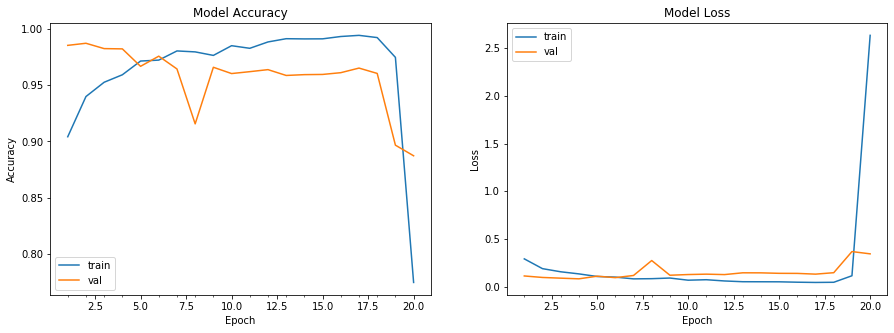

Confusion Martix [[7197 1251]
 [ 629 7590]]
16667/16667 [==============================] - 1s 70us/step
[Loss,Accuracy]: [0.3439047245581778, 0.8872022559298475]
Report : 
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88      8448
         1.0       0.86      0.92      0.89      8219

    accuracy                           0.89     16667
   macro avg       0.89      0.89      0.89     16667
weighted avg       0.89      0.89      0.89     16667

Train on 33334 samples, validate on 16666 samples
Epoch 1/20
 - 3s - loss: 0.2392 - acc: 0.9232 - val_loss: 0.0948 - val_acc: 0.9884
Epoch 2/20
 - 3s - loss: 0.1518 - acc: 0.9601 - val_loss: 0.0830 - val_acc: 0.9923
Epoch 3/20
 - 3s - loss: 0.1137 - acc: 0.9754 - val_loss: 0.0712 - val_acc: 0.9921
Epoch 4/20
 - 3s - loss: 0.1080 - acc: 0.9765 - val_loss: 0.0674 - val_acc: 0.9934
Epoch 5/20
 - 3s - loss: 0.0998 - acc: 0.9786 - val_loss: 0.0761 - val_acc: 0.9895
Epoch 6/20
 - 3s - loss: 0.0916 - ac

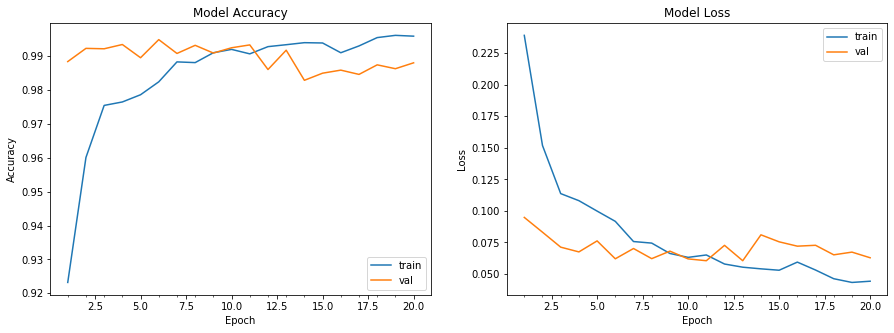

Confusion Martix [[8214   56]
 [ 144 8252]]
16666/16666 [==============================] - 1s 70us/step
[Loss,Accuracy]: [0.06274721399620202, 0.9879995199807993]
Report : 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      8270
         1.0       0.99      0.98      0.99      8396

    accuracy                           0.99     16666
   macro avg       0.99      0.99      0.99     16666
weighted avg       0.99      0.99      0.99     16666

Average accuracy 0.9081415971417676


In [93]:
# Scenario 34
# 1 Hidden Layer of 64 units
# Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
# relu in the hidden layer
# Batch Size 64
# SGD with lr 1e-02 and momentum 0.95

#Create the model
model34 = Sequential()

#Input - Layer
model34.add(Embedding(top_words,32,input_length=max_words))
model34.add(Flatten())

#Hidden - Layers
model34.add(layers.Dropout(0.25))
model34.add(layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.0001),activity_regularizer=None))

#Output - Layer
model34.add(layers.Dense(1, activation = "sigmoid"))

model34.summary()

sgd = optimizers.SGD(lr=0.01, momentum=0.95)

model34.compile(
    optimizer = sgd,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

from sklearn.model_selection import KFold
 
n_split=3
acc = []

for train_index,test_index in KFold(n_split).split(data):
  x_train,x_test=data[train_index],data[test_index]
  y_train,y_test=targets[train_index],targets[test_index]
  
  #model=create_model()
  model_info = model34.fit(x_train, y_train,validation_data = (x_test, y_test),epochs=20,batch_size=64,verbose=2)
  
  plot_model_history(model_info)

  y_pred = model34.predict_classes(x_test)

  #Confusion matrix and accuracy score
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Martix", cm)
  Acc=model34.evaluate(x_test,y_test)
  print('[Loss,Accuracy]:',Acc)
  acc.append(Acc[1])
  print('Report : ')
  print(classification_report(y_test, y_pred))

avg34 = np.average(acc)
print("Average accuracy",avg34);

In [96]:
print("Average accuracy of model 1",avg1)
print("Average accuracy of model 2",avg2)
print("Average accuracy of model 3",avg3)
print("Average accuracy of model 4",avg4)
print("Average accuracy of model 5",avg5)
print("Average accuracy of model 6",avg6)
print("Average accuracy of model 7",avg7)
print("Average accuracy of model 8",avg8)
print("Average accuracy of model 9",avg9)
print("Average accuracy of model 10",avg10)
print("Average accuracy of model 11",avg11)
print("Average accuracy of model 12",avg12)
print("Average accuracy of model 13",avg13)
print("Average accuracy of model 14",avg14)
print("Average accuracy of model 15",avg15)
print("Average accuracy of model 16",avg16)
print("Average accuracy of model 17",avg17)
print("Average accuracy of model 18",avg18)
print("Average accuracy of model 19",avg19)
print("Average accuracy of model 20",avg20)
print("Average accuracy of model 21",avg21)
print("Average accuracy of model 22",avg22)
print("Average accuracy of model 23",avg23)
print("Average accuracy of model 24",avg24)
print("Average accuracy of model 25",avg25)
print("Average accuracy of model 26",avg26)
print("Average accuracy of model 27",avg27)
print("Average accuracy of model 28",avg28)
print("Average accuracy of model 29",avg29)
print("Average accuracy of model 30",avg31)
print("Average accuracy of model 32",avg32)
print("Average accuracy of model 33",avg33)
print("Average accuracy of model 34",avg34)


Average accuracy of model 1 0.9505009167560861
Average accuracy of model 2 0.9392210379876332
Average accuracy of model 3 0.9320210499618479
Average accuracy of model 4 0.9413809707796726
Average accuracy of model 5 0.9469409339678877
Average accuracy of model 6 0.9461209179669118
Average accuracy of model 7 0.9416809671643437
Average accuracy of model 8 0.9567008539740959
Average accuracy of model 9 0.9519609139834245
Average accuracy of model 10 0.9164010947705128
Average accuracy of model 11 0.5221204732271609
Average accuracy of model 12 0.5781221733119247
Average accuracy of model 13 0.5490813212674784
Average accuracy of model 14 0.9217012887786332
Average accuracy of model 15 0.9157809655590882
Average accuracy of model 16 0.5190604240392259
Average accuracy of model 17 0.5035602180131685
Average accuracy of model 18 0.9563208471974972
Average accuracy of model 19 0.9236415079845696
Average accuracy of model 20 0.9572808507744958
Average accuracy of model 21 0.8758608891029733
A

Model in  Scenario 20 with the following hyperparameters has the best accuracy of 0.9572808507744958
 -- 1 Hidden Layer of 64 units
 -- No Dropout
 -- Sigmoid in the hidden layer
 -- Batch Size 256
 -- Adam with lr 1e-03

Average accuracy of model  0.9572808507744958